In [2]:
#!pip install pmdarima
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt  # plotting series
from datetime import datetime
from numpy import round
from numpy import nan
import numpy as np

from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA as arima
from statsmodels.tsa.arima_model import ARIMAResults as arima_results
from math import sqrt

%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

In [3]:
#open a connection to the url
url = ('https://raw.githubusercontent.com/2SUBDA/IST_718/master/Zip_Zhvi_SingleFamilyResidence_20.csv')
# create dataframe
df = pd.read_csv(url, encoding='ISO-8859-1')
#print head of df
print(df.head())

   RegionID  SizeRank  RegionName RegionType StateName State          City  \
0     77207     10323       44502        Zip        OH    OH    Youngstown   
1     89222     30742       71839        Zip        AR    AR       Garland   
2     63200     31386       13639        Zip        NY    NY  Town Of Fine   
3     76354     21359       42410        Zip        KY    KY    Earlington   
4     76033     13724       41522        Zip        KY    KY  Elkhorn City   

                        Metro             CountyName  1/31/2000  ...  \
0  Youngstown-Warren-Boardman        Mahoning County    11209.0  ...   
1                   Texarkana          Miller County    15746.0  ...   
2          Ogdensburg-Massena  Saint Lawrence County    23529.0  ...   
3                Madisonville         Hopkins County    14205.0  ...   
4                         NaN            Pike County    18425.0  ...   

   6/30/2019  7/31/2019  8/31/2019  9/30/2019  10/31/2019  11/30/2019  \
0      17888      18406  

In [4]:
# looking at column names
my_list = list(df)
print(my_list)

['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', 'State', 'City', 'Metro', 'CountyName', '1/31/2000', '2/29/2000', '3/31/2000', '4/30/2000', '5/31/2000', '6/30/2000', '7/31/2000', '8/31/2000', '9/30/2000', '10/31/2000', '11/30/2000', '12/31/2000', '1/31/2001', '2/28/2001', '3/31/2001', '4/30/2001', '5/31/2001', '6/30/2001', '7/31/2001', '8/31/2001', '9/30/2001', '10/31/2001', '11/30/2001', '12/31/2001', '1/31/2002', '2/28/2002', '3/31/2002', '4/30/2002', '5/31/2002', '6/30/2002', '7/31/2002', '8/31/2002', '9/30/2002', '10/31/2002', '11/30/2002', '12/31/2002', '1/31/2003', '2/28/2003', '3/31/2003', '4/30/2003', '5/31/2003', '6/30/2003', '7/31/2003', '8/31/2003', '9/30/2003', '10/31/2003', '11/30/2003', '12/31/2003', '1/31/2004', '2/29/2004', '3/31/2004', '4/30/2004', '5/31/2004', '6/30/2004', '7/31/2004', '8/31/2004', '9/30/2004', '10/31/2004', '11/30/2004', '12/31/2004', '1/31/2005', '2/28/2005', '3/31/2005', '4/30/2005', '5/31/2005', '6/30/2005', '7/31/2005', '8/31/20

In [5]:
# removing rows with na's
df.dropna(axis = 0, how =  'any', inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12757 entries, 0 to 15404
Columns: 252 entries, RegionID to 3/31/2020
dtypes: float64(216), int64(30), object(6)
memory usage: 24.6+ MB


In [6]:
my_list = list(df)
print(my_list)

['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', 'State', 'City', 'Metro', 'CountyName', '1/31/2000', '2/29/2000', '3/31/2000', '4/30/2000', '5/31/2000', '6/30/2000', '7/31/2000', '8/31/2000', '9/30/2000', '10/31/2000', '11/30/2000', '12/31/2000', '1/31/2001', '2/28/2001', '3/31/2001', '4/30/2001', '5/31/2001', '6/30/2001', '7/31/2001', '8/31/2001', '9/30/2001', '10/31/2001', '11/30/2001', '12/31/2001', '1/31/2002', '2/28/2002', '3/31/2002', '4/30/2002', '5/31/2002', '6/30/2002', '7/31/2002', '8/31/2002', '9/30/2002', '10/31/2002', '11/30/2002', '12/31/2002', '1/31/2003', '2/28/2003', '3/31/2003', '4/30/2003', '5/31/2003', '6/30/2003', '7/31/2003', '8/31/2003', '9/30/2003', '10/31/2003', '11/30/2003', '12/31/2003', '1/31/2004', '2/29/2004', '3/31/2004', '4/30/2004', '5/31/2004', '6/30/2004', '7/31/2004', '8/31/2004', '9/30/2004', '10/31/2004', '11/30/2004', '12/31/2004', '1/31/2005', '2/28/2005', '3/31/2005', '4/30/2005', '5/31/2005', '6/30/2005', '7/31/2005', '8/31/20

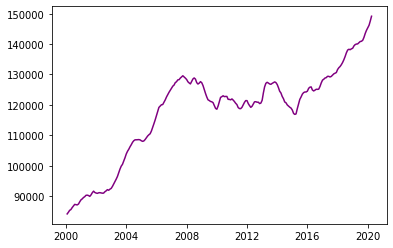

In [7]:
# creating a dataframe for Hot Springs Metro
hot_springs = df.loc[(df['State']=='AR') & (df['Metro'].str.contains('Hot Springs'))]
# finding the mean of the rows after 
hot_springs_mean = hot_springs.iloc[:, 7:].mean(axis=0)
# setting index to datetime
hot_springs_mean.index = pd.to_datetime(hot_springs_mean.index)
# plotting the value mean
plt.plot(hot_springs_mean.index, hot_springs_mean.values, color='purple')
plt.show()

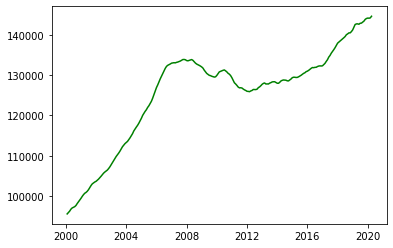

In [8]:
# creating a dataframe for Little Rock Metro
little_rock = df.loc[(df['State']=='AR') & (df['Metro'].str.contains('Little Rock'))]
# finding the mean of the rows after 
little_rock_mean = little_rock.iloc[:, 7:].mean(axis=0)
# setting index to datetime
little_rock_mean.index = pd.to_datetime(little_rock_mean.index)
# plotting the value mean
plt.plot(little_rock_mean.index, little_rock_mean.values, color='green')
plt.show()

In [9]:
# creating a dataframe for Fayetteville Metro
Fayetteville = df.loc[(df['State']=='AR') & (df['Metro'].str.contains('Fayetteville'))]
# finding the mean of the rows after 
Fayetteville_mean = Fayetteville.iloc[:, 7:].mean(axis=0)
# setting index to datetime
Fayetteville_mean.index = pd.to_datetime(Fayetteville_mean.index)
# plotting the value mean
2
plt.show()

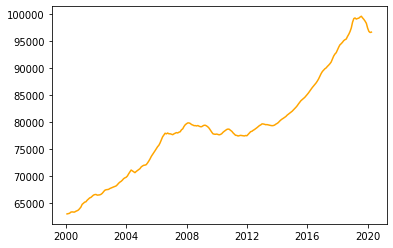

In [10]:
# creating a dataframe for Searcy Metro
Searcy = df.loc[(df['State']=='AR') & (df['Metro'].str.contains('Searcy'))]
# finding the mean of the rows after 
Searcy_mean = Searcy.iloc[:, 7:].mean(axis=0)
# setting index to datetime
Searcy_mean.index = pd.to_datetime(Searcy_mean.index)
# plotting the value mean
plt.plot(Searcy_mean.index, Searcy_mean.values, color='orange')
plt.show()

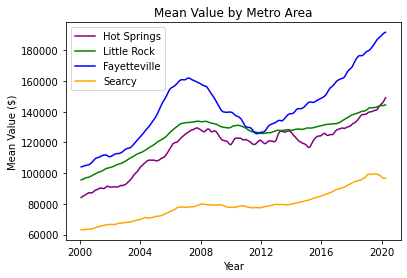

In [11]:
# plotting all metro areas with legend
#Develop time series plots for the following Arkansas metro areas:
 #  Hot Springs, Little Rock, Fayetteville, Searcy
 #  Present all values from 1997 to present
 #  Average at the metro area level
plt.plot(hot_springs_mean.index, hot_springs_mean.values, color='purple', label = 'Hot Springs')
plt.plot(little_rock_mean.index, little_rock_mean.values, color='green', label = 'Little Rock')
plt.plot(Fayetteville_mean.index, Fayetteville_mean.values, color='blue', label = 'Fayetteville')
plt.plot(Searcy_mean.index, Searcy_mean.values, color='orange', label = 'Searcy')
plt.title('Mean Value by Metro Area')
plt.xlabel('Year')
plt.ylabel('Mean Value ($)')
plt.legend()
plt.show()

In [12]:
# Part 2 ARIMA Modeling
#!pip install -U fsds
%store -r df
%matplotlib inline

import fsds as fs
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from fsds.imports import *

## Project Notebook Settings
pd.set_option('display.max_columns',0)

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-notebook')

fsds v0.4.14 loaded.


In [13]:
# dropping unneeded columns
df.drop(['RegionID', 'City', 'State', 'CountyName','RegionType', 'StateName'], axis=1, inplace=True)
# renaming column to Zipcode
df.rename(columns = ({'RegionName': 'Zipcode'}), inplace = True)

In [14]:
# creating ROI to determine best investment zipcodes

# 5 year ROI
df['ROI_5yr'] = round((df['3/31/2020'] - df['3/31/2015'])/ df['3/31/2015'],4)
# 3 year ROI
df['ROI_3yr'] = round((df['3/31/2020'] - df['3/31/2017'])/ df['3/31/2017'],4)

In [15]:
# looking at added columns
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12757 entries, 0 to 15404
Columns: 248 entries, SizeRank to ROI_3yr
dtypes: float64(218), int64(29), object(1)
memory usage: 24.2+ MB


SizeRank  Zipcode                       Metro  ...  3/31/2020  ROI_5yr  ROI_3yr
0     10323    44502  Youngstown-Warren-Boardman  ...      21178   0.5729   0.3895
1     30742    71839                   Texarkana  ...      21485   0.4796   0.2367
2     31386    13639          Ogdensburg-Massena  ...      44222   0.1014   0.1034
3     21359    42410                Madisonville  ...      27657   0.2491   0.0897
7     32559    25849                     Beckley  ...      27888   0.2674   0.2580

[5 rows x 248 columns]

In [16]:
# changing data from wide format to long for analysis
def melt_data(df):
    melted = pd.melt(df, id_vars=['Zipcode', 'Metro', 'SizeRank', 'ROI_5yr', 'ROI_3yr'], 
                     var_name='Date')
    melted['Date'] = pd.to_datetime(melted['Date'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted

In [17]:
melted_df = melt_data(df)

In [18]:
# checking for na's
melted_df.isna().value_counts()

Zipcode  Metro  SizeRank  ROI_5yr  ROI_3yr  Date   value
False    False  False     False    False    False  False    3099951
dtype: int64

In [19]:
#change Zipcode dtype to 'str'
melted_df['Zipcode'] = melted_df['Zipcode'].astype(str)

# making sure the data type of the 'Date' column is datetime
melted_df['Date'] = pd.to_datetime(melted_df['Date'], format='%m/%y')

# setting the 'Date' column as index
melted_df.set_index('Date', inplace=True)

In [20]:
melted_df.index

DatetimeIndex(['2000-01-31', '2000-01-31', '2000-01-31', '2000-01-31',
               '2000-01-31', '2000-01-31', '2000-01-31', '2000-01-31',
               '2000-01-31', '2000-01-31',
               ...
               '2020-03-31', '2020-03-31', '2020-03-31', '2020-03-31',
               '2020-03-31', '2020-03-31', '2020-03-31', '2020-03-31',
               '2020-03-31', '2020-03-31'],
              dtype='datetime64[ns]', name='Date', length=3099951, freq=None)

In [21]:
# summarizing using resample
melted_df.resample('MS').mean().index

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01',
               ...
               '2019-06-01', '2019-07-01', '2019-08-01', '2019-09-01',
               '2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',
               '2020-02-01', '2020-03-01'],
              dtype='datetime64[ns]', name='Date', length=243, freq='MS')

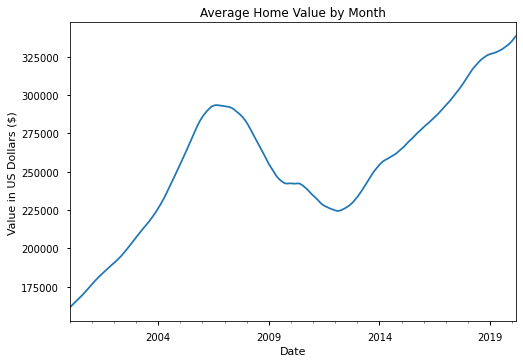

In [22]:
# distribution of home value over time
monthly_data = melted_df.resample('MS').mean()['value']
monthly_data.plot()
plt.title('Average Home Value by Month')
plt.ylabel('Value in US Dollars ($)')
plt.show()
# can see the housing bubble crash in 08' and how the market has rebounded

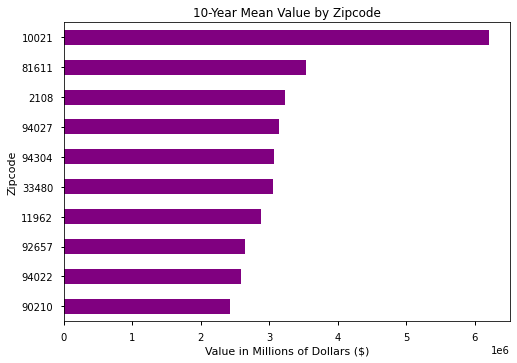

In [23]:
# top 10 valuable zipcodes by mean
zip_grp = melted_df.groupby('Zipcode')
zip_grp = zip_grp.value.mean()
zip_grp = zip_grp.sort_values(ascending=True).tail(10)

# plotting bar chart
zip_grp.plot.barh(color='purple')
plt.title('10-Year Mean Value by Zipcode')
plt.xlabel('Value in Millions of Dollars ($)')
plt.show()

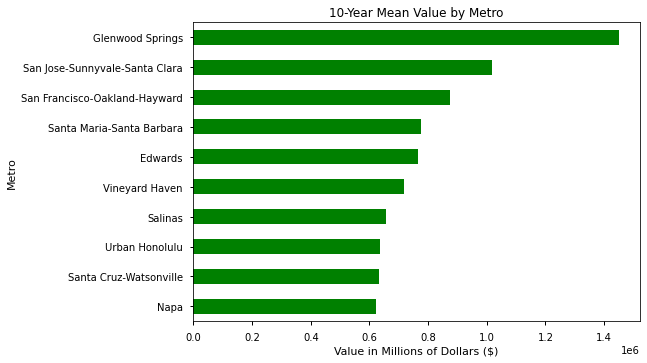

In [24]:
# top 10 valuable Metro by mean
metro_grp = melted_df.groupby('Metro')
metro_grp = metro_grp.value.mean()
metro_grp = metro_grp.sort_values(ascending=True).tail(10)

# plotting bar chart
metro_grp.plot.barh(color='green')
plt.title('10-Year Mean Value by Metro')
plt.xlabel('Value in Millions of Dollars ($)')
plt.show()

In [130]:
# taking a closer look at the mose valuable zipcodes
# #1
melted_df.loc[melted_df['Zipcode']=='10021']
# although this is the most valuable zipcode the ROI has not been great

Zipcode                        Metro  ...  ROI_3yr      value
Date                                             ...                    
2000-01-31   10021  New York-Newark-Jersey City  ...  -0.0728  4119865.0
2000-02-29   10021  New York-Newark-Jersey City  ...  -0.0728  4074872.0
2000-03-31   10021  New York-Newark-Jersey City  ...  -0.0728  4130162.0
2000-04-30   10021  New York-Newark-Jersey City  ...  -0.0728  4222398.0
2000-05-31   10021  New York-Newark-Jersey City  ...  -0.0728  4332266.0
...            ...                          ...  ...      ...        ...
2019-11-30   10021  New York-Newark-Jersey City  ...  -0.0728  7080063.0
2019-12-31   10021  New York-Newark-Jersey City  ...  -0.0728  7076118.0
2020-01-31   10021  New York-Newark-Jersey City  ...  -0.0728  7082178.0
2020-02-29   10021  New York-Newark-Jersey City  ...  -0.0728  7077934.0
2020-03-31   10021  New York-Newark-Jersey City  ...  -0.0728  7048943.0

[243 rows x 6 columns]

In [131]:
# taking a closer look at the mose valuable zipcodes
# #2
melted_df.loc[melted_df['Zipcode']=='81611']

Zipcode             Metro  SizeRank  ROI_5yr  ROI_3yr      value
Date                                                                       
2000-01-31   81611  Glenwood Springs      8703   0.2738   0.1132  2126541.0
2000-02-29   81611  Glenwood Springs      8703   0.2738   0.1132  2161976.0
2000-03-31   81611  Glenwood Springs      8703   0.2738   0.1132  2187371.0
2000-04-30   81611  Glenwood Springs      8703   0.2738   0.1132  2217322.0
2000-05-31   81611  Glenwood Springs      8703   0.2738   0.1132  2228462.0
...            ...               ...       ...      ...      ...        ...
2019-11-30   81611  Glenwood Springs      8703   0.2738   0.1132  5467461.0
2019-12-31   81611  Glenwood Springs      8703   0.2738   0.1132  5449984.0
2020-01-31   81611  Glenwood Springs      8703   0.2738   0.1132  5439350.0
2020-02-29   81611  Glenwood Springs      8703   0.2738   0.1132  5435638.0
2020-03-31   81611  Glenwood Springs      8703   0.2738   0.1132  5435634.0

[243 rows x 6 columns]

In [132]:
# taking a closer look at the mose valuable zipcodes
# #3
melted_df.loc[melted_df['Zipcode']=='2108']

Zipcode                    Metro  ...  ROI_3yr      value
Date                                         ...                    
2000-01-31    2108  Boston-Cambridge-Newton  ...    0.128  1630307.0
2000-02-29    2108  Boston-Cambridge-Newton  ...    0.128  1662228.0
2000-03-31    2108  Boston-Cambridge-Newton  ...    0.128  1693746.0
2000-04-30    2108  Boston-Cambridge-Newton  ...    0.128  1708624.0
2000-05-31    2108  Boston-Cambridge-Newton  ...    0.128  1712238.0
...            ...                      ...  ...      ...        ...
2019-11-30    2108  Boston-Cambridge-Newton  ...    0.128  4932125.0
2019-12-31    2108  Boston-Cambridge-Newton  ...    0.128  4939417.0
2020-01-31    2108  Boston-Cambridge-Newton  ...    0.128  4956460.0
2020-02-29    2108  Boston-Cambridge-Newton  ...    0.128  4973933.0
2020-03-31    2108  Boston-Cambridge-Newton  ...    0.128  4982850.0

[243 rows x 6 columns]

In [133]:
# taking a look at the highest ROI
melted_df['ROI_5yr'].describe()

count    3.099951e+06
mean     2.827255e-01
std      1.730861e-01
min     -2.847000e-01
25%      1.693000e-01
50%      2.609000e-01
75%      3.647000e-01
max      2.499500e+00
Name: ROI_5yr, dtype: float64

In [134]:
# taking a look at the highest ROI
melted_df['ROI_3yr'].describe()

count    3.099951e+06
mean     1.597601e-01
std      9.298743e-02
min     -2.119000e-01
25%      1.024000e-01
50%      1.508000e-01
75%      2.033000e-01
max      1.320900e+00
Name: ROI_3yr, dtype: float64

In [135]:
# taking the top 10 of 5 year ROI
ninety_five_perc_ROI_5yr = melted_df['ROI_5yr'].quantile(q=0.99)
top_5_perc = melted_df.loc[melted_df['ROI_5yr']>=ninety_five_perc_ROI_5yr]

In [101]:
top_5_perc.shape


(31104, 6)

In [35]:
# dropping metro and sizerank as they will not be used for the ARIMA model

df_5yr = top_10_perc.drop(columns = ['Metro', 'SizeRank'])
df_5yr.head()

Zipcode  ROI_5yr  ROI_3yr    value
Date                                         
2000-01-31   19132   0.9990   0.9856  22833.0
2000-01-31   32208   1.7224   0.8281  29372.0
2000-01-31   92285   0.9971   0.5516  31326.0
2000-01-31   30310   2.0808   0.9560  44319.0
2000-01-31   85034   0.9445   0.5679  47036.0

In [36]:
# dropping metro and sizerank as they will not be used for the ARIMA model

df_3yr = top_5_perc_3yr.drop(columns = ['Metro', 'SizeRank'])
df_3yr.head()

Zipcode  ROI_5yr  ROI_3yr    value
Date                                         
2000-01-31   19132   0.9990   0.9856  22833.0
2000-01-31   32208   1.7224   0.8281  29372.0
2000-01-31   92285   0.9971   0.5516  31326.0
2000-01-31   48602   0.5368   0.5295  40497.0
2000-01-31   30310   2.0808   0.9560  44319.0

In [37]:
# creating a list of unique zipcodes to model one zipcode for ARIMA parameters
zipcode_list_5yr = df_5yr['Zipcode'].unique().tolist()

zipcode_list_3yr = df_3yr['Zipcode'].unique().tolist()


In [38]:
# looping zipcode list to create a dictionary
ZC5 = {}
for zipcode in zipcode_list_5yr:
  temp_df5 = df_5yr.groupby('Zipcode').get_group(zipcode).sort_index()['value']
  ZC5[zipcode] = temp_df5



In [39]:
ZC3 = {}
for zipcode in zipcode_list_3yr:
  temp_df3 = df_3yr.groupby('Zipcode').get_group(zipcode).sort_index()['value']
  ZC3[zipcode] = temp_df3

In [40]:
# dictionary keys
ZC5.keys()

dict_keys(['19132', '32208', '92285', '30310', '85034', '33815', '33605', '75226', '19139', '48340', '75217', '38127', '73106', '76164', '75224', '85040', '33714', '48030', '33711', '33846', '64109', '75235', '34950', '32805', '75141', '75232', '75211', '75203', '32211', '64124', '30311', '23224', '75216', '33610', '75150', '75223', '75227', '99039', '30354', '75149', '75208', '34690', '33619', '78208', '75180', '32808', '34668', '33713', '75051', '30288', '78202', '75233', '76119', '30274', '60419', '44113', '77011', '75041', '33712', '32922', '75246', '33705', '33147', '75241', '98421', '43205', '75228', '78203', '28052', '33607', '33054', '33142', '33603', '30344', '49507', '30296', '43227', '99207', '75253', '33167', '28208', '33127', '98418', '30032', '28206', '98337', '95814', '30035', '98439', '76104', '7108', '95816', '95818', '95387', '7111', '98405', '95819', '98409', '43206', '90026', '7018', '91030', '7106', '90004', '90027', '94610', '91108', '90005', '91105', '90403', '90

In [41]:
# dictionary keys
ZC3.keys()

dict_keys(['19132', '32208', '92285', '48602', '30310', '85034', '33815', '33605', '75226', '53209', '19139', '19141', '30297', '75217', '43211', '38127', '73106', '76164', '75224', '49442', '19138', '33714', '48030', '33711', '33846', '64109', '75235', '93501', '34950', '64123', '32805', '40211', '75141', '75232', '75203', '32211', '44102', '64124', '30311', '23224', '75216', '33610', '48507', '64134', '14210', '85714', '99039', '30354', '34690', '33619', '78208', '19143', '18201', '32808', '77016', '33713', '45216', '30288', '76119', '30274', '60419', '44113', '77011', '37917', '33712', '32922', '75246', '33805', '37404', '33705', '19131', '33147', '75241', '98421', '43205', '37915', '78203', '28052', '85128', '33142', '23222', '30344', '49507', '30296', '43227', '99207', '43223', '99014', '28208', '30238', '99201', '99202', '30032', '28206', '30035', '8232', '98439', '86444', '95818', '7111', '30088', '43206', '90026', '7018', '91030', '7106', '90004', '7522', '7501', '90027', '7524

In [42]:
# taking a look at one zipcode in both dictionaries
ZC5['19132']

Date
2000-01-31    22833.0
2000-02-29    23114.0
2000-03-31    23423.0
2000-04-30    23597.0
2000-05-31    24010.0
               ...   
2019-11-30    44545.0
2019-12-31    44859.0
2020-01-31    45538.0
2020-02-29    46708.0
2020-03-31    48757.0
Name: value, Length: 243, dtype: float64

In [43]:
 # creating a dataframe from the dict ofr 5 year
df_5 = pd.DataFrame(ZC5)
df_5.head()

19132    32208    92285  ...    46203    46201    37208
Date                                   ...                           
2000-01-31  22833.0  29372.0  31326.0  ...  49071.0  43867.0  91192.0
2000-02-29  23114.0  29462.0  31256.0  ...  49210.0  44152.0  91617.0
2000-03-31  23423.0  29558.0  31521.0  ...  49484.0  44334.0  92762.0
2000-04-30  23597.0  29647.0  31756.0  ...  49950.0  44333.0  93123.0
2000-05-31  24010.0  29774.0  32249.0  ...  50408.0  44237.0  93574.0

[5 rows x 128 columns]

In [44]:
# ROI3 dataframe
df_3 = pd.DataFrame(ZC3)
df_3.head()

19132    32208    92285  ...     83705    83687    45406
Date                                   ...                            
2000-01-31  22833.0  29372.0  31326.0  ...  120801.0  98053.0  49068.0
2000-02-29  23114.0  29462.0  31256.0  ...  121034.0  97795.0  48935.0
2000-03-31  23423.0  29558.0  31521.0  ...  121148.0  97418.0  48872.0
2000-04-30  23597.0  29647.0  31756.0  ...  121128.0  96539.0  48949.0
2000-05-31  24010.0  29774.0  32249.0  ...  121319.0  96899.0  49423.0

[5 rows x 128 columns]

In [45]:
# modeling an initial zipcode
zipcode = '19132'

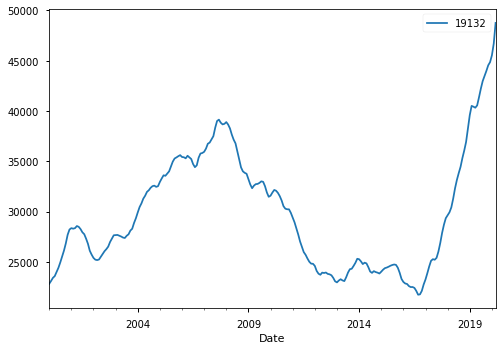

In [46]:
zc = df_5[zipcode].copy()
ax = zc.plot()
ax.legend()
plt.show()

In [47]:
# plotting acf and pacf for the zipcode

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.plotting import autocorrelation_plot,lag_plot

def plot_acf_pacf(zc, figsize=(10,8),lags=24):
    
    fig,ax = plt.subplots(nrows=3,
                          figsize=figsize)
    
    ## Plot zc
    zc.plot(ax=ax[0])
    
    ## Plot acf, pavf
    plot_acf(zc,ax=ax[1],lags=lags)
    plot_pacf(zc, ax=ax[2],lags=lags) 
    fig.tight_layout()
    
    fig.suptitle(f"Zipcode: {zc.name}",y=1.1,fontsize=20)
    
    for a in ax[1:]:
        a.xaxis.set_major_locator(mpl.ticker.MaxNLocator(min_n_ticks=lags, integer=True))
        a.xaxis.grid()
    return fig,ax

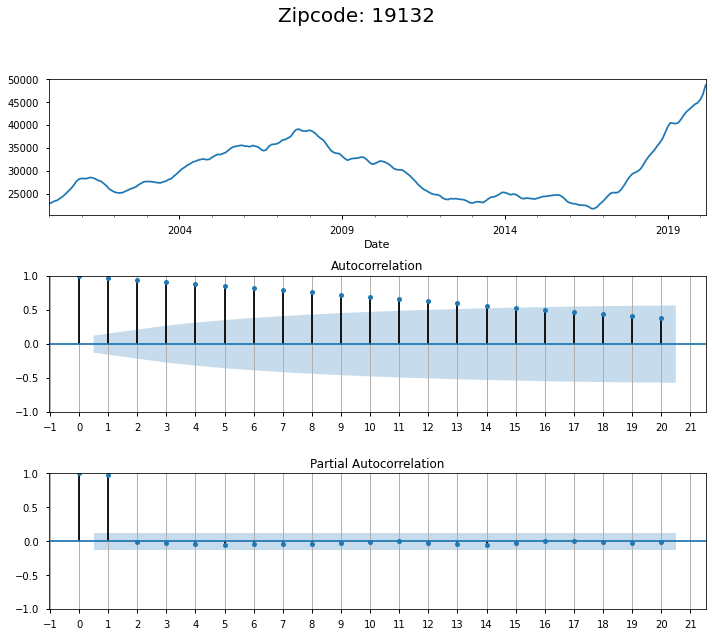

In [48]:
plot_acf_pacf(zc,lags=20);


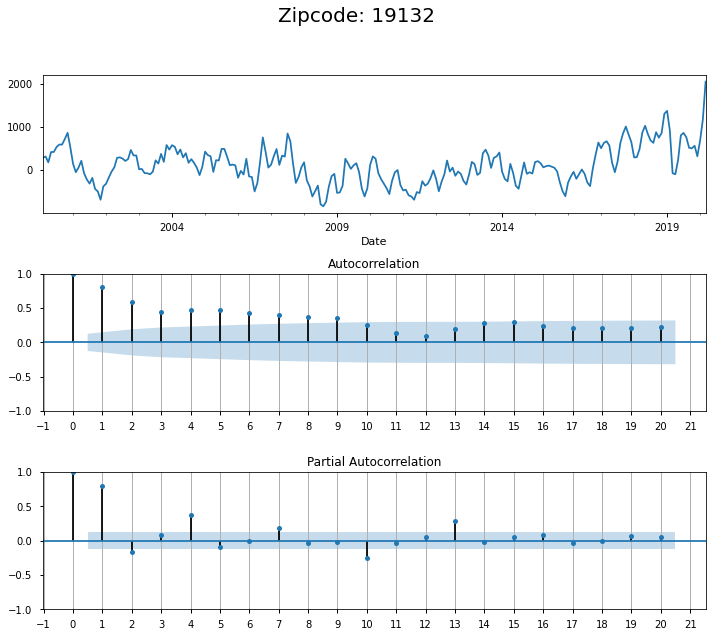

In [49]:
d = 1
plot_acf_pacf(zc.diff(d).dropna(),lags=20);

In [50]:
# Building the first model by manually selecting parameters
d = 1
p = 1
q = 1

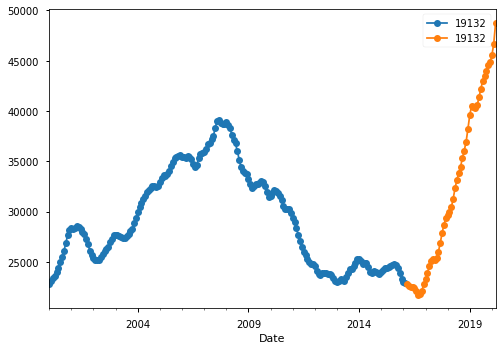

In [51]:
train_size = 0.8
split_idx = round(len(zc)* train_size)
split_idx = int(split_idx)

## Split
train = zc.iloc[:split_idx]
test = zc.iloc[split_idx:]

## Visualize split
fig,ax= plt.subplots()
kws = dict(ax=ax,marker='o')
train.plot(**kws)
test.plot(**kws)
ax.legend(bbox_to_anchor=[1,1])
plt.show()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  19132   No. Observations:                  194
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1310.641
Date:                Sat, 14 May 2022   AIC                           2627.283
Time:                        12:46:48   BIC                           2637.071
Sample:                    01-31-2000   HQIC                          2631.246
                         - 02-29-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6497      0.048     13.616      0.000       0.556       0.743
ma.L1          0.1629      0.085      1.919      0.055      -0.003       0.329
sigma2       3.93e+04   3730.551     10.534      0.000     3.2e+04    4.66e+04
===================================================================================
Ljung-Box (L1) (Q):                   2.39   Jarque-Bera (JB):                 0.50
Prob(Q):                              0.12   Prob(JB):                         0.78
Heteroskedasticity (H):               0.83   Skew:                             0.03
Prob(H) (two-sided):                  0.45   Kurtosis:                         3.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

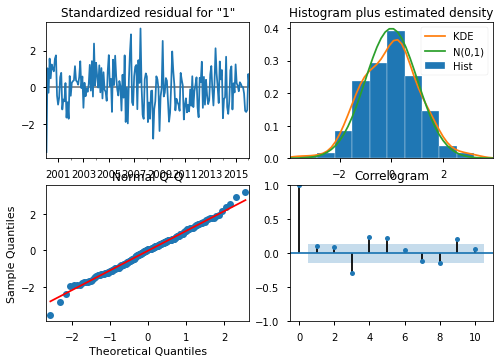

In [52]:
# baseline model from initial parameters
from statsmodels.tsa.statespace.sarimax import SARIMAX

## Baseline model from eye-balled params
model = SARIMAX(train,order=(p,d,q),).fit()
display(model.summary())
model.plot_diagnostics();
plt.show()

In [53]:
# creating the forecast

from sklearn import metrics
forecast = model.get_forecast(steps=len(test))

In [54]:
def forecast_to_df(forecast,zipcode):
    test_pred = forecast.conf_int()
    test_pred[zipcode] = forecast.predicted_mean
    test_pred.columns = ['lower','upper','prediction']
    return test_pred


pred_df = forecast_to_df(forecast,zipcode)

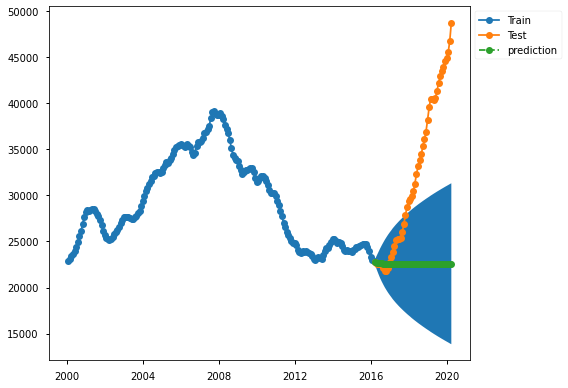

In [55]:
# plotting the forecast
def plot_train_test_pred(train,test,pred_df):
    fig,ax = plt.subplots()
    kws = dict(marker='o')
    
    ax.plot(train,label='Train',**kws)
    ax.plot(test,label='Test',**kws)
    ax.plot(pred_df['prediction'],label='prediction',ls='--',**kws)

    ax.fill_between(x=pred_df.index,y1=pred_df['lower'],y2=pred_df['upper'])
    ax.legend(bbox_to_anchor=[1,1])
    fig.tight_layout()
    return fig,ax

plot_train_test_pred(train,test,pred_df)
plt.show()

In [56]:
# does not give an accurate prediction at all, will be using pmdarima to select the parameters


In [57]:
from pmdarima import auto_arima

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  194
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1308.588
Date:                Sat, 14 May 2022   AIC                           2619.175
Time:                        12:46:59   BIC                           2622.433
Sample:                             0   HQIC                          2620.494
                                - 194                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.863e+04   5106.762      9.522      0.000    3.86e+04    5.86e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.84   Jarque-Bera (JB):                 0.86
Prob(Q):                              0.36   Prob(JB):                         0.65
Heteroskedasticity (H):               1.26   Skew:                             0.15
Prob(H) (two-sided):                  0.36   Kurtosis:                         2.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

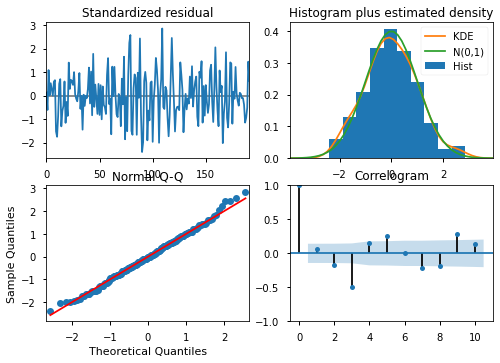

In [58]:
auto_model = auto_arima(train,start_p=0,start_q=0)
display(auto_model.summary())
auto_model.plot_diagnostics();

In [59]:
# showing datetime index

pd.date_range(train.index[-1], periods=10,freq='M')


DatetimeIndex(['2016-02-29', '2016-03-31', '2016-04-30', '2016-05-31',
               '2016-06-30', '2016-07-31', '2016-08-31', '2016-09-30',
               '2016-10-31', '2016-11-30'],
              dtype='datetime64[ns]', freq='M')

In [60]:
train.index

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31',
               ...
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31',
               '2016-01-31', '2016-02-29'],
              dtype='datetime64[ns]', name='Date', length=194, freq=None)

In [61]:
# returning an array of the confidence interfal
pred_mean,pred_conf_int = auto_model.predict(return_conf_int=True)
pred_mean 

array([22711., 22556., 22401., 22246., 22091., 21936., 21781., 21626.,
       21471., 21316.])

In [62]:
# creating the prediction dataframe with the upper and lower confidence intervals
pred_df = pd.DataFrame({'pred':pred_mean, 
                        'conf_int_lower':pred_conf_int[:,0],
                        'conf_int_upper':pred_conf_int[:,1]},
                        index= pd.date_range(test.index[0],
                                                  periods=10,freq='M'))
# auto_model.conf_int()
pred_df

pred  conf_int_lower  conf_int_upper
2016-03-31  22711.0    22278.790351    23143.209649
2016-04-30  22556.0    21589.549843    23522.450157
2016-05-31  22401.0    20783.819573    24018.180427
2016-06-30  22246.0    19878.690254    24613.309746
2016-07-31  22091.0    18885.647452    25296.352548
2016-08-31  21936.0    17812.982722    26059.017278
2016-09-30  21781.0    16667.026462    26894.973538
2016-10-31  21626.0    15452.811445    27799.188555
2016-11-30  21471.0    14174.461327    28767.538673
2016-12-31  21316.0    12835.434293    29796.565707

In [63]:
train.index[-1]

Timestamp('2016-02-29 00:00:00')

In [64]:
# filling the auto model with the parameters
auto_model.get_params()

{'maxiter': 50,
 'method': 'lbfgs',
 'order': (0, 2, 0),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 0),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': False}

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  19132   No. Observations:                   49
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -337.104
Date:                Sat, 14 May 2022   AIC                            676.208
Time:                        12:47:20   BIC                            678.058
Sample:                    03-31-2016   HQIC                           676.904
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      9.923e+04   1.58e+04      6.264      0.000    6.82e+04     1.3e+05
===================================================================================
Ljung-Box (L1) (Q):                   8.08   Jarque-Bera (JB):                 5.63
Prob(Q):                              0.00   Prob(JB):                         0.06
Heteroskedasticity (H):               3.36   Skew:                            -0.31
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

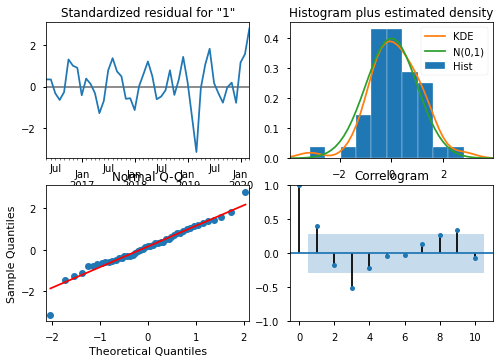

In [65]:
# creating the best model with SARIMAX
best_model = SARIMAX(test, order=auto_model.order, seasonal_order=auto_model.seasonal_order).fit()
display(best_model.summary())
best_model.plot_diagnostics();

(<Figure size 576x396 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f21cb6ddd10>)

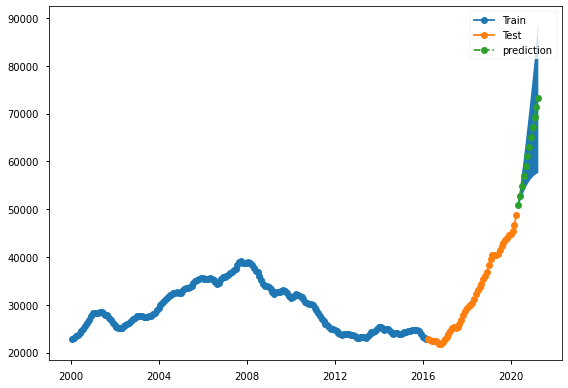

In [66]:
pred = best_model.get_forecast(steps=12)
pred_df = forecast_to_df(pred,zipcode)
display(plot_train_test_pred(train,test,pred_df));
plt.show()

19132


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  19132   No. Observations:                  243
Model:               SARIMAX(5, 2, 1)   Log Likelihood               -1616.190
Date:                Sat, 14 May 2022   AIC                           3246.380
Time:                        13:24:18   BIC                           3270.773
Sample:                    01-31-2000   HQIC                          3256.207
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0738      0.098     10.957      0.000       0.882       1.266
ar.L2         -0.2812      0.073     -3.833      0.000      -0.425      -0.137
ar.L3         -0.4384      0.065     -6.764      0.000      -0.565      -0.311
ar.L4          0.6349      0.083      7.660      0.000       0.472       0.797
ar.L5         -0.2524      0.070     -3.593      0.000      -0.390      -0.115
ma.L1         -0.9010      0.077    -11.631      0.000      -1.053      -0.749
sigma2      3.744e+04   3036.217     12.331      0.000    3.15e+04    4.34e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 4.60
Prob(Q):                              0.90   Prob(JB):                         0.10
Heteroskedasticity (H):               1.26   Skew:                             0.10
Prob(H) (two-sided):                  0.30   Kurtosis:                         3.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

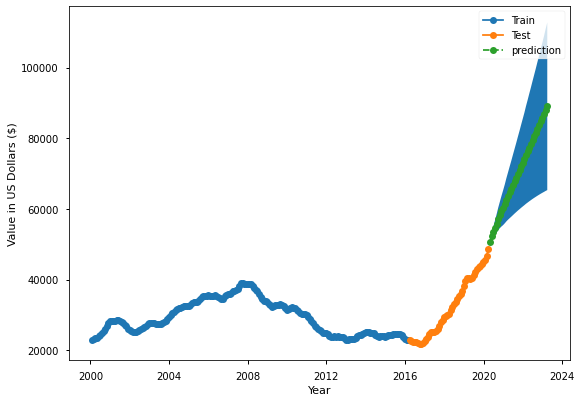

32208


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  32208   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1683.471
Date:                Sat, 14 May 2022   AIC                           3368.942
Time:                        13:24:18   BIC                           3372.426
Sample:                    01-31-2000   HQIC                          3370.346
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      6.834e+04   4849.856     14.091      0.000    5.88e+04    7.78e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.71   Jarque-Bera (JB):                16.94
Prob(Q):                              0.40   Prob(JB):                         0.00
Heteroskedasticity (H):              21.89   Skew:                            -0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

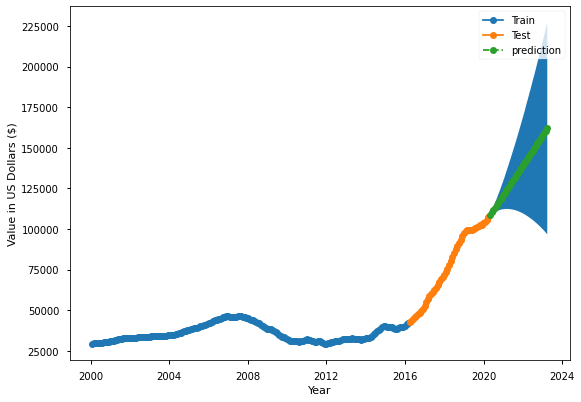

92285


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  92285   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1889.169
Date:                Sat, 14 May 2022   AIC                           3780.339
Time:                        13:24:19   BIC                           3783.823
Sample:                    01-31-2000   HQIC                          3781.743
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.751e+05   2.64e+04     14.217      0.000    3.23e+05    4.27e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.66   Jarque-Bera (JB):                17.82
Prob(Q):                              0.42   Prob(JB):                         0.00
Heteroskedasticity (H):               3.97   Skew:                            -0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

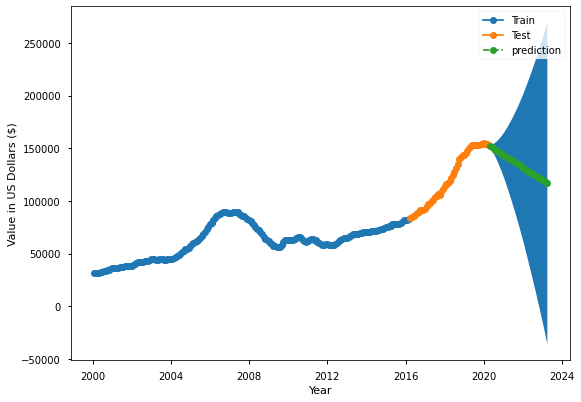

30310


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  30310   No. Observations:                  243
Model:               SARIMAX(4, 2, 2)   Log Likelihood               -1810.700
Date:                Sat, 14 May 2022   AIC                           3635.400
Time:                        13:24:24   BIC                           3659.793
Sample:                    01-31-2000   HQIC                          3645.227
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1275      0.114     -9.918      0.000      -1.350      -0.905
ar.L2         -0.2148      0.104     -2.060      0.039      -0.419      -0.010
ar.L3         -0.2518      0.049     -5.189      0.000      -0.347      -0.157
ar.L4         -0.3184      0.031    -10.207      0.000      -0.380      -0.257
ma.L1          1.3875      0.125     11.143      0.000       1.143       1.632
ma.L2          0.4942      0.126      3.917      0.000       0.247       0.741
sigma2      1.662e+05   1.16e+04     14.377      0.000    1.44e+05    1.89e+05
===================================================================================
Ljung-Box (L1) (Q):                   3.09   Jarque-Bera (JB):                63.68
Prob(Q):                              0.08   Prob(JB):                         0.00
Heteroskedasticity (H):               2.63   Skew:                            -0.52
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

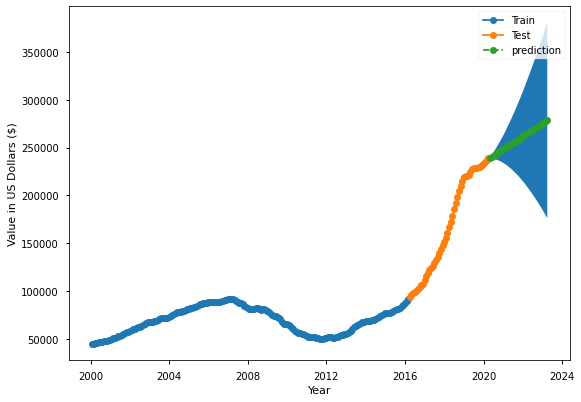

85034


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  85034   No. Observations:                  243
Model:               SARIMAX(1, 2, 1)   Log Likelihood               -1870.456
Date:                Sat, 14 May 2022   AIC                           3746.913
Time:                        13:24:26   BIC                           3757.367
Sample:                    01-31-2000   HQIC                          3751.124
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8611      0.069     12.440      0.000       0.725       0.997
ma.L1         -0.9394      0.056    -16.880      0.000      -1.049      -0.830
sigma2       3.18e+05   2.94e+04     10.813      0.000     2.6e+05    3.76e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.70   Jarque-Bera (JB):                 0.82
Prob(Q):                              0.40   Prob(JB):                         0.66
Heteroskedasticity (H):               2.46   Skew:                            -0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

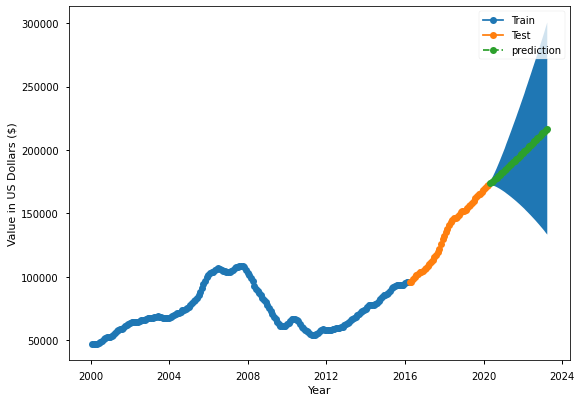

33815


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  33815   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1786.779
Date:                Sat, 14 May 2022   AIC                           3575.559
Time:                        13:24:27   BIC                           3579.043
Sample:                    01-31-2000   HQIC                          3576.963
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.606e+05   1.54e+04     10.457      0.000    1.31e+05    1.91e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.48   Jarque-Bera (JB):                 0.97
Prob(Q):                              0.49   Prob(JB):                         0.62
Heteroskedasticity (H):               1.27   Skew:                            -0.12
Prob(H) (two-sided):                  0.29   Kurtosis:                         2.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

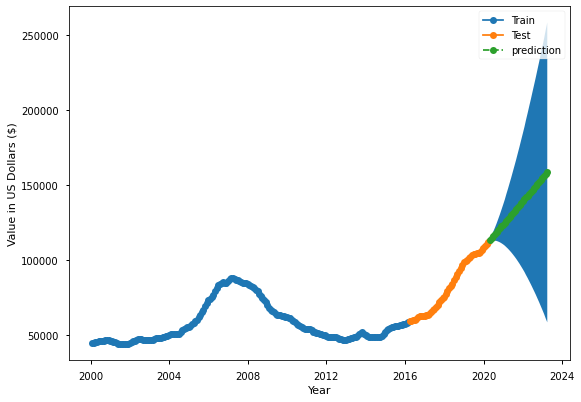

33605


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  33605   No. Observations:                  243
Model:               SARIMAX(3, 2, 0)   Log Likelihood               -1779.001
Date:                Sat, 14 May 2022   AIC                           3566.002
Time:                        13:24:28   BIC                           3579.941
Sample:                    01-31-2000   HQIC                          3571.618
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1377      0.041      3.376      0.001       0.058       0.218
ar.L2          0.0216      0.052      0.415      0.678      -0.080       0.123
ar.L3         -0.2455      0.022    -10.936      0.000      -0.290      -0.202
sigma2      1.389e+05   1.11e+04     12.468      0.000    1.17e+05    1.61e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.43   Jarque-Bera (JB):                20.77
Prob(Q):                              0.51   Prob(JB):                         0.00
Heteroskedasticity (H):               1.30   Skew:                            -0.53
Prob(H) (two-sided):                  0.24   Kurtosis:                         3.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

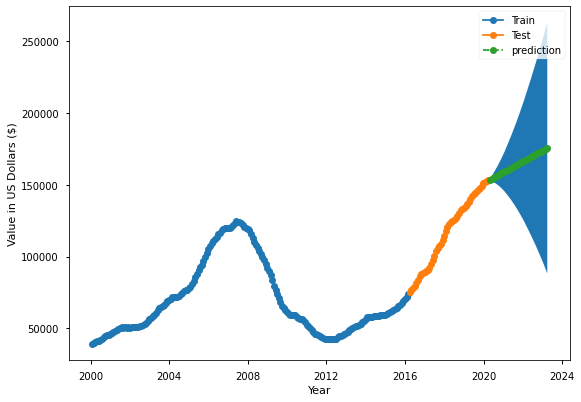

75226


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  75226   No. Observations:                  243
Model:               SARIMAX(3, 2, 0)   Log Likelihood               -1912.503
Date:                Sat, 14 May 2022   AIC                           3833.006
Time:                        13:24:29   BIC                           3846.945
Sample:                    01-31-2000   HQIC                          3838.622
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1175      0.028      4.157      0.000       0.062       0.173
ar.L2         -0.0047      0.042     -0.111      0.912      -0.087       0.078
ar.L3         -0.2535      0.014    -18.191      0.000      -0.281      -0.226
sigma2       3.91e+05   1.62e+04     24.205      0.000    3.59e+05    4.23e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.07   Jarque-Bera (JB):               616.90
Prob(Q):                              0.30   Prob(JB):                         0.00
Heteroskedasticity (H):               4.77   Skew:                            -0.96
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

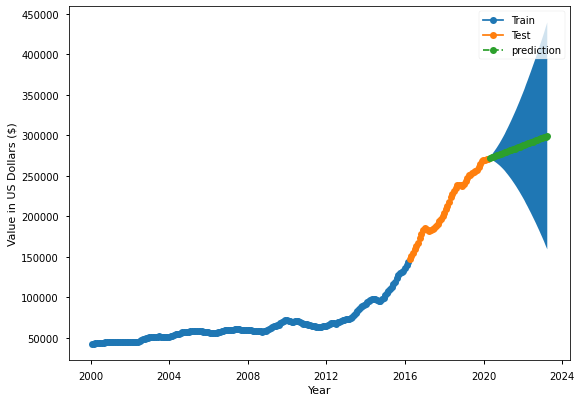

19139


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  19139   No. Observations:                  243
Model:               SARIMAX(4, 2, 1)   Log Likelihood               -1732.364
Date:                Sat, 14 May 2022   AIC                           3476.729
Time:                        13:24:34   BIC                           3497.637
Sample:                    01-31-2000   HQIC                          3485.152
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9551      0.056    -16.909      0.000      -1.066      -0.844
ar.L2          0.0314      0.084      0.374      0.708      -0.133       0.196
ar.L3         -0.2507      0.057     -4.423      0.000      -0.362      -0.140
ar.L4         -0.3589      0.028    -12.822      0.000      -0.414      -0.304
ma.L1          0.9746      0.021     46.074      0.000       0.933       1.016
sigma2      9.199e+04   9161.436     10.041      0.000     7.4e+04     1.1e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.54
Prob(Q):                              0.99   Prob(JB):                         0.77
Heteroskedasticity (H):               0.91   Skew:                            -0.07
Prob(H) (two-sided):                  0.67   Kurtosis:                         2.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

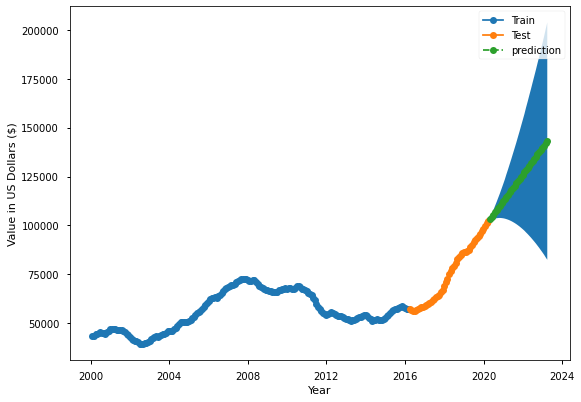

48340


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  48340   No. Observations:                  243
Model:               SARIMAX(3, 2, 0)   Log Likelihood               -1623.101
Date:                Sat, 14 May 2022   AIC                           3254.201
Time:                        13:24:37   BIC                           3268.140
Sample:                    01-31-2000   HQIC                          3259.817
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0482      0.033      1.457      0.145      -0.017       0.113
ar.L2         -0.0663      0.046     -1.429      0.153      -0.157       0.025
ar.L3         -0.3385      0.025    -13.623      0.000      -0.387      -0.290
sigma2      3.708e+04   3071.996     12.070      0.000    3.11e+04    4.31e+04
===================================================================================
Ljung-Box (L1) (Q):                   1.76   Jarque-Bera (JB):                 1.86
Prob(Q):                              0.19   Prob(JB):                         0.39
Heteroskedasticity (H):               1.93   Skew:                            -0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

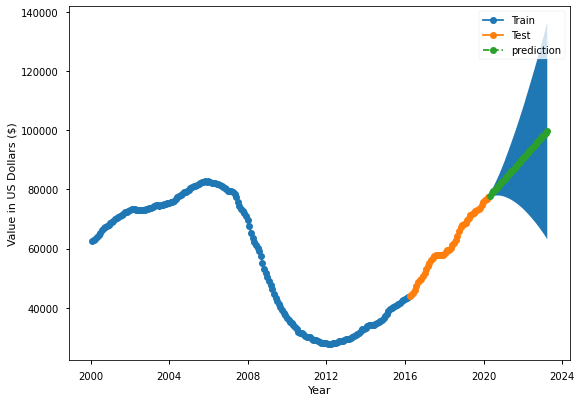

75217


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  75217   No. Observations:                  243
Model:               SARIMAX(4, 2, 1)   Log Likelihood               -1715.599
Date:                Sat, 14 May 2022   AIC                           3443.198
Time:                        13:24:42   BIC                           3464.107
Sample:                    01-31-2000   HQIC                          3451.622
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9985      0.063    -15.836      0.000      -1.122      -0.875
ar.L2         -0.0738      0.060     -1.236      0.216      -0.191       0.043
ar.L3         -0.2843      0.039     -7.285      0.000      -0.361      -0.208
ar.L4         -0.3114      0.021    -14.541      0.000      -0.353      -0.269
ma.L1          0.9159      0.059     15.652      0.000       0.801       1.031
sigma2      7.511e+04   5016.646     14.971      0.000    6.53e+04    8.49e+04
===================================================================================
Ljung-Box (L1) (Q):                   2.42   Jarque-Bera (JB):                49.35
Prob(Q):                              0.12   Prob(JB):                         0.00
Heteroskedasticity (H):               2.51   Skew:                            -0.46
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

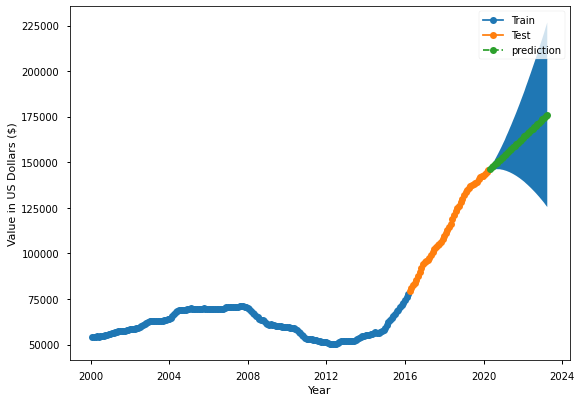

38127


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  38127   No. Observations:                  243
Model:               SARIMAX(4, 2, 1)   Log Likelihood               -1613.319
Date:                Sat, 14 May 2022   AIC                           3238.638
Time:                        13:24:48   BIC                           3259.547
Sample:                    01-31-2000   HQIC                          3247.062
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9145      0.098      9.292      0.000       0.722       1.107
ar.L2         -0.0250      0.062     -0.400      0.689      -0.147       0.097
ar.L3         -0.3530      0.052     -6.782      0.000      -0.455      -0.251
ar.L4          0.2524      0.058      4.381      0.000       0.139       0.365
ma.L1         -0.9098      0.079    -11.559      0.000      -1.064      -0.756
sigma2      3.472e+04   3021.966     11.488      0.000    2.88e+04    4.06e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):                 1.34
Prob(Q):                              0.64   Prob(JB):                         0.51
Heteroskedasticity (H):               2.82   Skew:                             0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

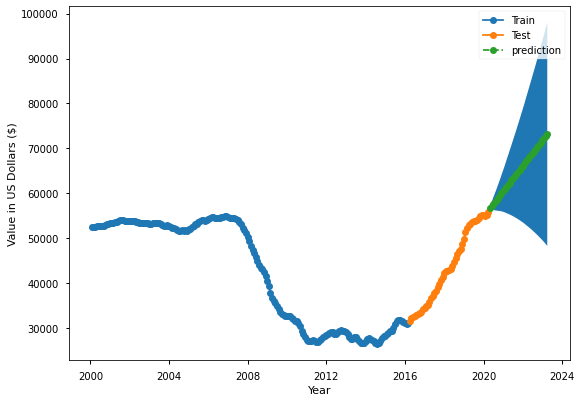

73106


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  73106   No. Observations:                  243
Model:               SARIMAX(3, 2, 0)   Log Likelihood               -1873.152
Date:                Sat, 14 May 2022   AIC                           3754.304
Time:                        13:24:49   BIC                           3768.243
Sample:                    01-31-2000   HQIC                          3759.920
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0254      0.039      0.656      0.512      -0.050       0.101
ar.L2          0.0706      0.021      3.400      0.001       0.030       0.111
ar.L3         -0.2782      0.015    -19.006      0.000      -0.307      -0.250
sigma2      2.682e+05   2.07e+04     12.966      0.000    2.28e+05    3.09e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.00   Jarque-Bera (JB):                17.57
Prob(Q):                              0.32   Prob(JB):                         0.00
Heteroskedasticity (H):               2.09   Skew:                            -0.34
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

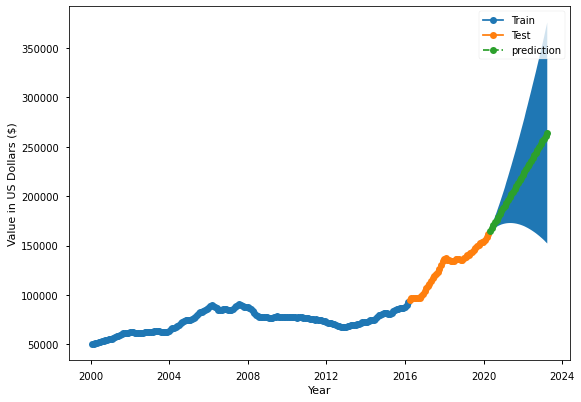

76164


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  76164   No. Observations:                  243
Model:               SARIMAX(5, 2, 2)   Log Likelihood               -1772.971
Date:                Sat, 14 May 2022   AIC                           3561.942
Time:                        13:24:55   BIC                           3589.820
Sample:                    01-31-2000   HQIC                          3573.174
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0346      0.072     14.353      0.000       0.893       1.176
ar.L2         -0.8692      0.079    -10.945      0.000      -1.025      -0.714
ar.L3         -0.1878      0.046     -4.073      0.000      -0.278      -0.097
ar.L4          0.2179      0.041      5.260      0.000       0.137       0.299
ar.L5         -0.3025      0.029    -10.594      0.000      -0.358      -0.247
ma.L1         -1.0226      0.071    -14.386      0.000      -1.162      -0.883
ma.L2          0.8034      0.070     11.480      0.000       0.666       0.941
sigma2      1.217e+05   1.26e+04      9.678      0.000    9.71e+04    1.46e+05
===================================================================================
Ljung-Box (L1) (Q):                   3.00   Jarque-Bera (JB):                 2.88
Prob(Q):                              0.08   Prob(JB):                         0.24
Heteroskedasticity (H):               0.78   Skew:                            -0.26
Prob(H) (two-sided):                  0.26   Kurtosis:                         2.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

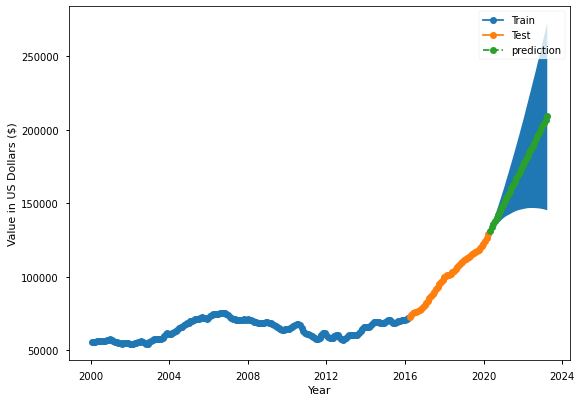

75224


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  75224   No. Observations:                  243
Model:               SARIMAX(4, 2, 1)   Log Likelihood               -1733.527
Date:                Sat, 14 May 2022   AIC                           3479.054
Time:                        13:25:00   BIC                           3499.963
Sample:                    01-31-2000   HQIC                          3487.478
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7675      0.049    -15.630      0.000      -0.864      -0.671
ar.L2          0.2567      0.050      5.164      0.000       0.159       0.354
ar.L3         -0.2221      0.032     -6.863      0.000      -0.286      -0.159
ar.L4         -0.3386      0.022    -15.173      0.000      -0.382      -0.295
ma.L1          0.9507      0.048     19.988      0.000       0.858       1.044
sigma2      8.494e+04   6228.452     13.637      0.000    7.27e+04    9.71e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):                29.10
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):               2.69   Skew:                            -0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

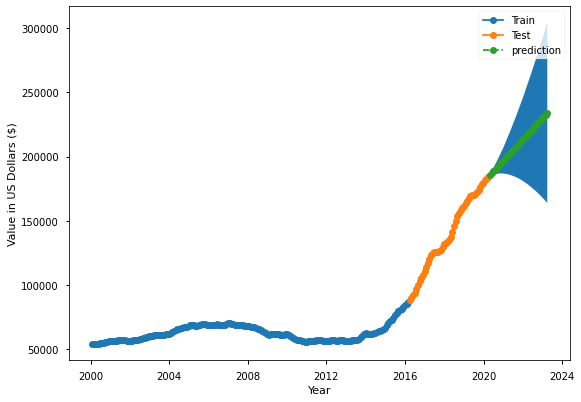

85040


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  85040   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1805.660
Date:                Sat, 14 May 2022   AIC                           3613.319
Time:                        13:25:01   BIC                           3616.804
Sample:                    01-31-2000   HQIC                          3614.723
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.878e+05   1.45e+04     12.932      0.000    1.59e+05    2.16e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 6.66
Prob(Q):                              0.91   Prob(JB):                         0.04
Heteroskedasticity (H):               1.93   Skew:                            -0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

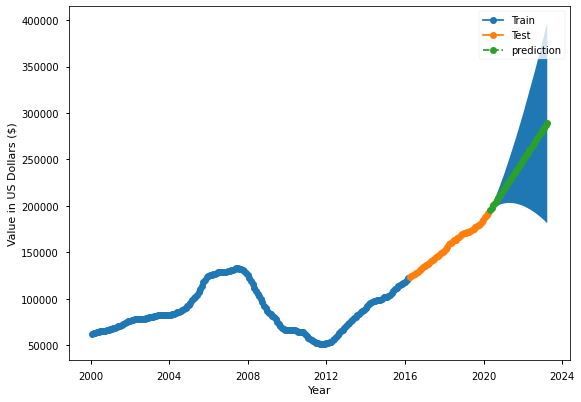

33714


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  33714   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1762.803
Date:                Sat, 14 May 2022   AIC                           3527.607
Time:                        13:25:01   BIC                           3531.091
Sample:                    01-31-2000   HQIC                          3529.011
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.317e+05   1.06e+04     12.441      0.000    1.11e+05    1.52e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.99   Jarque-Bera (JB):                 4.58
Prob(Q):                              0.32   Prob(JB):                         0.10
Heteroskedasticity (H):               2.54   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

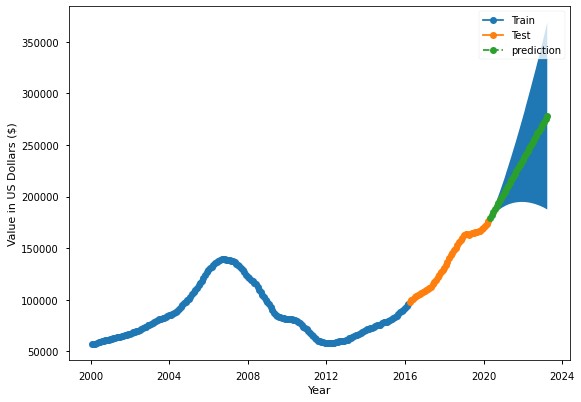

48030


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  48030   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1742.139
Date:                Sat, 14 May 2022   AIC                           3486.279
Time:                        13:25:02   BIC                           3489.763
Sample:                    01-31-2000   HQIC                          3487.682
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       1.11e+05   8954.879     12.398      0.000    9.35e+04    1.29e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 2.96
Prob(Q):                              0.72   Prob(JB):                         0.23
Heteroskedasticity (H):               3.63   Skew:                            -0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

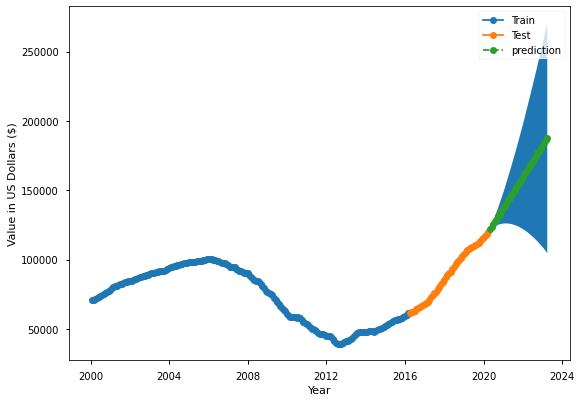

33711


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  33711   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1807.965
Date:                Sat, 14 May 2022   AIC                           3617.931
Time:                        13:25:03   BIC                           3621.416
Sample:                    01-31-2000   HQIC                          3619.335
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.914e+05   1.99e+04      9.640      0.000    1.53e+05     2.3e+05
===================================================================================
Ljung-Box (L1) (Q):                   2.07   Jarque-Bera (JB):                 2.30
Prob(Q):                              0.15   Prob(JB):                         0.32
Heteroskedasticity (H):               1.17   Skew:                             0.04
Prob(H) (two-sided):                  0.49   Kurtosis:                         2.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

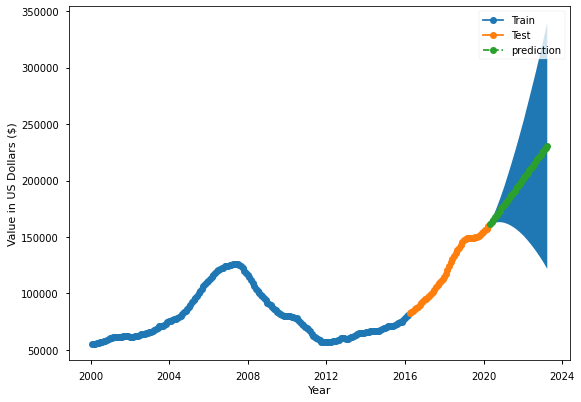

33846


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  33846   No. Observations:                  243
Model:               SARIMAX(3, 2, 0)   Log Likelihood               -1795.602
Date:                Sat, 14 May 2022   AIC                           3599.205
Time:                        13:25:04   BIC                           3613.144
Sample:                    01-31-2000   HQIC                          3604.820
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0363      0.046     -0.793      0.428      -0.126       0.053
ar.L2         -0.0464      0.051     -0.903      0.367      -0.147       0.054
ar.L3         -0.2429      0.016    -15.318      0.000      -0.274      -0.212
sigma2      1.529e+05   1.27e+04     12.022      0.000    1.28e+05    1.78e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.48   Jarque-Bera (JB):                 9.88
Prob(Q):                              0.49   Prob(JB):                         0.01
Heteroskedasticity (H):               0.87   Skew:                            -0.15
Prob(H) (two-sided):                  0.53   Kurtosis:                         3.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

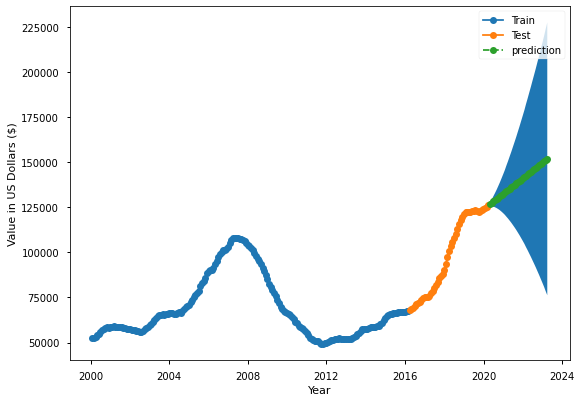

64109


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  64109   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1805.305
Date:                Sat, 14 May 2022   AIC                           3612.611
Time:                        13:25:05   BIC                           3616.096
Sample:                    01-31-2000   HQIC                          3614.015
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.873e+05    1.7e+04     11.040      0.000    1.54e+05    2.21e+05
===================================================================================
Ljung-Box (L1) (Q):                   2.49   Jarque-Bera (JB):                 1.38
Prob(Q):                              0.11   Prob(JB):                         0.50
Heteroskedasticity (H):               1.68   Skew:                            -0.18
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

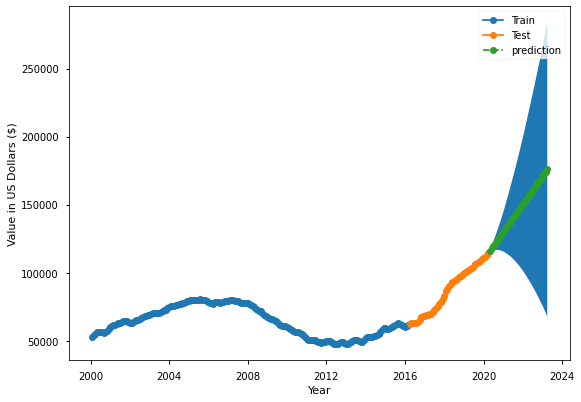

75235


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  75235   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1839.356
Date:                Sat, 14 May 2022   AIC                           3680.712
Time:                        13:25:05   BIC                           3684.197
Sample:                    01-31-2000   HQIC                          3682.116
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.483e+05   1.75e+04     14.183      0.000    2.14e+05    2.83e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.87   Jarque-Bera (JB):                17.31
Prob(Q):                              0.17   Prob(JB):                         0.00
Heteroskedasticity (H):               2.97   Skew:                             0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

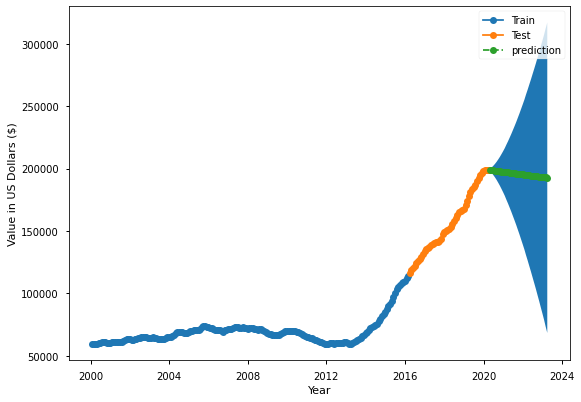

34950


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  34950   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1755.829
Date:                Sat, 14 May 2022   AIC                           3513.658
Time:                        13:25:06   BIC                           3517.143
Sample:                    01-31-2000   HQIC                          3515.062
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.243e+05   9083.669     13.688      0.000    1.07e+05    1.42e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):                13.06
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):               1.26   Skew:                            -0.15
Prob(H) (two-sided):                  0.31   Kurtosis:                         4.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

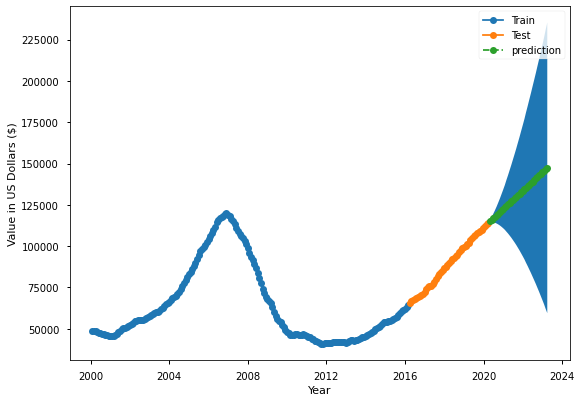

32805


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  32805   No. Observations:                  243
Model:               SARIMAX(3, 2, 0)   Log Likelihood               -1809.528
Date:                Sat, 14 May 2022   AIC                           3627.056
Time:                        13:25:08   BIC                           3640.995
Sample:                    01-31-2000   HQIC                          3632.672
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0332      0.068     -0.488      0.626      -0.167       0.100
ar.L2          0.0275      0.027      1.000      0.317      -0.026       0.081
ar.L3         -0.2108      0.016    -13.185      0.000      -0.242      -0.179
sigma2      1.743e+05    1.2e+04     14.517      0.000    1.51e+05    1.98e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.78   Jarque-Bera (JB):                27.65
Prob(Q):                              0.38   Prob(JB):                         0.00
Heteroskedasticity (H):               2.63   Skew:                            -0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

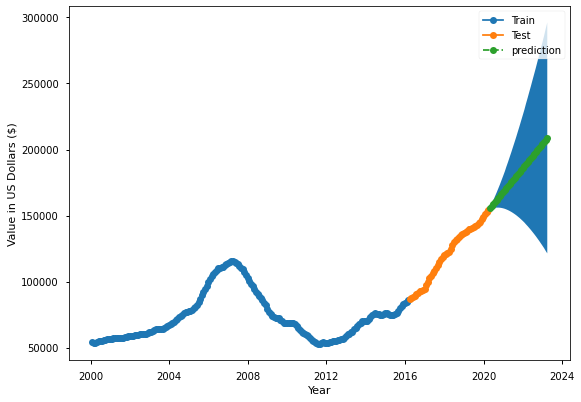

75141


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  75141   No. Observations:                  243
Model:               SARIMAX(4, 2, 1)   Log Likelihood               -1794.969
Date:                Sat, 14 May 2022   AIC                           3601.937
Time:                        13:25:13   BIC                           3622.846
Sample:                    01-31-2000   HQIC                          3610.361
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8502      0.044    -19.146      0.000      -0.937      -0.763
ar.L2          0.0817      0.054      1.507      0.132      -0.025       0.188
ar.L3         -0.2824      0.031     -9.108      0.000      -0.343      -0.222
ar.L4         -0.3279      0.018    -17.857      0.000      -0.364      -0.292
ma.L1          0.9465      0.036     26.436      0.000       0.876       1.017
sigma2      1.344e+05   1.04e+04     12.869      0.000    1.14e+05    1.55e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                28.25
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.50
Prob(H) (two-sided):                  0.36   Kurtosis:                         4.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

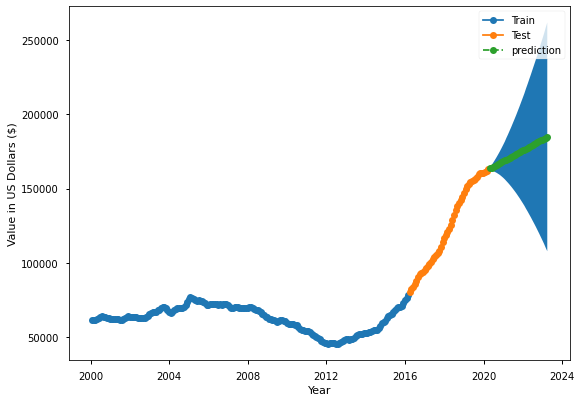

75232


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  75232   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1763.107
Date:                Sat, 14 May 2022   AIC                           3528.214
Time:                        13:25:14   BIC                           3531.698
Sample:                    01-31-2000   HQIC                          3529.618
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.321e+05   1.07e+04     12.377      0.000    1.11e+05    1.53e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                 2.90
Prob(Q):                              0.70   Prob(JB):                         0.23
Heteroskedasticity (H):               3.44   Skew:                            -0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

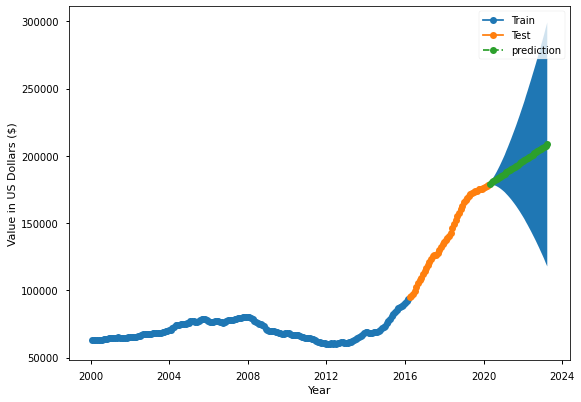

75211


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  75211   No. Observations:                  243
Model:               SARIMAX(3, 2, 0)   Log Likelihood               -1760.077
Date:                Sat, 14 May 2022   AIC                           3528.153
Time:                        13:25:15   BIC                           3542.093
Sample:                    01-31-2000   HQIC                          3533.769
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0108      0.030     -0.363      0.717      -0.069       0.047
ar.L2          0.0470      0.029      1.594      0.111      -0.011       0.105
ar.L3         -0.2003      0.017    -12.078      0.000      -0.233      -0.168
sigma2      1.143e+05   7133.861     16.016      0.000       1e+05    1.28e+05
===================================================================================
Ljung-Box (L1) (Q):                   2.50   Jarque-Bera (JB):                67.43
Prob(Q):                              0.11   Prob(JB):                         0.00
Heteroskedasticity (H):               3.51   Skew:                            -0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

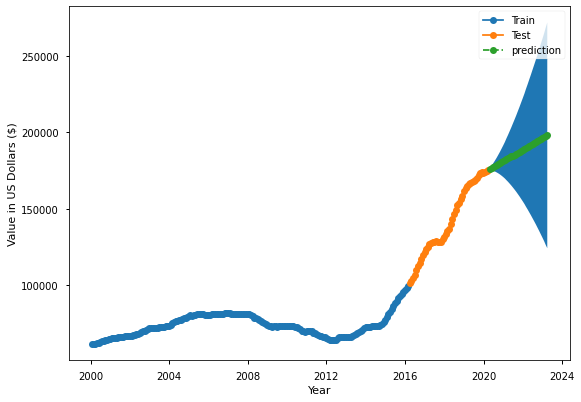

75203


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  75203   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1826.099
Date:                Sat, 14 May 2022   AIC                           3654.199
Time:                        13:25:15   BIC                           3657.684
Sample:                    01-31-2000   HQIC                          3655.603
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.224e+05   1.87e+04     11.869      0.000    1.86e+05    2.59e+05
===================================================================================
Ljung-Box (L1) (Q):                   2.89   Jarque-Bera (JB):                 1.70
Prob(Q):                              0.09   Prob(JB):                         0.43
Heteroskedasticity (H):               1.10   Skew:                             0.13
Prob(H) (two-sided):                  0.68   Kurtosis:                         3.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

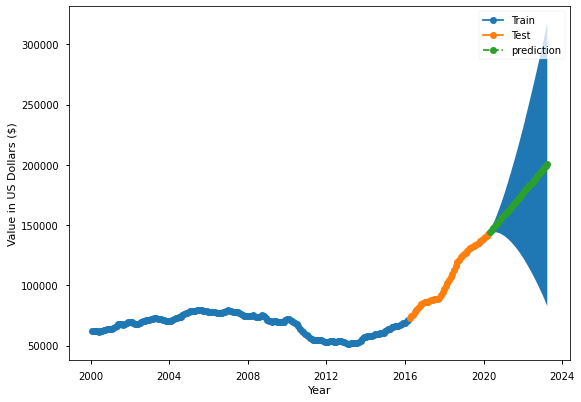

32211


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  32211   No. Observations:                  243
Model:               SARIMAX(3, 2, 0)   Log Likelihood               -1697.390
Date:                Sat, 14 May 2022   AIC                           3402.780
Time:                        13:25:17   BIC                           3416.719
Sample:                    01-31-2000   HQIC                          3408.395
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1035      0.033      3.103      0.002       0.038       0.169
ar.L2          0.0307      0.053      0.578      0.563      -0.073       0.135
ar.L3         -0.2062      0.020    -10.154      0.000      -0.246      -0.166
sigma2      7.097e+04   5463.918     12.989      0.000    6.03e+04    8.17e+04
===================================================================================
Ljung-Box (L1) (Q):                   2.52   Jarque-Bera (JB):                 5.68
Prob(Q):                              0.11   Prob(JB):                         0.06
Heteroskedasticity (H):               3.89   Skew:                            -0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

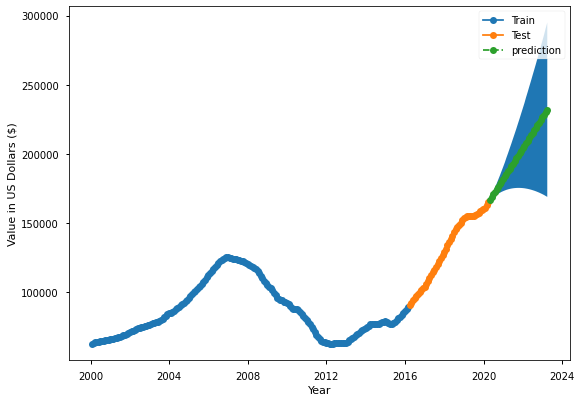

64124


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  64124   No. Observations:                  243
Model:               SARIMAX(3, 2, 4)   Log Likelihood               -1772.144
Date:                Sat, 14 May 2022   AIC                           3560.288
Time:                        13:25:29   BIC                           3588.166
Sample:                    01-31-2000   HQIC                          3571.520
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9948      0.071    -14.000      0.000      -1.134      -0.856
ar.L2          0.4846      0.090      5.366      0.000       0.308       0.662
ar.L3          0.5883      0.068      8.685      0.000       0.456       0.721
ma.L1          1.0754      0.078     13.857      0.000       0.923       1.227
ma.L2         -0.4436      0.079     -5.585      0.000      -0.599      -0.288
ma.L3         -0.9462      0.075    -12.626      0.000      -1.093      -0.799
ma.L4         -0.3632      0.037     -9.813      0.000      -0.436      -0.291
sigma2       1.17e+05   1.01e+04     11.634      0.000    9.73e+04    1.37e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                11.98
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.69   Skew:                            -0.40
Prob(H) (two-sided):                  0.10   Kurtosis:                         3.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

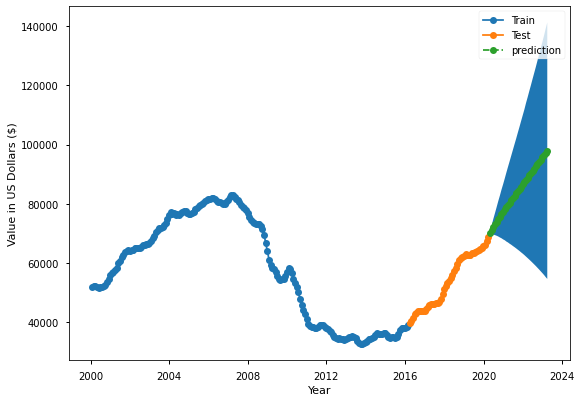

30311


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  30311   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1849.850
Date:                Sat, 14 May 2022   AIC                           3701.700
Time:                        13:25:29   BIC                           3705.184
Sample:                    01-31-2000   HQIC                          3703.104
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.708e+05   2.05e+04     13.202      0.000    2.31e+05    3.11e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                10.06
Prob(Q):                              0.72   Prob(JB):                         0.01
Heteroskedasticity (H):               4.00   Skew:                            -0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

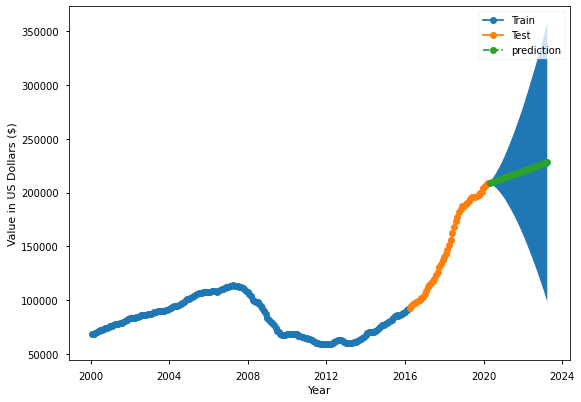

23224


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  23224   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1832.158
Date:                Sat, 14 May 2022   AIC                           3666.316
Time:                        13:25:30   BIC                           3669.801
Sample:                    01-31-2000   HQIC                          3667.720
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.339e+05   1.92e+04     12.202      0.000    1.96e+05    2.71e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.25   Jarque-Bera (JB):                 4.19
Prob(Q):                              0.26   Prob(JB):                         0.12
Heteroskedasticity (H):               4.09   Skew:                             0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

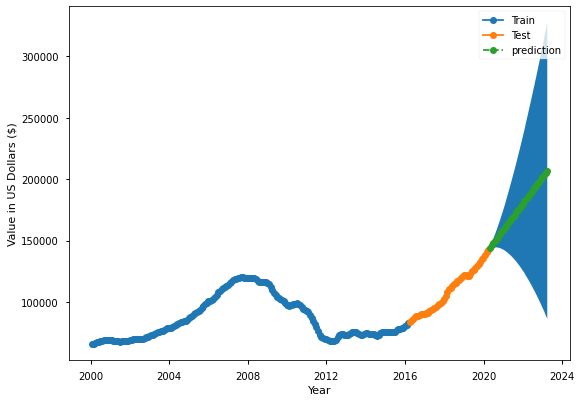

75216


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  75216   No. Observations:                  243
Model:               SARIMAX(4, 2, 4)   Log Likelihood               -1733.141
Date:                Sat, 14 May 2022   AIC                           3484.282
Time:                        13:25:43   BIC                           3515.646
Sample:                    01-31-2000   HQIC                          3496.918
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4537      0.054     -8.471      0.000      -0.559      -0.349
ar.L2          0.5853      0.070      8.324      0.000       0.448       0.723
ar.L3         -0.3311      0.052     -6.319      0.000      -0.434      -0.228
ar.L4         -0.8352      0.044    -18.980      0.000      -0.921      -0.749
ma.L1          0.4409      0.074      5.999      0.000       0.297       0.585
ma.L2         -0.5911      0.096     -6.149      0.000      -0.780      -0.403
ma.L3          0.1619      0.067      2.428      0.015       0.031       0.293
ma.L4          0.7438      0.057     13.151      0.000       0.633       0.855
sigma2      9.322e+04   8515.944     10.946      0.000    7.65e+04     1.1e+05
===================================================================================
Ljung-Box (L1) (Q):                   3.16   Jarque-Bera (JB):                10.14
Prob(Q):                              0.08   Prob(JB):                         0.01
Heteroskedasticity (H):               0.84   Skew:                            -0.37
Prob(H) (two-sided):                  0.44   Kurtosis:                         3.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

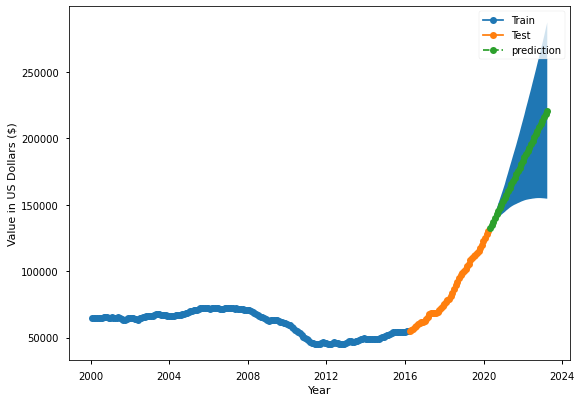

33610


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  33610   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1808.466
Date:                Sat, 14 May 2022   AIC                           3618.931
Time:                        13:25:44   BIC                           3622.416
Sample:                    01-31-2000   HQIC                          3620.335
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.922e+05   1.32e+04     14.574      0.000    1.66e+05    2.18e+05
===================================================================================
Ljung-Box (L1) (Q):                   2.46   Jarque-Bera (JB):                24.27
Prob(Q):                              0.12   Prob(JB):                         0.00
Heteroskedasticity (H):               1.57   Skew:                            -0.19
Prob(H) (two-sided):                  0.05   Kurtosis:                         4.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

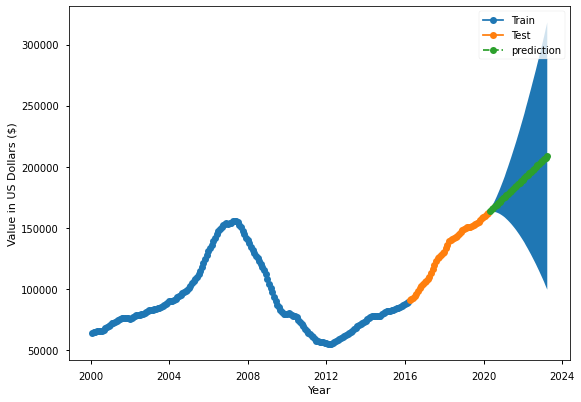

75150


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  75150   No. Observations:                  243
Model:               SARIMAX(4, 2, 1)   Log Likelihood               -1740.820
Date:                Sat, 14 May 2022   AIC                           3493.639
Time:                        13:25:48   BIC                           3514.548
Sample:                    01-31-2000   HQIC                          3502.063
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8188      0.097     -8.471      0.000      -1.008      -0.629
ar.L2          0.1511      0.051      2.947      0.003       0.051       0.252
ar.L3         -0.1519      0.030     -5.049      0.000      -0.211      -0.093
ar.L4         -0.2305      0.025     -9.087      0.000      -0.280      -0.181
ma.L1          0.9149      0.102      8.999      0.000       0.716       1.114
sigma2      9.867e+04   6980.149     14.136      0.000     8.5e+04    1.12e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                48.75
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               2.61   Skew:                            -0.52
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

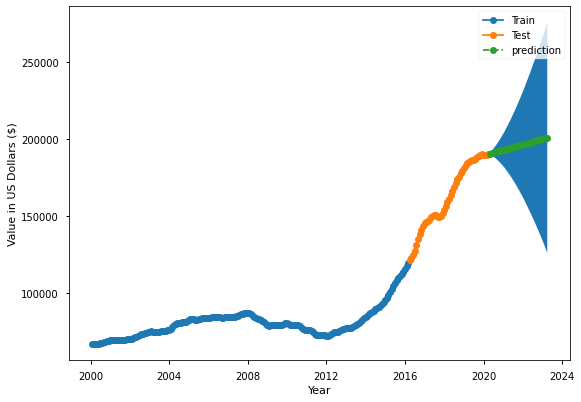

75223


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  75223   No. Observations:                  243
Model:               SARIMAX(3, 2, 0)   Log Likelihood               -1864.727
Date:                Sat, 14 May 2022   AIC                           3737.454
Time:                        13:25:49   BIC                           3751.393
Sample:                    01-31-2000   HQIC                          3743.070
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0894      0.027      3.261      0.001       0.036       0.143
ar.L2          0.0320      0.028      1.128      0.260      -0.024       0.088
ar.L3         -0.1508      0.015     -9.834      0.000      -0.181      -0.121
sigma2      2.675e+05   1.84e+04     14.499      0.000    2.31e+05    3.04e+05
===================================================================================
Ljung-Box (L1) (Q):                   2.28   Jarque-Bera (JB):                18.04
Prob(Q):                              0.13   Prob(JB):                         0.00
Heteroskedasticity (H):               1.83   Skew:                            -0.37
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

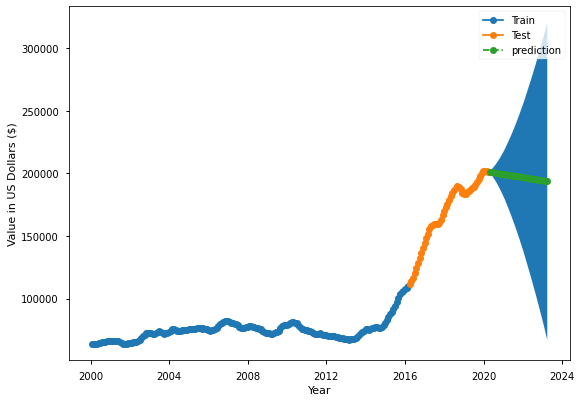

75227


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  75227   No. Observations:                  243
Model:               SARIMAX(3, 2, 0)   Log Likelihood               -1741.584
Date:                Sat, 14 May 2022   AIC                           3491.169
Time:                        13:25:51   BIC                           3505.108
Sample:                    01-31-2000   HQIC                          3496.785
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0088      0.034      0.258      0.796      -0.058       0.075
ar.L2          0.0644      0.036      1.790      0.074      -0.006       0.135
ar.L3         -0.2318      0.014    -16.764      0.000      -0.259      -0.205
sigma2      9.451e+04   6206.525     15.227      0.000    8.23e+04    1.07e+05
===================================================================================
Ljung-Box (L1) (Q):                   3.54   Jarque-Bera (JB):                33.43
Prob(Q):                              0.06   Prob(JB):                         0.00
Heteroskedasticity (H):               2.21   Skew:                            -0.48
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

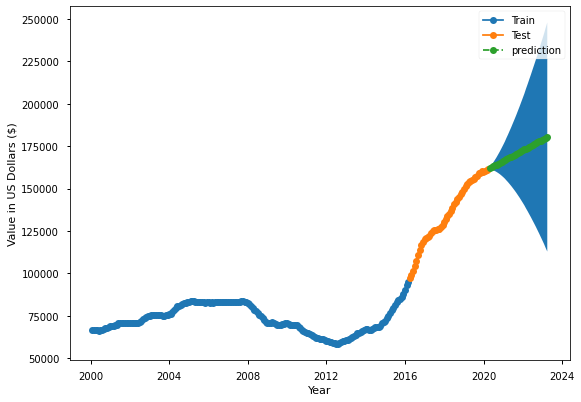

99039


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  99039   No. Observations:                  243
Model:               SARIMAX(3, 2, 0)   Log Likelihood               -1877.581
Date:                Sat, 14 May 2022   AIC                           3763.162
Time:                        13:25:52   BIC                           3777.101
Sample:                    01-31-2000   HQIC                          3768.777
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0689      0.021      3.211      0.001       0.027       0.111
ar.L2         -0.0829      0.036     -2.318      0.020      -0.153      -0.013
ar.L3         -0.1951      0.013    -15.045      0.000      -0.220      -0.170
sigma2      2.846e+05   2.23e+04     12.752      0.000    2.41e+05    3.28e+05
===================================================================================
Ljung-Box (L1) (Q):                   5.89   Jarque-Bera (JB):                11.63
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               2.90   Skew:                            -0.37
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

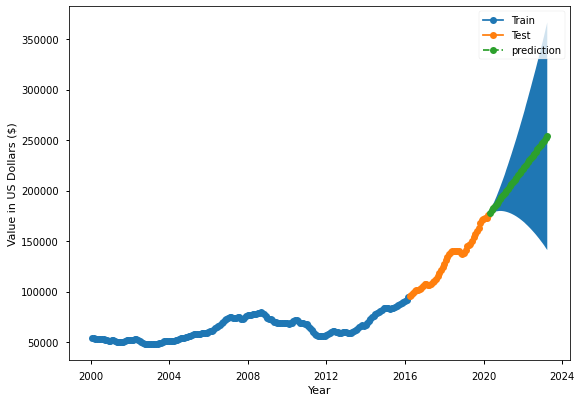

30354


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  30354   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1856.484
Date:                Sat, 14 May 2022   AIC                           3714.968
Time:                        13:25:53   BIC                           3718.453
Sample:                    01-31-2000   HQIC                          3716.372
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.861e+05    2.4e+04     11.943      0.000    2.39e+05    3.33e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.39   Jarque-Bera (JB):                 3.67
Prob(Q):                              0.53   Prob(JB):                         0.16
Heteroskedasticity (H):               2.23   Skew:                            -0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

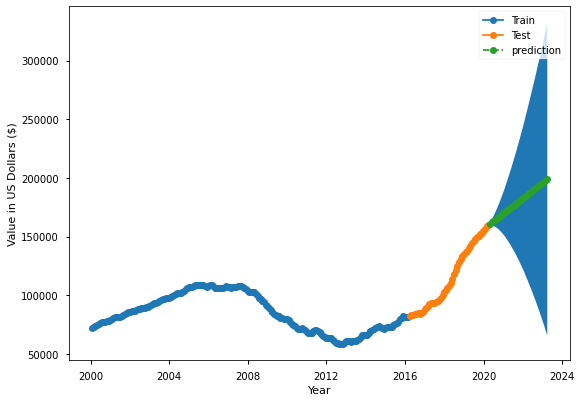

75149


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  75149   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1713.568
Date:                Sat, 14 May 2022   AIC                           3429.136
Time:                        13:25:54   BIC                           3432.621
Sample:                    01-31-2000   HQIC                          3430.540
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      8.765e+04   5998.432     14.612      0.000    7.59e+04    9.94e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):                31.55
Prob(Q):                              0.65   Prob(JB):                         0.00
Heteroskedasticity (H):               3.70   Skew:                            -0.44
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

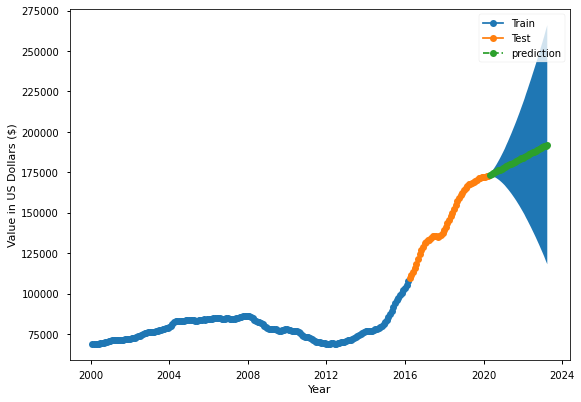

75208


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  75208   No. Observations:                  243
Model:               SARIMAX(1, 2, 1)   Log Likelihood               -1941.914
Date:                Sat, 14 May 2022   AIC                           3889.828
Time:                        13:25:56   BIC                           3900.282
Sample:                    01-31-2000   HQIC                          3894.040
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8078      0.134      6.038      0.000       0.546       1.070
ma.L1         -0.8860      0.129     -6.847      0.000      -1.140      -0.632
sigma2      5.829e+05   2.71e+04     21.519      0.000     5.3e+05    6.36e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):               711.93
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):              13.95   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

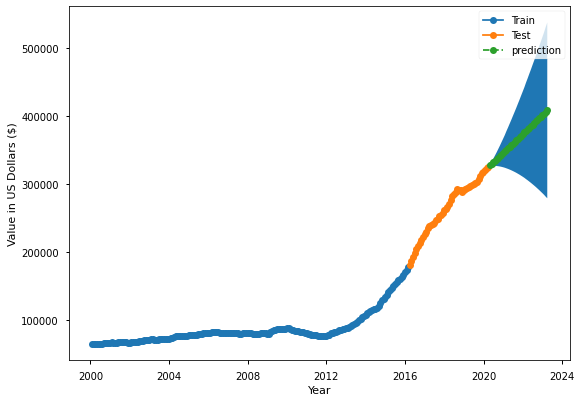

34690


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  34690   No. Observations:                  243
Model:               SARIMAX(3, 2, 0)   Log Likelihood               -1795.299
Date:                Sat, 14 May 2022   AIC                           3598.599
Time:                        13:25:58   BIC                           3612.538
Sample:                    01-31-2000   HQIC                          3604.215
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0806      0.030      2.678      0.007       0.022       0.140
ar.L2         -0.0186      0.042     -0.446      0.656      -0.101       0.063
ar.L3         -0.1883      0.016    -11.971      0.000      -0.219      -0.158
sigma2      1.539e+05   9517.579     16.174      0.000    1.35e+05    1.73e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.37   Jarque-Bera (JB):                73.60
Prob(Q):                              0.24   Prob(JB):                         0.00
Heteroskedasticity (H):               1.62   Skew:                            -0.64
Prob(H) (two-sided):                  0.03   Kurtosis:                         5.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

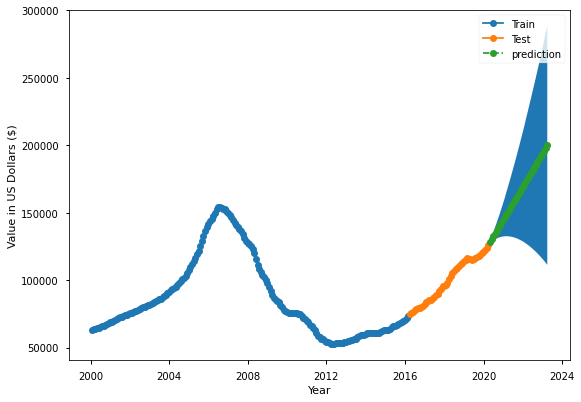

33619


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  33619   No. Observations:                  243
Model:               SARIMAX(0, 2, 1)   Log Likelihood               -1799.609
Date:                Sat, 14 May 2022   AIC                           3603.217
Time:                        13:25:59   BIC                           3610.187
Sample:                    01-31-2000   HQIC                          3606.025
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0685      0.025      2.704      0.007       0.019       0.118
sigma2      1.773e+05   1.21e+04     14.635      0.000    1.54e+05    2.01e+05
===================================================================================
Ljung-Box (L1) (Q):                   5.15   Jarque-Bera (JB):                32.94
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               2.44   Skew:                            -0.37
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

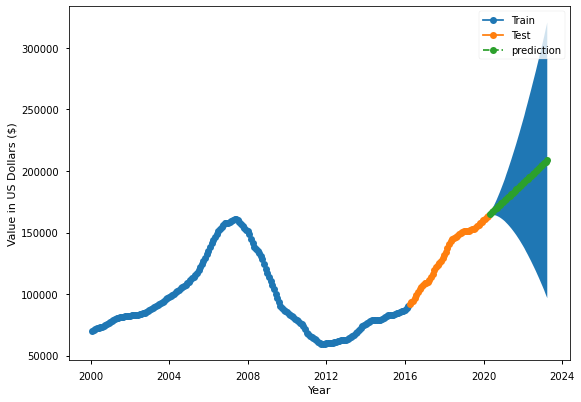

78208


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  78208   No. Observations:                  243
Model:               SARIMAX(1, 2, 0)   Log Likelihood               -1823.291
Date:                Sat, 14 May 2022   AIC                           3650.581
Time:                        13:26:00   BIC                           3657.551
Sample:                    01-31-2000   HQIC                          3653.389
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0711      0.029      2.474      0.013       0.015       0.127
sigma2      2.133e+05   1.54e+04     13.895      0.000    1.83e+05    2.43e+05
===================================================================================
Ljung-Box (L1) (Q):                   4.08   Jarque-Bera (JB):                18.48
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):               2.76   Skew:                            -0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

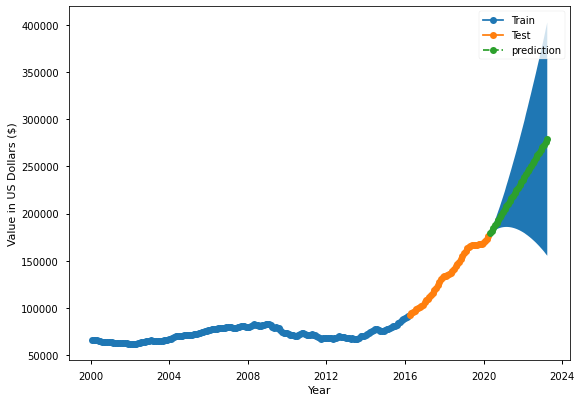

75180


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  75180   No. Observations:                  243
Model:               SARIMAX(3, 2, 0)   Log Likelihood               -1724.100
Date:                Sat, 14 May 2022   AIC                           3456.199
Time:                        13:26:01   BIC                           3470.139
Sample:                    01-31-2000   HQIC                          3461.815
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0126      0.038     -0.329      0.742      -0.088       0.062
ar.L2          0.0178      0.045      0.395      0.693      -0.071       0.106
ar.L3         -0.2896      0.014    -20.608      0.000      -0.317      -0.262
sigma2      7.773e+04   6175.708     12.587      0.000    6.56e+04    8.98e+04
===================================================================================
Ljung-Box (L1) (Q):                   2.11   Jarque-Bera (JB):                32.90
Prob(Q):                              0.15   Prob(JB):                         0.00
Heteroskedasticity (H):               1.52   Skew:                            -0.33
Prob(H) (two-sided):                  0.06   Kurtosis:                         4.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

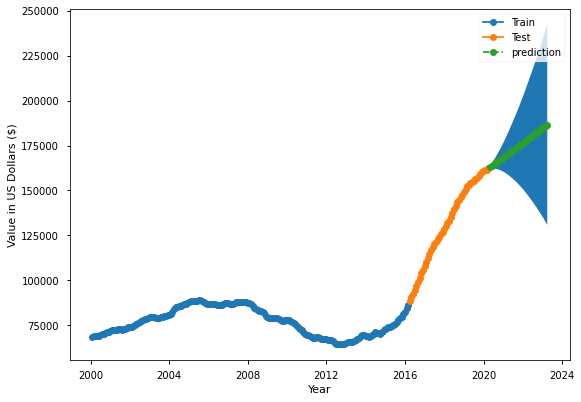

32808


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  32808   No. Observations:                  243
Model:               SARIMAX(3, 2, 0)   Log Likelihood               -1755.343
Date:                Sat, 14 May 2022   AIC                           3518.686
Time:                        13:26:03   BIC                           3532.625
Sample:                    01-31-2000   HQIC                          3524.302
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0056      0.044     -0.127      0.899      -0.092       0.081
ar.L2          0.1273      0.020      6.486      0.000       0.089       0.166
ar.L3         -0.1381      0.022     -6.400      0.000      -0.180      -0.096
sigma2      1.091e+05   7282.732     14.982      0.000    9.48e+04    1.23e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.61   Jarque-Bera (JB):                31.00
Prob(Q):                              0.20   Prob(JB):                         0.00
Heteroskedasticity (H):               2.80   Skew:                            -0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

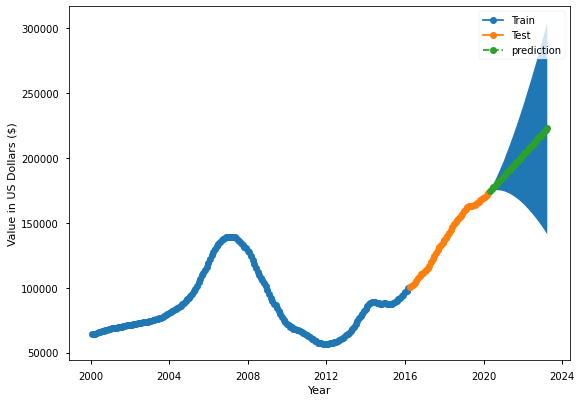

34668


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  34668   No. Observations:                  243
Model:               SARIMAX(0, 2, 1)   Log Likelihood               -1743.205
Date:                Sat, 14 May 2022   AIC                           3490.410
Time:                        13:26:04   BIC                           3497.380
Sample:                    01-31-2000   HQIC                          3493.218
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0720      0.040      1.782      0.075      -0.007       0.151
sigma2      1.114e+05   7590.472     14.674      0.000    9.65e+04    1.26e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.05   Jarque-Bera (JB):                46.55
Prob(Q):                              0.31   Prob(JB):                         0.00
Heteroskedasticity (H):               1.74   Skew:                            -0.57
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

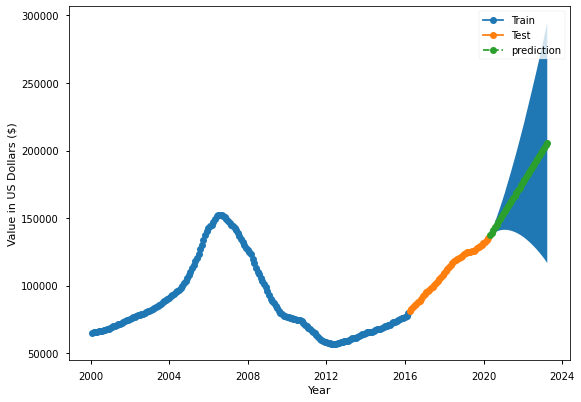

33713


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  33713   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1825.364
Date:                Sat, 14 May 2022   AIC                           3652.727
Time:                        13:26:04   BIC                           3656.212
Sample:                    01-31-2000   HQIC                          3654.131
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.211e+05   1.33e+04     16.585      0.000    1.95e+05    2.47e+05
===================================================================================
Ljung-Box (L1) (Q):                   6.10   Jarque-Bera (JB):                64.62
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               2.70   Skew:                            -0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

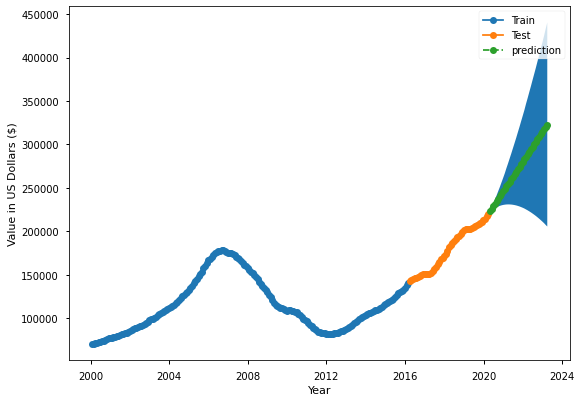

75051


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  75051   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1775.038
Date:                Sat, 14 May 2022   AIC                           3552.076
Time:                        13:26:05   BIC                           3555.561
Sample:                    01-31-2000   HQIC                          3553.480
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.458e+05   1.11e+04     13.145      0.000    1.24e+05    1.67e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.18   Jarque-Bera (JB):                 7.34
Prob(Q):                              0.28   Prob(JB):                         0.03
Heteroskedasticity (H):               2.96   Skew:                            -0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

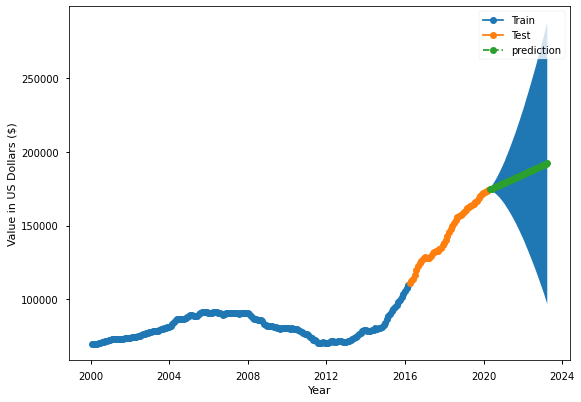

30288


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  30288   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1792.618
Date:                Sat, 14 May 2022   AIC                           3587.237
Time:                        13:26:06   BIC                           3590.722
Sample:                    01-31-2000   HQIC                          3588.641
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.686e+05   1.26e+04     13.387      0.000    1.44e+05    1.93e+05
===================================================================================
Ljung-Box (L1) (Q):                   4.26   Jarque-Bera (JB):                 9.20
Prob(Q):                              0.04   Prob(JB):                         0.01
Heteroskedasticity (H):               6.43   Skew:                            -0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

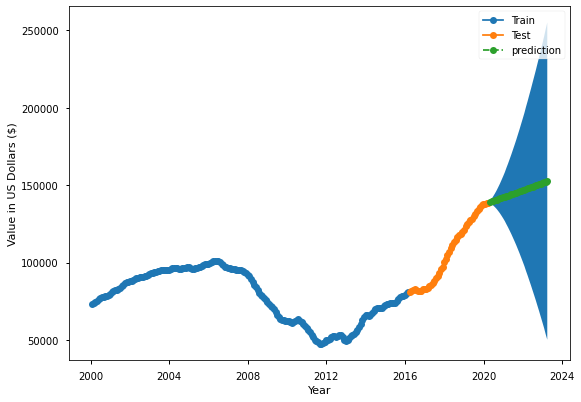

78202


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  78202   No. Observations:                  243
Model:               SARIMAX(1, 2, 1)   Log Likelihood               -1832.010
Date:                Sat, 14 May 2022   AIC                           3670.020
Time:                        13:26:12   BIC                           3680.474
Sample:                    01-31-2000   HQIC                          3674.231
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7435      0.175      4.247      0.000       0.400       1.087
ma.L1         -0.8266      0.155     -5.332      0.000      -1.130      -0.523
sigma2      2.274e+05   2.17e+04     10.474      0.000    1.85e+05     2.7e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.11   Jarque-Bera (JB):                 0.24
Prob(Q):                              0.29   Prob(JB):                         0.89
Heteroskedasticity (H):               1.76   Skew:                            -0.01
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

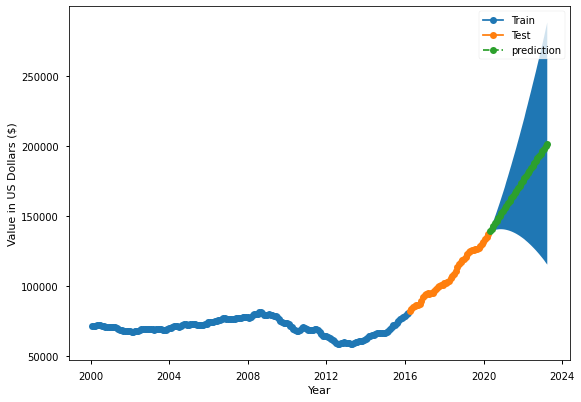

75233


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  75233   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1824.720
Date:                Sat, 14 May 2022   AIC                           3651.439
Time:                        13:26:13   BIC                           3654.924
Sample:                    01-31-2000   HQIC                          3652.843
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.199e+05    1.4e+04     15.757      0.000    1.93e+05    2.47e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                44.31
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               4.73   Skew:                             0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

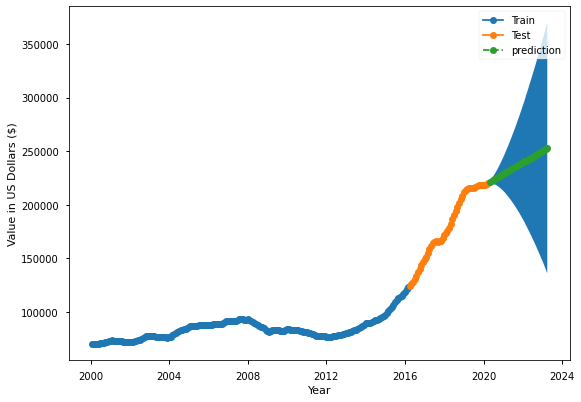

76119


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  76119   No. Observations:                  243
Model:               SARIMAX(3, 2, 0)   Log Likelihood               -1752.759
Date:                Sat, 14 May 2022   AIC                           3513.518
Time:                        13:26:17   BIC                           3527.457
Sample:                    01-31-2000   HQIC                          3519.134
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0736      0.034     -2.182      0.029      -0.140      -0.008
ar.L2          0.0603      0.029      2.045      0.041       0.003       0.118
ar.L3         -0.2077      0.012    -16.684      0.000      -0.232      -0.183
sigma2      9.794e+04   7994.048     12.252      0.000    8.23e+04    1.14e+05
===================================================================================
Ljung-Box (L1) (Q):                   3.71   Jarque-Bera (JB):                15.56
Prob(Q):                              0.05   Prob(JB):                         0.00
Heteroskedasticity (H):               0.93   Skew:                            -0.49
Prob(H) (two-sided):                  0.76   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

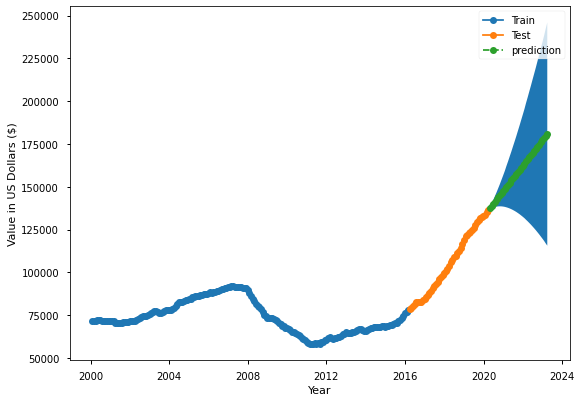

30274


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  30274   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1756.672
Date:                Sat, 14 May 2022   AIC                           3515.344
Time:                        13:26:18   BIC                           3518.828
Sample:                    01-31-2000   HQIC                          3516.748
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.252e+05   8831.396     14.177      0.000    1.08e+05    1.43e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.41   Jarque-Bera (JB):                17.56
Prob(Q):                              0.52   Prob(JB):                         0.00
Heteroskedasticity (H):              12.73   Skew:                            -0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

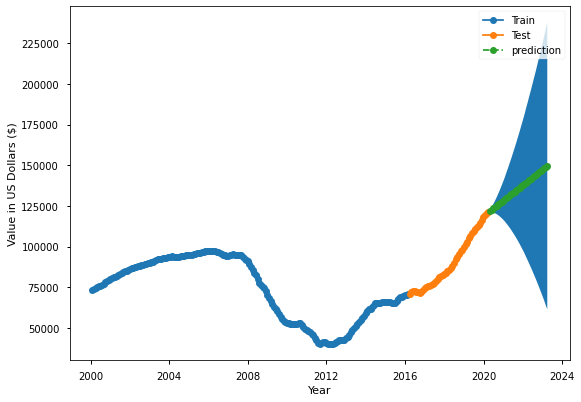

60419


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  60419   No. Observations:                  243
Model:               SARIMAX(3, 2, 0)   Log Likelihood               -1829.682
Date:                Sat, 14 May 2022   AIC                           3667.364
Time:                        13:26:21   BIC                           3681.303
Sample:                    01-31-2000   HQIC                          3672.980
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0370      0.023     -1.594      0.111      -0.083       0.008
ar.L2          0.0525      0.018      2.915      0.004       0.017       0.088
ar.L3         -0.2233      0.010    -21.643      0.000      -0.244      -0.203
sigma2      1.732e+05   1.05e+04     16.486      0.000    1.53e+05    1.94e+05
===================================================================================
Ljung-Box (L1) (Q):                   4.68   Jarque-Bera (JB):                84.34
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               2.22   Skew:                            -0.52
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

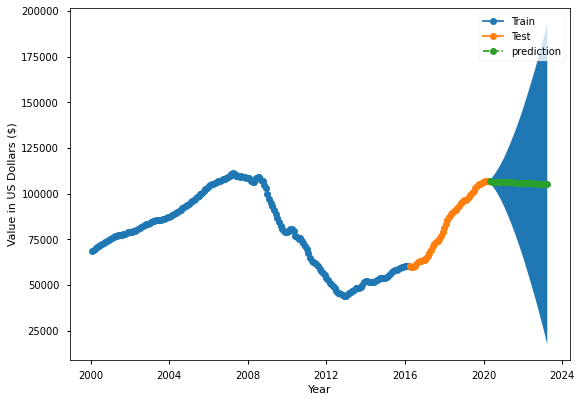

44113


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  44113   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1961.925
Date:                Sat, 14 May 2022   AIC                           3925.850
Time:                        13:26:22   BIC                           3929.335
Sample:                    01-31-2000   HQIC                          3927.254
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      6.838e+05   6.76e+04     10.114      0.000    5.51e+05    8.16e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.67   Jarque-Bera (JB):                 1.13
Prob(Q):                              0.41   Prob(JB):                         0.57
Heteroskedasticity (H):               1.77   Skew:                            -0.03
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

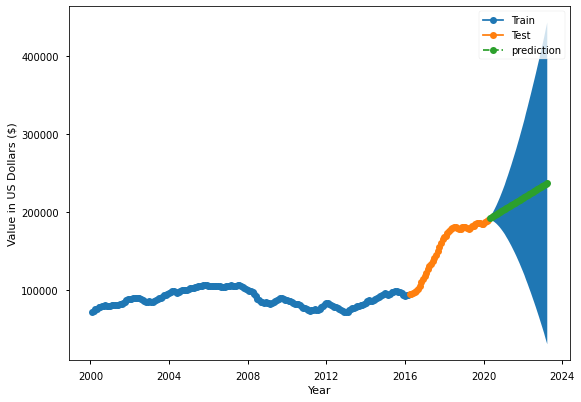

77011


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  77011   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1860.903
Date:                Sat, 14 May 2022   AIC                           3723.807
Time:                        13:26:23   BIC                           3727.291
Sample:                    01-31-2000   HQIC                          3725.211
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.968e+05   2.09e+04     14.228      0.000    2.56e+05    3.38e+05
===================================================================================
Ljung-Box (L1) (Q):                   3.49   Jarque-Bera (JB):                17.90
Prob(Q):                              0.06   Prob(JB):                         0.00
Heteroskedasticity (H):               2.18   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

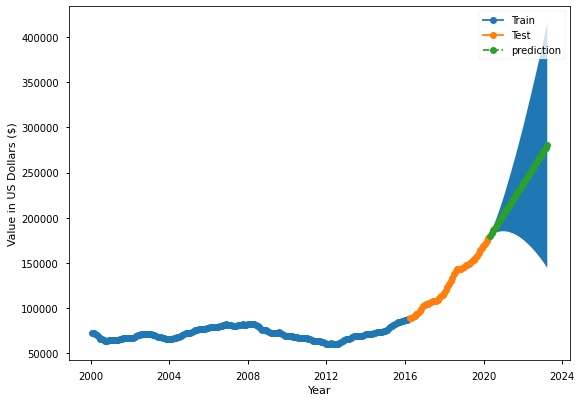

75041


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  75041   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1810.697
Date:                Sat, 14 May 2022   AIC                           3623.393
Time:                        13:26:24   BIC                           3626.878
Sample:                    01-31-2000   HQIC                          3624.797
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.958e+05   1.01e+04     19.327      0.000    1.76e+05    2.16e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.94   Jarque-Bera (JB):               177.99
Prob(Q):                              0.33   Prob(JB):                         0.00
Heteroskedasticity (H):               6.67   Skew:                            -0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

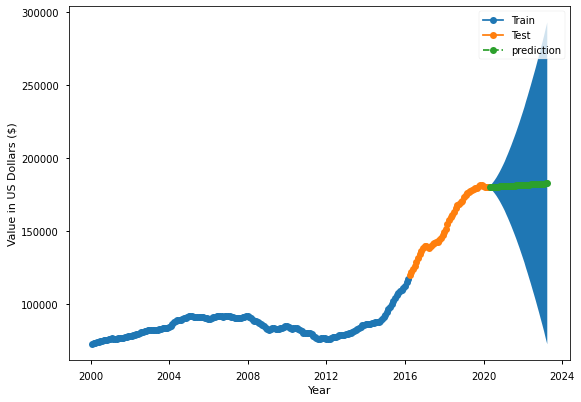

33712


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  33712   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1809.450
Date:                Sat, 14 May 2022   AIC                           3620.900
Time:                        13:26:24   BIC                           3624.385
Sample:                    01-31-2000   HQIC                          3622.304
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.938e+05   1.71e+04     11.331      0.000     1.6e+05    2.27e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):                 0.80
Prob(Q):                              0.66   Prob(JB):                         0.67
Heteroskedasticity (H):               1.58   Skew:                            -0.13
Prob(H) (two-sided):                  0.04   Kurtosis:                         3.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

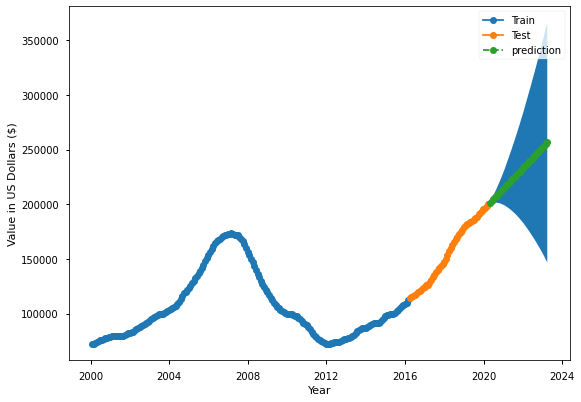

32922


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  32922   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1829.827
Date:                Sat, 14 May 2022   AIC                           3661.654
Time:                        13:26:25   BIC                           3665.138
Sample:                    01-31-2000   HQIC                          3663.058
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.294e+05    1.6e+04     14.376      0.000    1.98e+05    2.61e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                27.74
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               1.71   Skew:                            -0.44
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

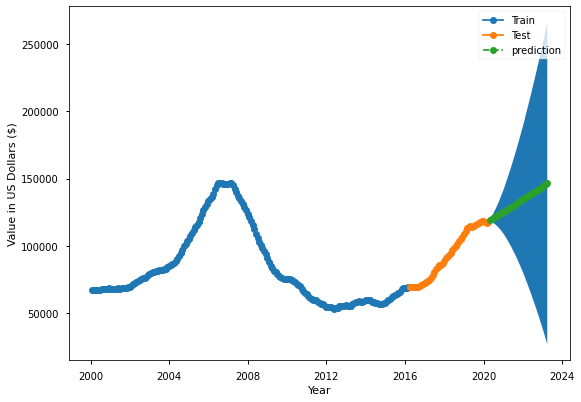

75246


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  75246   No. Observations:                  243
Model:               SARIMAX(2, 2, 2)   Log Likelihood               -1865.054
Date:                Sat, 14 May 2022   AIC                           3740.108
Time:                        13:26:28   BIC                           3757.532
Sample:                    01-31-2000   HQIC                          3747.128
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2516      0.096     13.052      0.000       1.064       1.440
ar.L2         -0.7621      0.084     -9.049      0.000      -0.927      -0.597
ma.L1         -1.2526      0.114    -10.998      0.000      -1.476      -1.029
ma.L2          0.6700      0.104      6.454      0.000       0.467       0.874
sigma2      2.833e+05   2.15e+04     13.188      0.000    2.41e+05    3.25e+05
===================================================================================
Ljung-Box (L1) (Q):                   6.31   Jarque-Bera (JB):                10.67
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               2.85   Skew:                            -0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

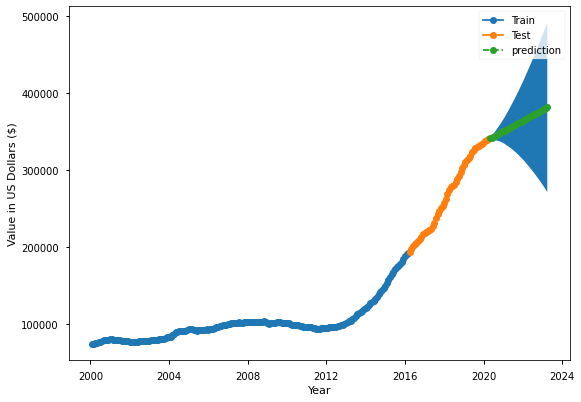

33705


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  33705   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1857.211
Date:                Sat, 14 May 2022   AIC                           3716.421
Time:                        13:26:29   BIC                           3719.906
Sample:                    01-31-2000   HQIC                          3717.825
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.878e+05   2.18e+04     13.193      0.000    2.45e+05    3.31e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 9.70
Prob(Q):                              0.83   Prob(JB):                         0.01
Heteroskedasticity (H):               1.47   Skew:                            -0.23
Prob(H) (two-sided):                  0.08   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

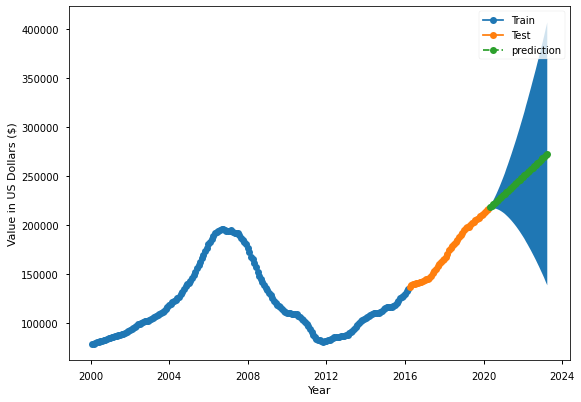

33147


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  33147   No. Observations:                  243
Model:               SARIMAX(2, 2, 2)   Log Likelihood               -1871.804
Date:                Sat, 14 May 2022   AIC                           3753.608
Time:                        13:26:33   BIC                           3771.032
Sample:                    01-31-2000   HQIC                          3760.628
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.8653      0.073    -25.668      0.000      -2.008      -1.723
ar.L2         -0.9230      0.071    -12.956      0.000      -1.063      -0.783
ma.L1          1.8315      0.085     21.650      0.000       1.666       1.997
ma.L2          0.8900      0.084     10.549      0.000       0.725       1.055
sigma2      3.338e+05   2.15e+04     15.495      0.000    2.92e+05    3.76e+05
===================================================================================
Ljung-Box (L1) (Q):                   3.50   Jarque-Bera (JB):               115.96
Prob(Q):                              0.06   Prob(JB):                         0.00
Heteroskedasticity (H):               2.95   Skew:                            -0.68
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

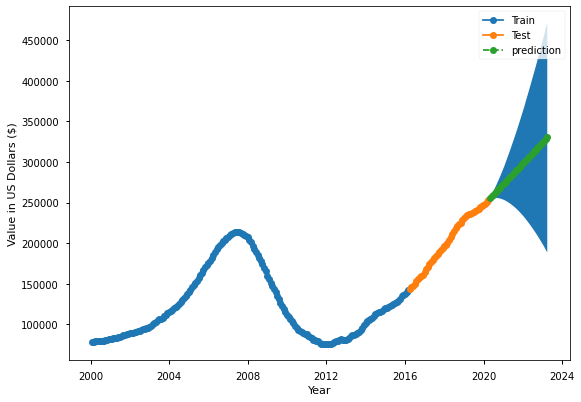

75241


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  75241   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1791.818
Date:                Sat, 14 May 2022   AIC                           3585.636
Time:                        13:26:33   BIC                           3589.121
Sample:                    01-31-2000   HQIC                          3587.040
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.675e+05   1.45e+04     11.572      0.000    1.39e+05    1.96e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.23   Jarque-Bera (JB):                 1.37
Prob(Q):                              0.27   Prob(JB):                         0.50
Heteroskedasticity (H):               0.92   Skew:                             0.15
Prob(H) (two-sided):                  0.71   Kurtosis:                         3.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

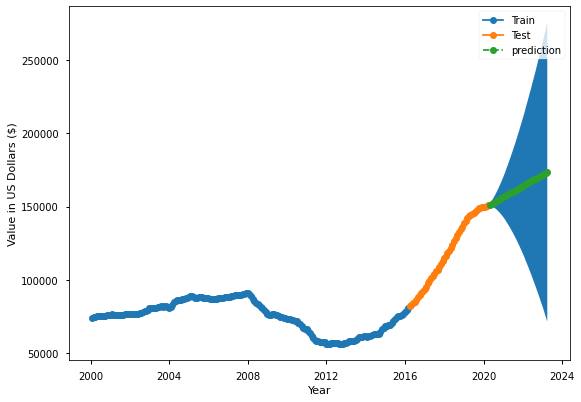

98421


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  98421   No. Observations:                  243
Model:               SARIMAX(1, 2, 1)   Log Likelihood               -2025.124
Date:                Sat, 14 May 2022   AIC                           4056.247
Time:                        13:26:35   BIC                           4066.702
Sample:                    01-31-2000   HQIC                          4060.459
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7946      0.106      7.482      0.000       0.586       1.003
ma.L1         -0.8966      0.091     -9.908      0.000      -1.074      -0.719
sigma2      1.155e+06   1.01e+05     11.431      0.000    9.57e+05    1.35e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 4.12
Prob(Q):                              0.87   Prob(JB):                         0.13
Heteroskedasticity (H):               2.68   Skew:                             0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

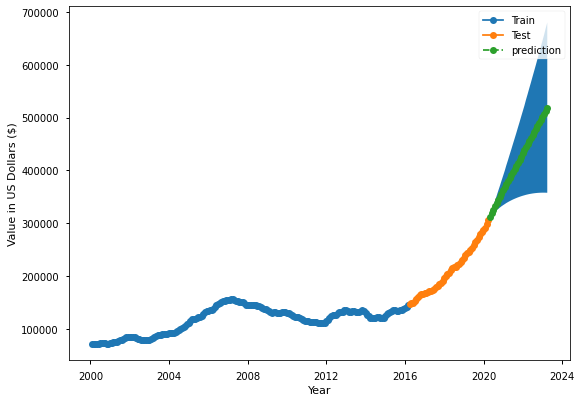

43205


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  43205   No. Observations:                  243
Model:               SARIMAX(2, 2, 2)   Log Likelihood               -1812.477
Date:                Sat, 14 May 2022   AIC                           3634.955
Time:                        13:26:39   BIC                           3652.379
Sample:                    01-31-2000   HQIC                          3641.974
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3378      0.054     24.654      0.000       1.231       1.444
ar.L2         -0.8964      0.064    -14.081      0.000      -1.021      -0.772
ma.L1         -1.3134      0.066    -20.021      0.000      -1.442      -1.185
ma.L2          0.8250      0.079     10.465      0.000       0.671       0.980
sigma2      1.886e+05   1.46e+04     12.910      0.000     1.6e+05    2.17e+05
===================================================================================
Ljung-Box (L1) (Q):                   8.92   Jarque-Bera (JB):                20.84
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.54   Skew:                            -0.49
Prob(H) (two-sided):                  0.06   Kurtosis:                         4.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

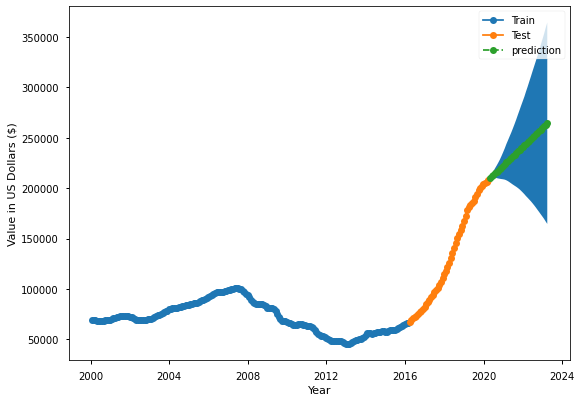

75228


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  75228   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1824.395
Date:                Sat, 14 May 2022   AIC                           3650.789
Time:                        13:26:40   BIC                           3654.274
Sample:                    01-31-2000   HQIC                          3652.193
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.193e+05   1.36e+04     16.120      0.000    1.93e+05    2.46e+05
===================================================================================
Ljung-Box (L1) (Q):                   3.09   Jarque-Bera (JB):                56.68
Prob(Q):                              0.08   Prob(JB):                         0.00
Heteroskedasticity (H):               4.69   Skew:                            -0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

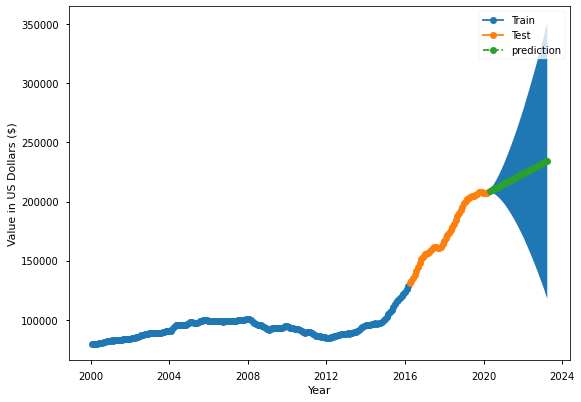

78203


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  78203   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1859.117
Date:                Sat, 14 May 2022   AIC                           3720.234
Time:                        13:26:41   BIC                           3723.719
Sample:                    01-31-2000   HQIC                          3721.638
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.924e+05   2.43e+04     12.040      0.000    2.45e+05     3.4e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.53   Jarque-Bera (JB):                 2.07
Prob(Q):                              0.22   Prob(JB):                         0.35
Heteroskedasticity (H):               1.22   Skew:                            -0.12
Prob(H) (two-sided):                  0.38   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

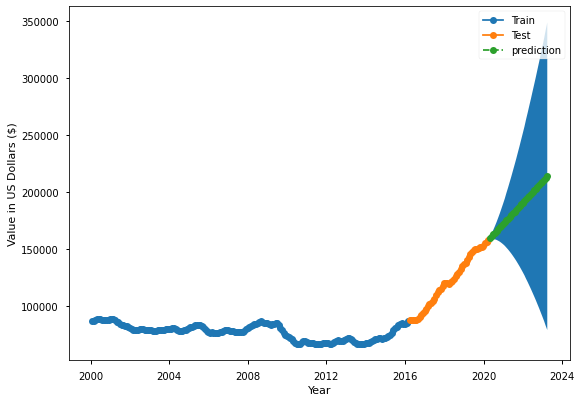

28052


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  28052   No. Observations:                  243
Model:               SARIMAX(2, 2, 2)   Log Likelihood               -1757.259
Date:                Sat, 14 May 2022   AIC                           3524.519
Time:                        13:26:45   BIC                           3541.943
Sample:                    01-31-2000   HQIC                          3531.539
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2757      0.047     26.978      0.000       1.183       1.368
ar.L2         -0.8851      0.052    -17.047      0.000      -0.987      -0.783
ma.L1         -1.2377      0.067    -18.546      0.000      -1.369      -1.107
ma.L2          0.7969      0.069     11.601      0.000       0.662       0.931
sigma2      1.161e+05   1.05e+04     11.097      0.000    9.56e+04    1.37e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.37   Jarque-Bera (JB):                 2.56
Prob(Q):                              0.24   Prob(JB):                         0.28
Heteroskedasticity (H):               1.45   Skew:                            -0.23
Prob(H) (two-sided):                  0.10   Kurtosis:                         3.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

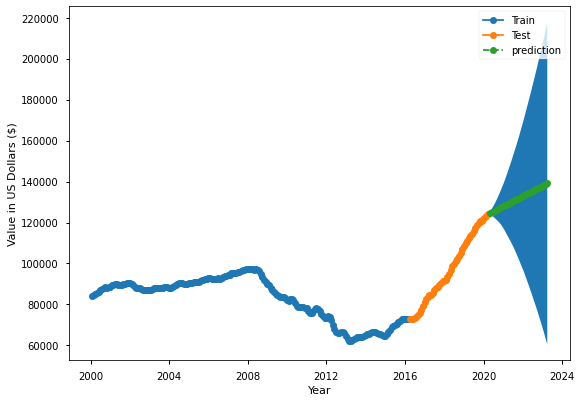

33607


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  33607   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1897.359
Date:                Sat, 14 May 2022   AIC                           3796.718
Time:                        13:26:45   BIC                           3800.203
Sample:                    01-31-2000   HQIC                          3798.122
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.014e+05    2.7e+04     14.873      0.000    3.49e+05    4.54e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                30.21
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                            -0.28
Prob(H) (two-sided):                  0.79   Kurtosis:                         4.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

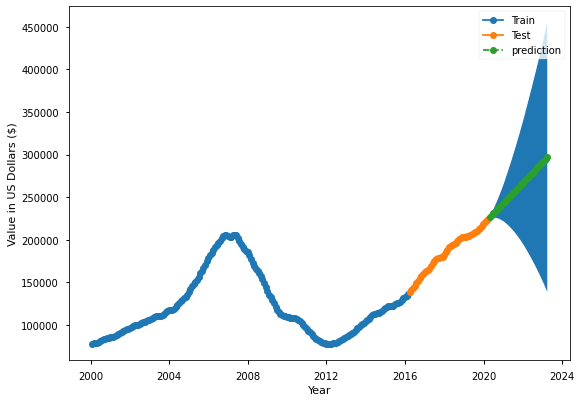

33054


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  33054   No. Observations:                  243
Model:               SARIMAX(2, 2, 2)   Log Likelihood               -1892.145
Date:                Sat, 14 May 2022   AIC                           3794.291
Time:                        13:26:49   BIC                           3811.714
Sample:                    01-31-2000   HQIC                          3801.310
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.8685      0.063    -29.478      0.000      -1.993      -1.744
ar.L2         -0.9029      0.065    -13.995      0.000      -1.029      -0.776
ma.L1          1.8259      0.074     24.523      0.000       1.680       1.972
ma.L2          0.8610      0.078     11.102      0.000       0.709       1.013
sigma2      3.609e+05    2.3e+04     15.662      0.000    3.16e+05    4.06e+05
===================================================================================
Ljung-Box (L1) (Q):                   4.00   Jarque-Bera (JB):               115.09
Prob(Q):                              0.05   Prob(JB):                         0.00
Heteroskedasticity (H):               2.26   Skew:                            -0.78
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

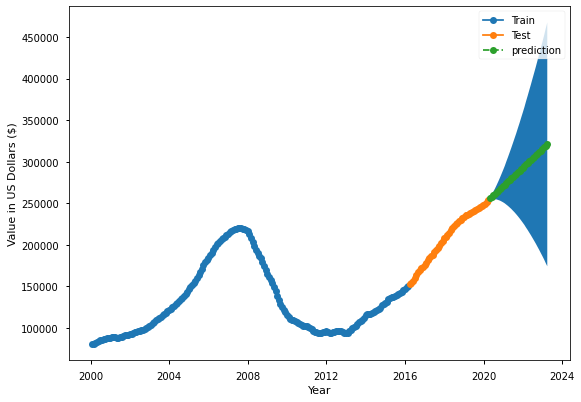

33142


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  33142   No. Observations:                  243
Model:               SARIMAX(2, 2, 2)   Log Likelihood               -1897.210
Date:                Sat, 14 May 2022   AIC                           3804.420
Time:                        13:26:54   BIC                           3821.844
Sample:                    01-31-2000   HQIC                          3811.440
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7879      0.058    -31.081      0.000      -1.901      -1.675
ar.L2         -0.8643      0.056    -15.312      0.000      -0.975      -0.754
ma.L1          1.7282      0.066     26.017      0.000       1.598       1.858
ma.L2          0.8024      0.066     12.237      0.000       0.674       0.931
sigma2      3.619e+05   2.51e+04     14.435      0.000    3.13e+05    4.11e+05
===================================================================================
Ljung-Box (L1) (Q):                  12.43   Jarque-Bera (JB):                26.20
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.79   Skew:                            -0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

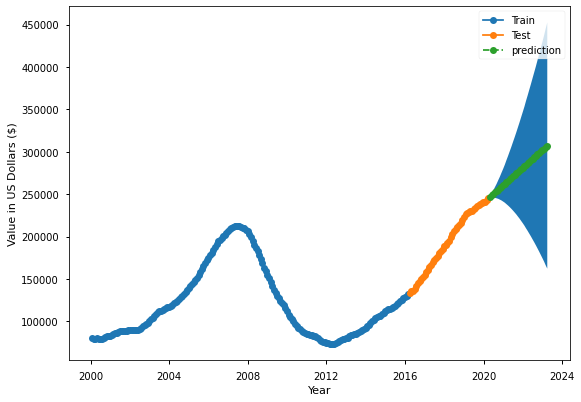

33603


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  33603   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1887.706
Date:                Sat, 14 May 2022   AIC                           3777.412
Time:                        13:26:55   BIC                           3780.897
Sample:                    01-31-2000   HQIC                          3778.816
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.706e+05   2.39e+04     15.497      0.000    3.24e+05    4.17e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.52   Jarque-Bera (JB):                47.98
Prob(Q):                              0.47   Prob(JB):                         0.00
Heteroskedasticity (H):               1.18   Skew:                            -0.47
Prob(H) (two-sided):                  0.45   Kurtosis:                         4.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

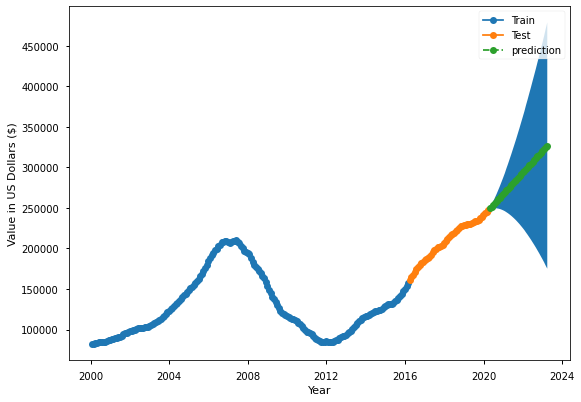

30344


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  30344   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1863.180
Date:                Sat, 14 May 2022   AIC                           3728.360
Time:                        13:26:56   BIC                           3731.845
Sample:                    01-31-2000   HQIC                          3729.764
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.024e+05   1.72e+04     17.563      0.000    2.69e+05    3.36e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.59   Jarque-Bera (JB):                99.55
Prob(Q):                              0.21   Prob(JB):                         0.00
Heteroskedasticity (H):               9.68   Skew:                             0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

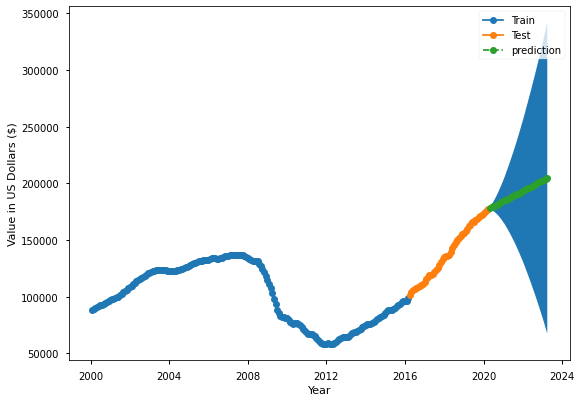

49507


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  49507   No. Observations:                  243
Model:               SARIMAX(0, 2, 3)   Log Likelihood               -1797.121
Date:                Sat, 14 May 2022   AIC                           3602.243
Time:                        13:26:59   BIC                           3616.182
Sample:                    01-31-2000   HQIC                          3607.859
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0421      0.019      2.172      0.030       0.004       0.080
ma.L2         -0.0429      0.036     -1.200      0.230      -0.113       0.027
ma.L3         -0.1492      0.012    -12.742      0.000      -0.172      -0.126
sigma2      1.476e+05   9377.401     15.740      0.000    1.29e+05    1.66e+05
===================================================================================
Ljung-Box (L1) (Q):                   7.32   Jarque-Bera (JB):                55.12
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               1.51   Skew:                            -0.26
Prob(H) (two-sided):                  0.07   Kurtosis:                         5.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

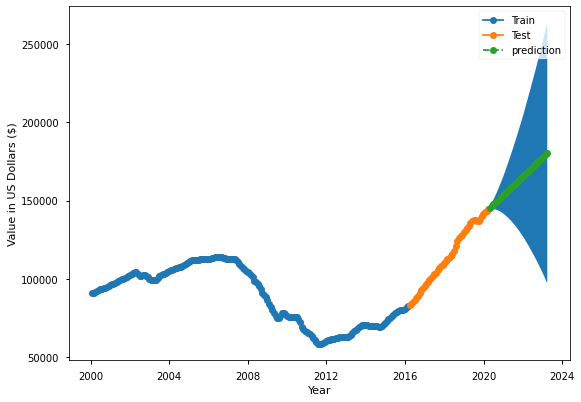

30296


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  30296   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1794.798
Date:                Sat, 14 May 2022   AIC                           3591.595
Time:                        13:26:59   BIC                           3595.080
Sample:                    01-31-2000   HQIC                          3592.999
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.717e+05   1.14e+04     15.113      0.000    1.49e+05    1.94e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.97   Jarque-Bera (JB):                31.28
Prob(Q):                              0.16   Prob(JB):                         0.00
Heteroskedasticity (H):              11.37   Skew:                             0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

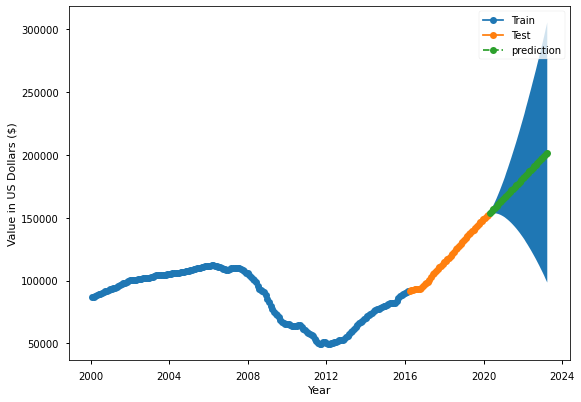

43227


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  43227   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1731.513
Date:                Sat, 14 May 2022   AIC                           3465.026
Time:                        13:27:00   BIC                           3468.511
Sample:                    01-31-2000   HQIC                          3466.430
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.017e+05   5283.930     19.242      0.000    9.13e+04    1.12e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):               171.26
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):               4.06   Skew:                            -0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

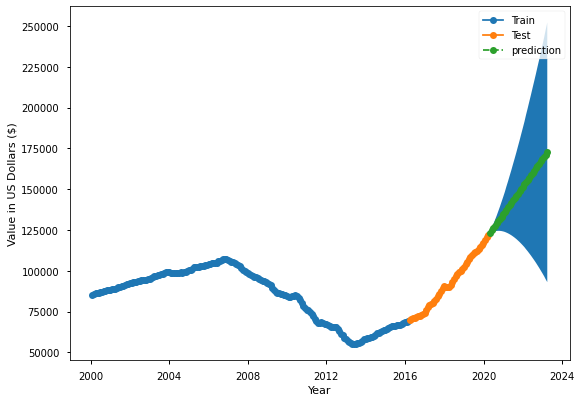

99207


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  99207   No. Observations:                  243
Model:               SARIMAX(3, 2, 0)   Log Likelihood               -1774.375
Date:                Sat, 14 May 2022   AIC                           3556.750
Time:                        13:27:02   BIC                           3570.689
Sample:                    01-31-2000   HQIC                          3562.365
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0130      0.050     -0.260      0.795      -0.111       0.085
ar.L2          0.0223      0.032      0.698      0.485      -0.040       0.085
ar.L3         -0.1596      0.012    -13.563      0.000      -0.183      -0.137
sigma2      1.306e+05   9230.919     14.145      0.000    1.12e+05    1.49e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.23   Jarque-Bera (JB):                44.02
Prob(Q):                              0.27   Prob(JB):                         0.00
Heteroskedasticity (H):               2.36   Skew:                            -0.42
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

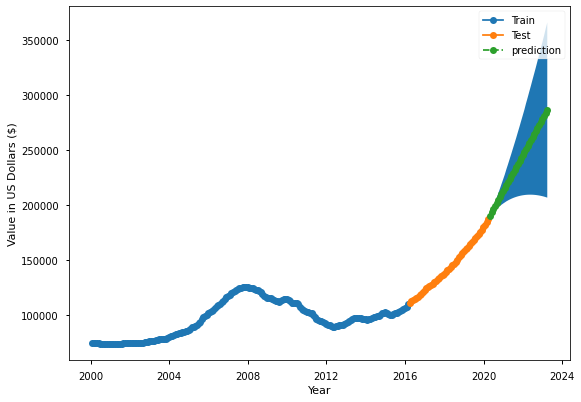

75253


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  75253   No. Observations:                  243
Model:               SARIMAX(0, 2, 3)   Log Likelihood               -1781.869
Date:                Sat, 14 May 2022   AIC                           3571.738
Time:                        13:27:06   BIC                           3585.677
Sample:                    01-31-2000   HQIC                          3577.354
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0343      0.019     -1.832      0.067      -0.071       0.002
ma.L2          0.0295      0.030      0.989      0.323      -0.029       0.088
ma.L3         -0.1229      0.012    -10.678      0.000      -0.145      -0.100
sigma2      1.391e+05   1.13e+04     12.333      0.000    1.17e+05    1.61e+05
===================================================================================
Ljung-Box (L1) (Q):                  13.18   Jarque-Bera (JB):                 9.15
Prob(Q):                              0.00   Prob(JB):                         0.01
Heteroskedasticity (H):               1.04   Skew:                            -0.25
Prob(H) (two-sided):                  0.85   Kurtosis:                         3.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

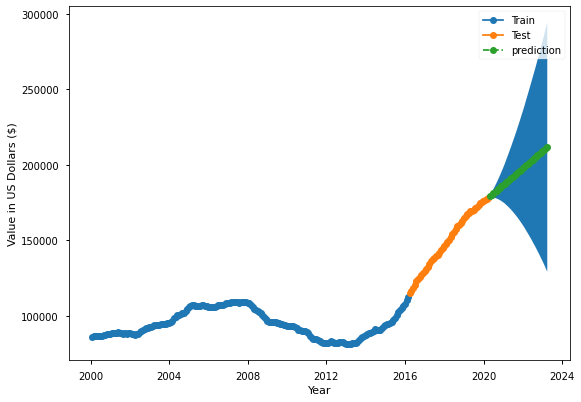

33167


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  33167   No. Observations:                  243
Model:               SARIMAX(2, 2, 2)   Log Likelihood               -1922.550
Date:                Sat, 14 May 2022   AIC                           3855.101
Time:                        13:27:10   BIC                           3872.525
Sample:                    01-31-2000   HQIC                          3862.120
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.8173      0.099    -18.368      0.000      -2.011      -1.623
ar.L2         -0.9020      0.099     -9.105      0.000      -1.096      -0.708
ma.L1          1.7882      0.106     16.793      0.000       1.579       1.997
ma.L2          0.8773      0.108      8.132      0.000       0.666       1.089
sigma2      4.703e+05   3.33e+04     14.139      0.000    4.05e+05    5.36e+05
===================================================================================
Ljung-Box (L1) (Q):                   5.46   Jarque-Bera (JB):                50.19
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               4.36   Skew:                            -0.59
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

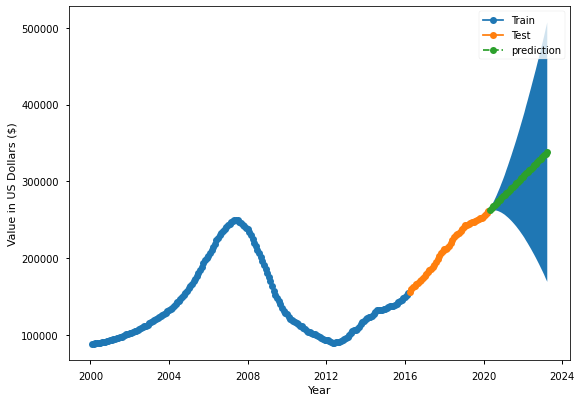

28208


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  28208   No. Observations:                  243
Model:               SARIMAX(3, 2, 0)   Log Likelihood               -1762.242
Date:                Sat, 14 May 2022   AIC                           3532.484
Time:                        13:27:12   BIC                           3546.423
Sample:                    01-31-2000   HQIC                          3538.099
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0293      0.056     -0.526      0.599      -0.139       0.080
ar.L2         -0.0705      0.027     -2.577      0.010      -0.124      -0.017
ar.L3         -0.1571      0.011    -14.026      0.000      -0.179      -0.135
sigma2      1.164e+05   1.05e+04     11.113      0.000    9.59e+04    1.37e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.50   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.48   Prob(JB):                         0.27
Heteroskedasticity (H):               1.70   Skew:                             0.02
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

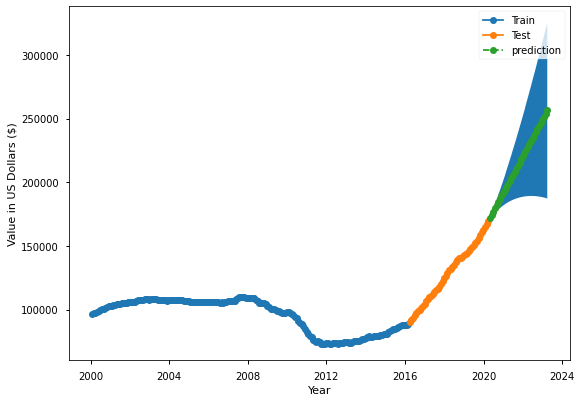

33127


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  33127   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -2004.850
Date:                Sat, 14 May 2022   AIC                           4011.700
Time:                        13:27:13   BIC                           4015.185
Sample:                    01-31-2000   HQIC                          4013.104
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      9.764e+05   6.63e+04     14.737      0.000    8.47e+05    1.11e+06
===================================================================================
Ljung-Box (L1) (Q):                   5.76   Jarque-Bera (JB):                26.65
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               3.11   Skew:                            -0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

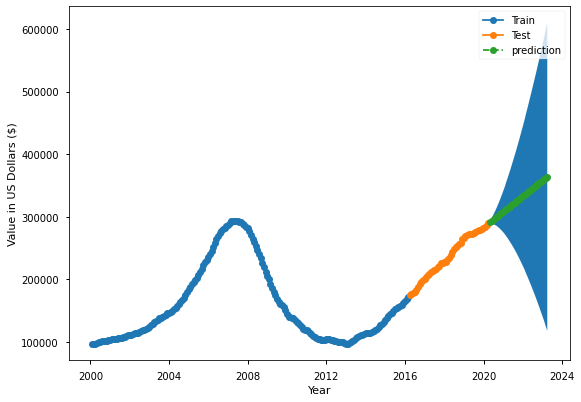

98418


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  98418   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1913.792
Date:                Sat, 14 May 2022   AIC                           3829.583
Time:                        13:27:13   BIC                           3833.068
Sample:                    01-31-2000   HQIC                          3830.987
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        4.6e+05   3.51e+04     13.086      0.000    3.91e+05    5.29e+05
===================================================================================
Ljung-Box (L1) (Q):                   6.50   Jarque-Bera (JB):                 6.62
Prob(Q):                              0.01   Prob(JB):                         0.04
Heteroskedasticity (H):               5.55   Skew:                             0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

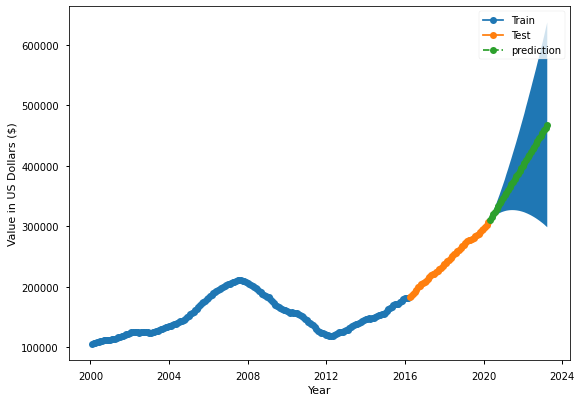

30032


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  30032   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1862.456
Date:                Sat, 14 May 2022   AIC                           3726.911
Time:                        13:27:14   BIC                           3730.396
Sample:                    01-31-2000   HQIC                          3728.315
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.006e+05   1.72e+04     17.494      0.000    2.67e+05    3.34e+05
===================================================================================
Ljung-Box (L1) (Q):                   2.50   Jarque-Bera (JB):                92.71
Prob(Q):                              0.11   Prob(JB):                         0.00
Heteroskedasticity (H):               3.15   Skew:                            -0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

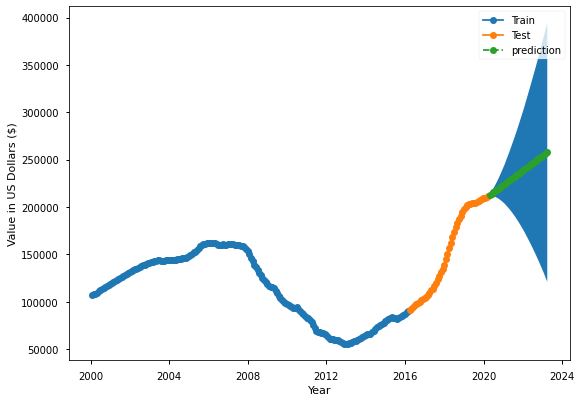

28206


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  28206   No. Observations:                  243
Model:               SARIMAX(3, 2, 1)   Log Likelihood               -1878.395
Date:                Sat, 14 May 2022   AIC                           3766.789
Time:                        13:27:18   BIC                           3784.213
Sample:                    01-31-2000   HQIC                          3773.809
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5502      0.132      4.171      0.000       0.292       0.809
ar.L2         -0.0309      0.047     -0.656      0.512      -0.123       0.061
ar.L3         -0.1004      0.028     -3.552      0.000      -0.156      -0.045
ma.L1         -0.5146      0.139     -3.701      0.000      -0.787      -0.242
sigma2      3.278e+05      3e+04     10.939      0.000    2.69e+05    3.87e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.83   Jarque-Bera (JB):                 1.76
Prob(Q):                              0.18   Prob(JB):                         0.42
Heteroskedasticity (H):               0.33   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

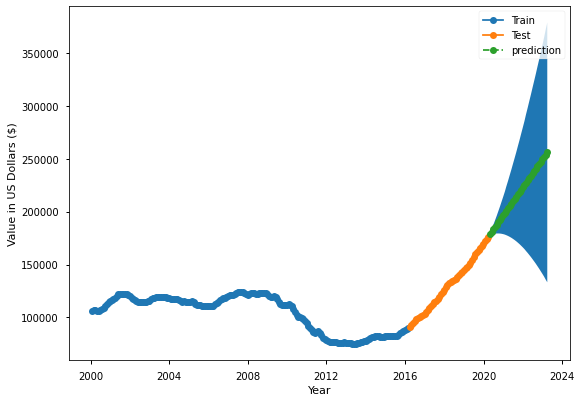

98337


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  98337   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1965.233
Date:                Sat, 14 May 2022   AIC                           3932.466
Time:                        13:27:19   BIC                           3935.950
Sample:                    01-31-2000   HQIC                          3933.870
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      7.028e+05   6.01e+04     11.693      0.000    5.85e+05    8.21e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.29   Jarque-Bera (JB):                 3.48
Prob(Q):                              0.59   Prob(JB):                         0.18
Heteroskedasticity (H):               4.32   Skew:                            -0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

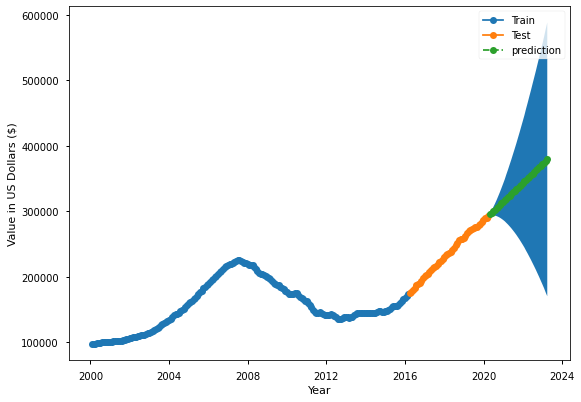

95814


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  95814   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -2127.753
Date:                Sat, 14 May 2022   AIC                           4257.505
Time:                        13:27:20   BIC                           4260.990
Sample:                    01-31-2000   HQIC                          4258.909
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.707e+06   2.05e+05     13.210      0.000    2.31e+06    3.11e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                 7.36
Prob(Q):                              0.70   Prob(JB):                         0.03
Heteroskedasticity (H):               4.61   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

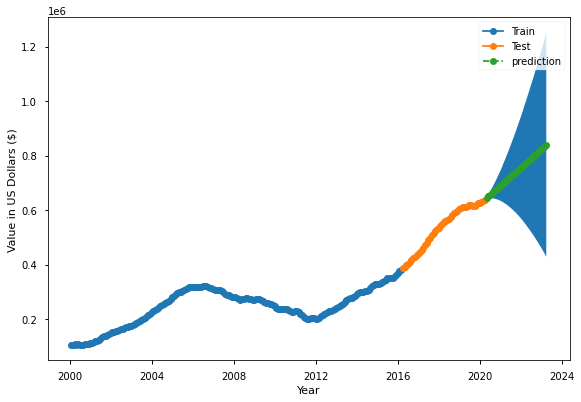

30035


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  30035   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1821.931
Date:                Sat, 14 May 2022   AIC                           3645.861
Time:                        13:27:20   BIC                           3649.346
Sample:                    01-31-2000   HQIC                          3647.265
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.149e+05   1.63e+04     13.183      0.000    1.83e+05    2.47e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.14   Jarque-Bera (JB):                 7.46
Prob(Q):                              0.29   Prob(JB):                         0.02
Heteroskedasticity (H):               6.72   Skew:                            -0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

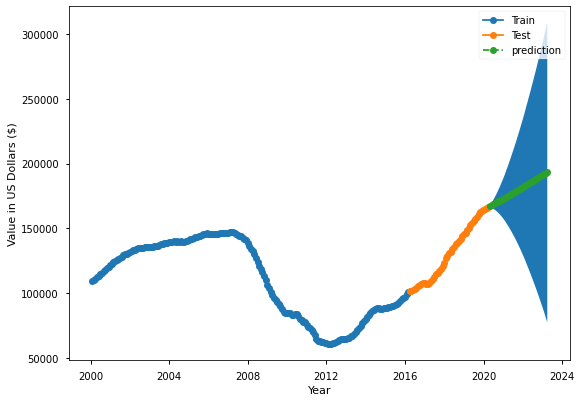

98439


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  98439   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1976.136
Date:                Sat, 14 May 2022   AIC                           3954.272
Time:                        13:27:21   BIC                           3957.757
Sample:                    01-31-2000   HQIC                          3955.676
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      7.693e+05   4.78e+04     16.093      0.000    6.76e+05    8.63e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.39   Jarque-Bera (JB):                50.02
Prob(Q):                              0.24   Prob(JB):                         0.00
Heteroskedasticity (H):               2.93   Skew:                            -0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

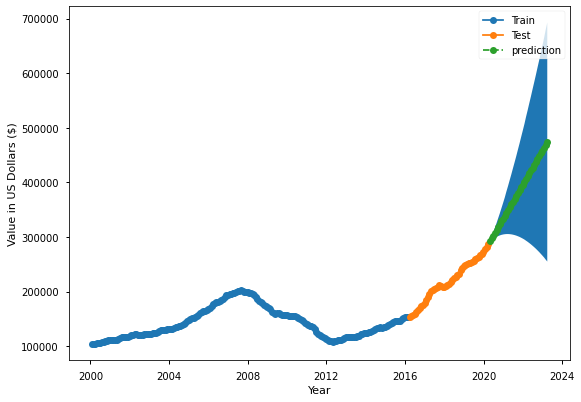

76104


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  76104   No. Observations:                  243
Model:               SARIMAX(1, 2, 1)   Log Likelihood               -1887.064
Date:                Sat, 14 May 2022   AIC                           3780.128
Time:                        13:27:23   BIC                           3790.582
Sample:                    01-31-2000   HQIC                          3784.340
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7912      0.143      5.543      0.000       0.511       1.071
ma.L1         -0.8475      0.116     -7.297      0.000      -1.075      -0.620
sigma2      3.647e+05   3.52e+04     10.348      0.000    2.96e+05    4.34e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.71
Prob(Q):                              0.96   Prob(JB):                         0.70
Heteroskedasticity (H):               0.71   Skew:                            -0.06
Prob(H) (two-sided):                  0.13   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

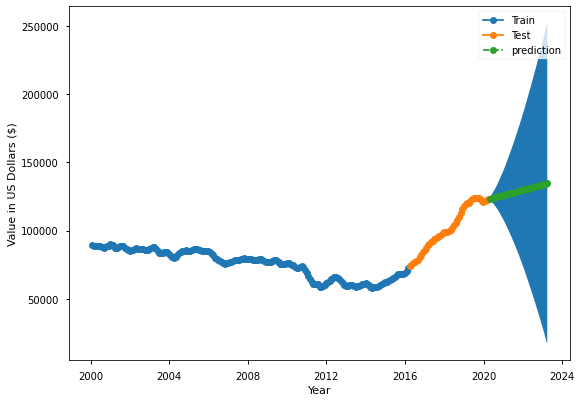

7108


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   7108   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -2035.768
Date:                Sat, 14 May 2022   AIC                           4073.536
Time:                        13:27:24   BIC                           4077.021
Sample:                    01-31-2000   HQIC                          4074.940
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.262e+06   9.27e+04     13.614      0.000    1.08e+06    1.44e+06
===================================================================================
Ljung-Box (L1) (Q):                   3.80   Jarque-Bera (JB):                10.58
Prob(Q):                              0.05   Prob(JB):                         0.01
Heteroskedasticity (H):               2.37   Skew:                            -0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

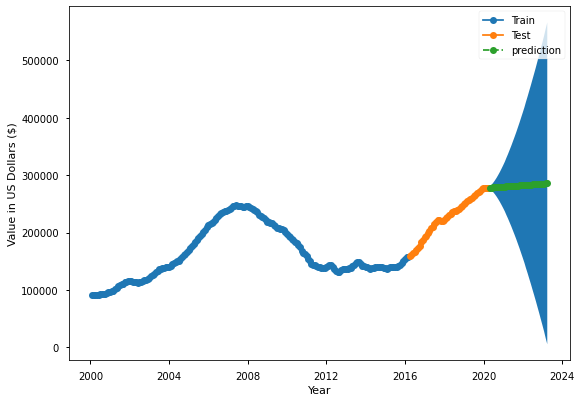

95816


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  95816   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -2058.048
Date:                Sat, 14 May 2022   AIC                           4118.096
Time:                        13:27:24   BIC                           4121.580
Sample:                    01-31-2000   HQIC                          4119.500
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.518e+06   1.16e+05     13.085      0.000    1.29e+06    1.75e+06
===================================================================================
Ljung-Box (L1) (Q):                   2.51   Jarque-Bera (JB):                 7.62
Prob(Q):                              0.11   Prob(JB):                         0.02
Heteroskedasticity (H):               3.21   Skew:                            -0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

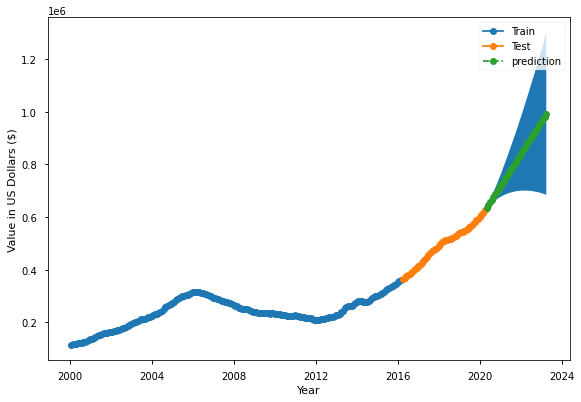

95818


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  95818   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -2051.124
Date:                Sat, 14 May 2022   AIC                           4104.248
Time:                        13:27:25   BIC                           4107.733
Sample:                    01-31-2000   HQIC                          4105.652
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.433e+06    9.5e+04     15.093      0.000    1.25e+06    1.62e+06
===================================================================================
Ljung-Box (L1) (Q):                   2.13   Jarque-Bera (JB):                30.54
Prob(Q):                              0.14   Prob(JB):                         0.00
Heteroskedasticity (H):               4.35   Skew:                             0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

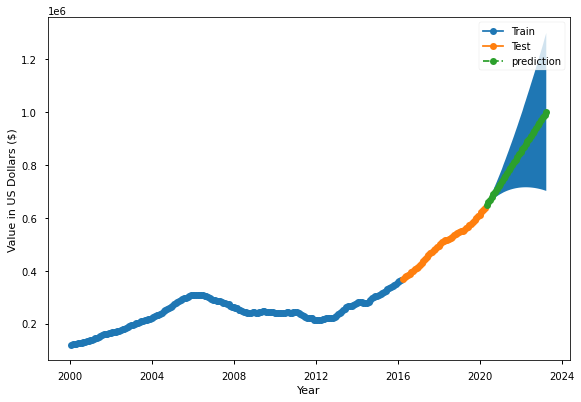

95387


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  95387   No. Observations:                  243
Model:               SARIMAX(2, 2, 3)   Log Likelihood               -2126.511
Date:                Sat, 14 May 2022   AIC                           4265.023
Time:                        13:27:33   BIC                           4285.931
Sample:                    01-31-2000   HQIC                          4273.446
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3046      0.219      1.393      0.164      -0.124       0.733
ar.L2          0.4167      0.212      1.961      0.050       0.000       0.833
ma.L1         -0.3201      0.218     -1.466      0.143      -0.748       0.108
ma.L2         -0.4748      0.216     -2.196      0.028      -0.899      -0.051
ma.L3         -0.0846      0.017     -5.020      0.000      -0.118      -0.052
sigma2       2.15e+06   1.59e+05     13.538      0.000    1.84e+06    2.46e+06
===================================================================================
Ljung-Box (L1) (Q):                   1.89   Jarque-Bera (JB):                 0.41
Prob(Q):                              0.17   Prob(JB):                         0.82
Heteroskedasticity (H):               1.10   Skew:                             0.02
Prob(H) (two-sided):                  0.68   Kurtosis:                         3.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

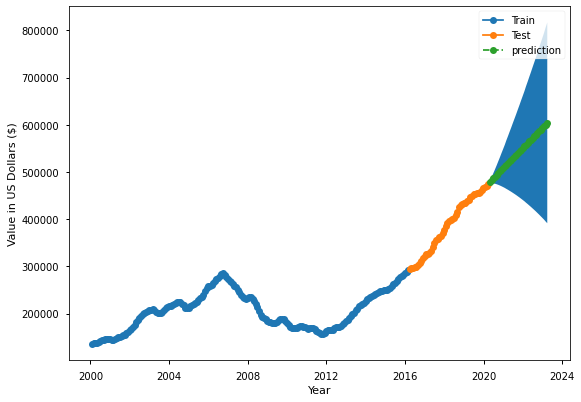

7111


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   7111   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1944.931
Date:                Sat, 14 May 2022   AIC                           3891.861
Time:                        13:27:33   BIC                           3895.346
Sample:                    01-31-2000   HQIC                          3893.265
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      5.954e+05   4.86e+04     12.254      0.000       5e+05    6.91e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 2.42
Prob(Q):                              0.34   Prob(JB):                         0.30
Heteroskedasticity (H):               3.72   Skew:                            -0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

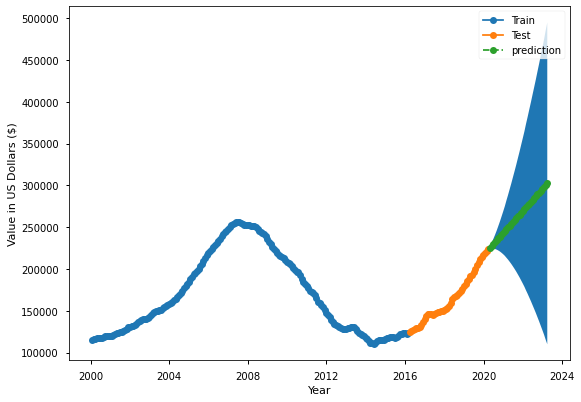

98405


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  98405   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1930.521
Date:                Sat, 14 May 2022   AIC                           3863.043
Time:                        13:27:34   BIC                           3866.528
Sample:                    01-31-2000   HQIC                          3864.447
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      5.284e+05    4.1e+04     12.901      0.000    4.48e+05    6.09e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.04   Jarque-Bera (JB):                 6.31
Prob(Q):                              0.31   Prob(JB):                         0.04
Heteroskedasticity (H):               4.31   Skew:                            -0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

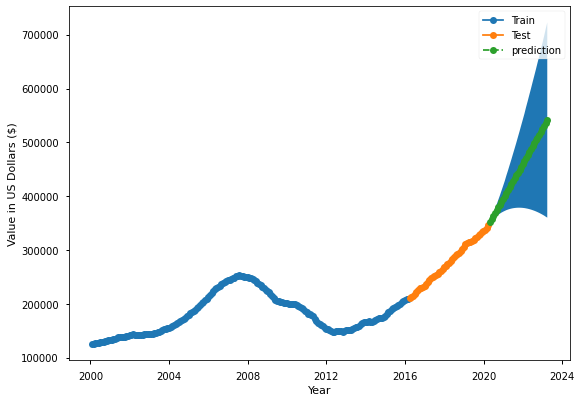

95819


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  95819   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -2065.298
Date:                Sat, 14 May 2022   AIC                           4132.597
Time:                        13:27:35   BIC                           4136.082
Sample:                    01-31-2000   HQIC                          4134.001
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.612e+06   1.03e+05     15.695      0.000    1.41e+06    1.81e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.47   Jarque-Bera (JB):                46.26
Prob(Q):                              0.49   Prob(JB):                         0.00
Heteroskedasticity (H):               4.43   Skew:                            -0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

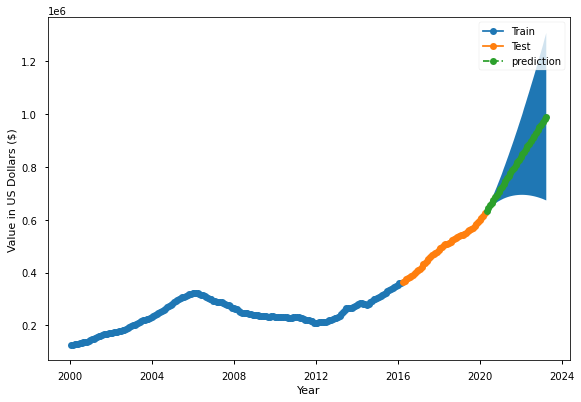

98409


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  98409   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1891.436
Date:                Sat, 14 May 2022   AIC                           3784.872
Time:                        13:27:35   BIC                           3788.356
Sample:                    01-31-2000   HQIC                          3786.275
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.822e+05   3.11e+04     12.295      0.000    3.21e+05    4.43e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 2.41
Prob(Q):                              0.79   Prob(JB):                         0.30
Heteroskedasticity (H):               4.71   Skew:                            -0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

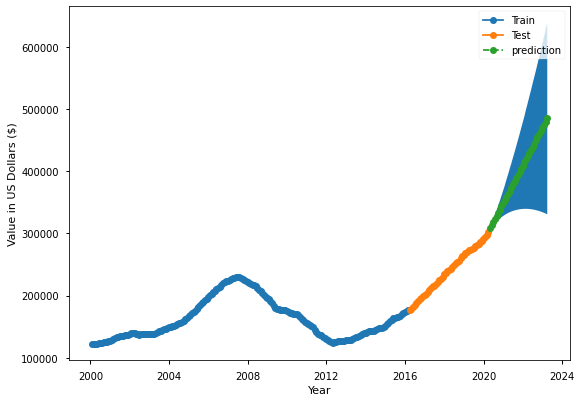

43206


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  43206   No. Observations:                  243
Model:               SARIMAX(4, 2, 0)   Log Likelihood               -1815.043
Date:                Sat, 14 May 2022   AIC                           3640.086
Time:                        13:27:38   BIC                           3657.510
Sample:                    01-31-2000   HQIC                          3647.106
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0757      0.038      1.991      0.046       0.001       0.150
ar.L2          0.0432      0.042      1.040      0.298      -0.038       0.125
ar.L3         -0.0746      0.011     -6.698      0.000      -0.096      -0.053
ar.L4         -0.0565      0.024     -2.335      0.020      -0.104      -0.009
sigma2      1.941e+05   1.77e+04     10.972      0.000    1.59e+05    2.29e+05
===================================================================================
Ljung-Box (L1) (Q):                   2.12   Jarque-Bera (JB):                 0.60
Prob(Q):                              0.15   Prob(JB):                         0.74
Heteroskedasticity (H):               1.44   Skew:                            -0.11
Prob(H) (two-sided):                  0.11   Kurtosis:                         3.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

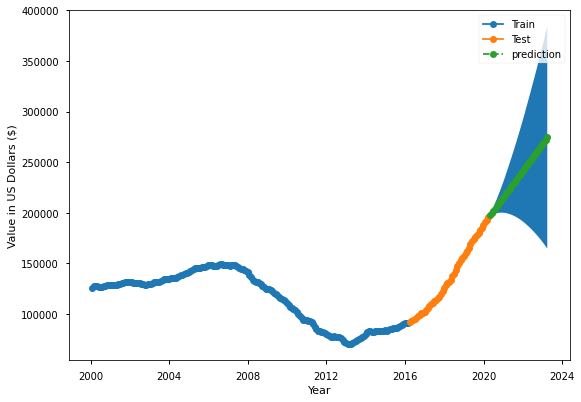

90026


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  90026   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -2169.244
Date:                Sat, 14 May 2022   AIC                           4340.488
Time:                        13:27:39   BIC                           4343.972
Sample:                    01-31-2000   HQIC                          4341.892
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       3.82e+06   2.39e+05     16.007      0.000    3.35e+06    4.29e+06
===================================================================================
Ljung-Box (L1) (Q):                   4.40   Jarque-Bera (JB):                48.11
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):               5.17   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

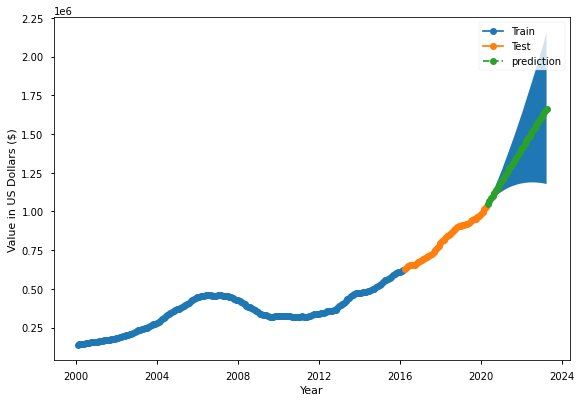

7018


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   7018   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -2018.444
Date:                Sat, 14 May 2022   AIC                           4038.889
Time:                        13:27:40   BIC                           4042.374
Sample:                    01-31-2000   HQIC                          4040.293
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.093e+06    9.8e+04     11.154      0.000    9.01e+05    1.29e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 0.04
Prob(Q):                              0.80   Prob(JB):                         0.98
Heteroskedasticity (H):               3.30   Skew:                             0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

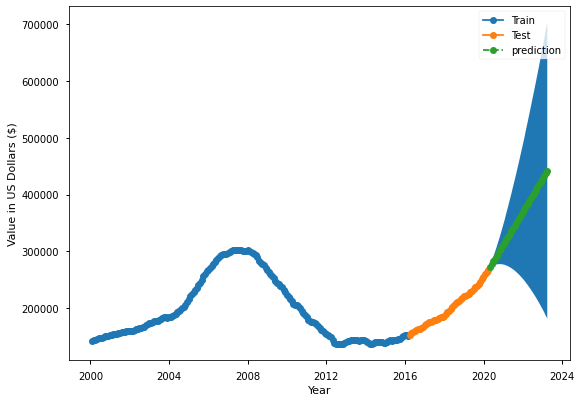

91030


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  91030   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -2170.871
Date:                Sat, 14 May 2022   AIC                           4343.742
Time:                        13:27:40   BIC                           4347.227
Sample:                    01-31-2000   HQIC                          4345.146
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.872e+06   2.63e+05     14.730      0.000    3.36e+06    4.39e+06
===================================================================================
Ljung-Box (L1) (Q):                  17.59   Jarque-Bera (JB):                27.87
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               8.44   Skew:                            -0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

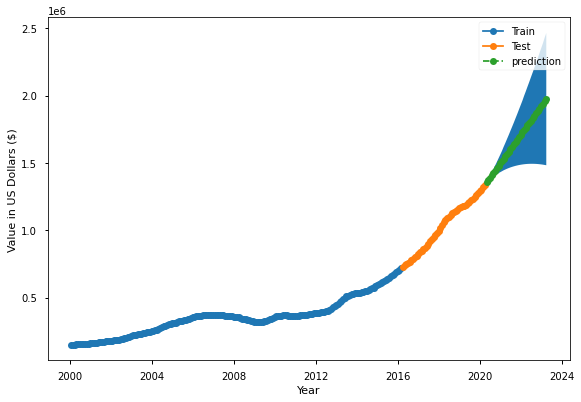

7106


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   7106   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -2016.302
Date:                Sat, 14 May 2022   AIC                           4034.605
Time:                        13:27:41   BIC                           4038.090
Sample:                    01-31-2000   HQIC                          4036.009
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.074e+06   9.11e+04     11.790      0.000    8.95e+05    1.25e+06
===================================================================================
Ljung-Box (L1) (Q):                   8.34   Jarque-Bera (JB):                 0.88
Prob(Q):                              0.00   Prob(JB):                         0.64
Heteroskedasticity (H):               4.73   Skew:                            -0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

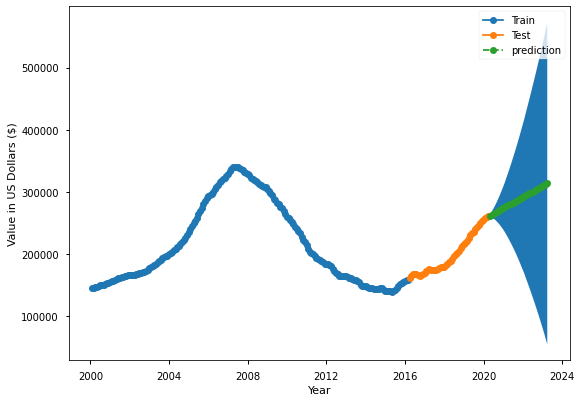

90004


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  90004   No. Observations:                  243
Model:               SARIMAX(1, 2, 1)   Log Likelihood               -2201.947
Date:                Sat, 14 May 2022   AIC                           4409.894
Time:                        13:27:45   BIC                           4420.349
Sample:                    01-31-2000   HQIC                          4414.106
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9000      0.075     11.941      0.000       0.752       1.048
ma.L1         -0.9528      0.054    -17.510      0.000      -1.059      -0.846
sigma2      5.081e+06   4.03e+05     12.620      0.000    4.29e+06    5.87e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                11.70
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               6.63   Skew:                             0.38
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

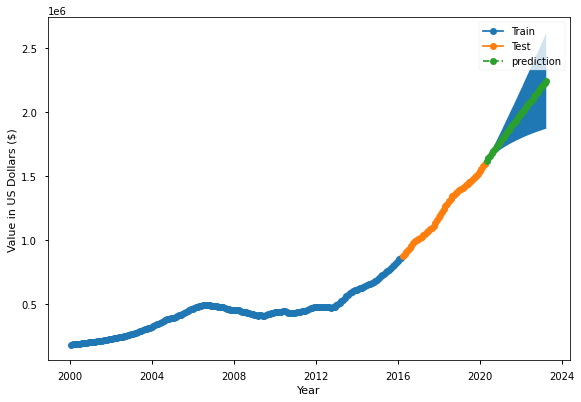

90027


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  90027   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -2215.018
Date:                Sat, 14 May 2022   AIC                           4432.035
Time:                        13:27:45   BIC                           4435.520
Sample:                    01-31-2000   HQIC                          4433.439
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      5.586e+06   3.57e+05     15.652      0.000    4.89e+06    6.29e+06
===================================================================================
Ljung-Box (L1) (Q):                   6.39   Jarque-Bera (JB):                41.68
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):              10.91   Skew:                             0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

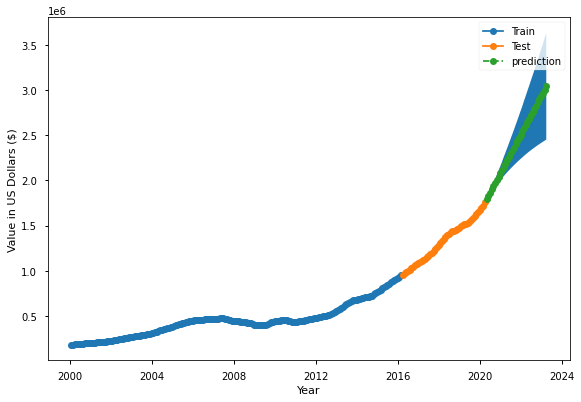

94610


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  94610   No. Observations:                  243
Model:               SARIMAX(3, 2, 1)   Log Likelihood               -2288.461
Date:                Sat, 14 May 2022   AIC                           4586.922
Time:                        13:27:50   BIC                           4604.346
Sample:                    01-31-2000   HQIC                          4593.942
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8564      0.038     22.577      0.000       0.782       0.931
ar.L2         -0.0318      0.017     -1.895      0.058      -0.065       0.001
ar.L3         -0.0332      0.021     -1.559      0.119      -0.075       0.009
ma.L1         -0.9403      0.035    -27.213      0.000      -1.008      -0.873
sigma2      9.781e+06   9.88e-10    9.9e+15      0.000    9.78e+06    9.78e+06
===================================================================================
Ljung-Box (L1) (Q):                   4.98   Jarque-Bera (JB):                65.09
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):              10.77   Skew:                            -0.23
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.84e+30. Standard errors may be unstable.
"""

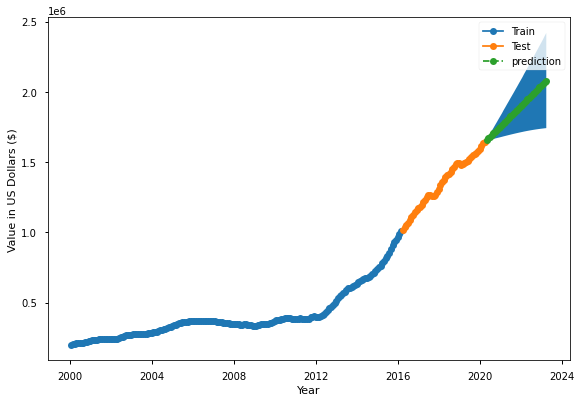

91108


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  91108   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -2264.055
Date:                Sat, 14 May 2022   AIC                           4530.110
Time:                        13:27:51   BIC                           4533.595
Sample:                    01-31-2000   HQIC                          4531.514
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      8.391e+06   4.57e+05     18.346      0.000    7.49e+06    9.29e+06
===================================================================================
Ljung-Box (L1) (Q):                  11.11   Jarque-Bera (JB):               128.90
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              30.35   Skew:                            -0.23
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

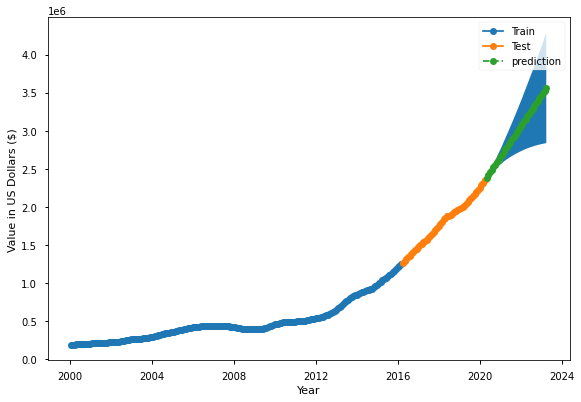

90005


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  90005   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -2274.980
Date:                Sat, 14 May 2022   AIC                           4551.960
Time:                        13:27:51   BIC                           4555.445
Sample:                    01-31-2000   HQIC                          4553.364
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      9.187e+06   7.21e+05     12.743      0.000    7.77e+06    1.06e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.54   Jarque-Bera (JB):                 4.88
Prob(Q):                              0.46   Prob(JB):                         0.09
Heteroskedasticity (H):               5.77   Skew:                            -0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

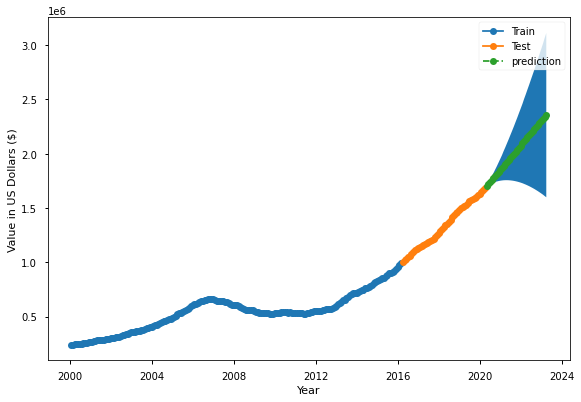

91105


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  91105   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -2191.059
Date:                Sat, 14 May 2022   AIC                           4384.118
Time:                        13:27:52   BIC                           4387.603
Sample:                    01-31-2000   HQIC                          4385.522
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.579e+06   3.46e+05     13.244      0.000     3.9e+06    5.26e+06
===================================================================================
Ljung-Box (L1) (Q):                   2.66   Jarque-Bera (JB):                10.46
Prob(Q):                              0.10   Prob(JB):                         0.01
Heteroskedasticity (H):               6.77   Skew:                            -0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

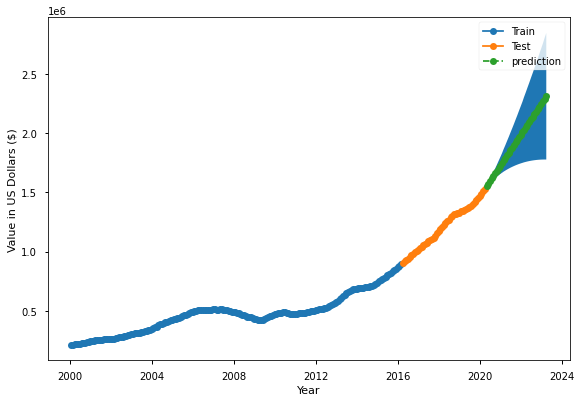

90403


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  90403   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -2320.315
Date:                Sat, 14 May 2022   AIC                           4642.629
Time:                        13:27:52   BIC                           4646.114
Sample:                    01-31-2000   HQIC                          4644.033
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.338e+07   7.73e+05     17.310      0.000    1.19e+07    1.49e+07
===================================================================================
Ljung-Box (L1) (Q):                   2.19   Jarque-Bera (JB):                84.49
Prob(Q):                              0.14   Prob(JB):                         0.00
Heteroskedasticity (H):              10.14   Skew:                             0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

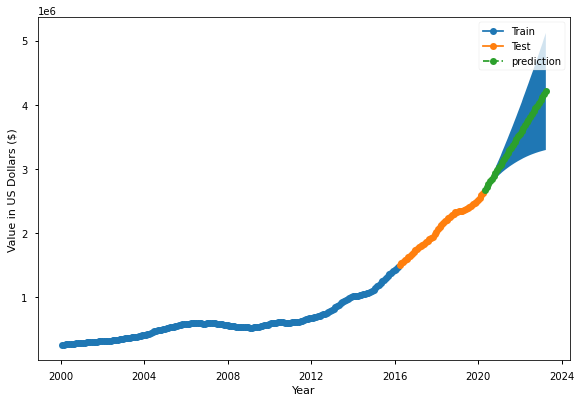

90068


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  90068   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -2241.529
Date:                Sat, 14 May 2022   AIC                           4485.058
Time:                        13:27:53   BIC                           4488.543
Sample:                    01-31-2000   HQIC                          4486.462
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       6.96e+06   4.91e+05     14.175      0.000       6e+06    7.92e+06
===================================================================================
Ljung-Box (L1) (Q):                   1.69   Jarque-Bera (JB):                19.16
Prob(Q):                              0.19   Prob(JB):                         0.00
Heteroskedasticity (H):               7.04   Skew:                             0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

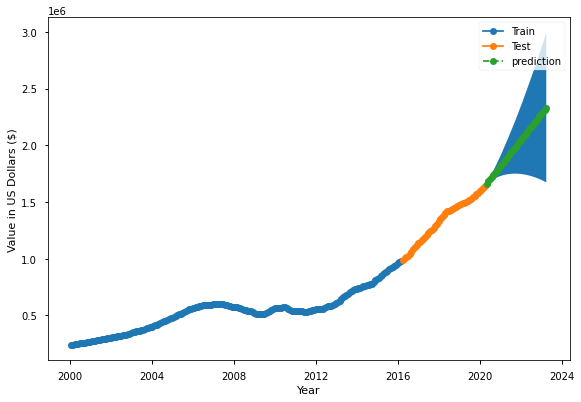

90048


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  90048   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -2323.828
Date:                Sat, 14 May 2022   AIC                           4649.656
Time:                        13:27:54   BIC                           4653.141
Sample:                    01-31-2000   HQIC                          4651.060
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.378e+07   8.68e+05     15.874      0.000    1.21e+07    1.55e+07
===================================================================================
Ljung-Box (L1) (Q):                   2.40   Jarque-Bera (JB):                44.96
Prob(Q):                              0.12   Prob(JB):                         0.00
Heteroskedasticity (H):              13.20   Skew:                             0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

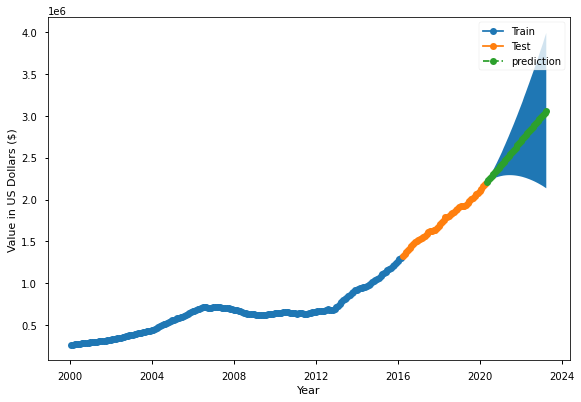

90211


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  90211   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -2352.851
Date:                Sat, 14 May 2022   AIC                           4707.702
Time:                        13:27:54   BIC                           4711.186
Sample:                    01-31-2000   HQIC                          4709.106
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.753e+07   6.94e+05     25.253      0.000    1.62e+07    1.89e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):               711.46
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):              26.94   Skew:                             0.63
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

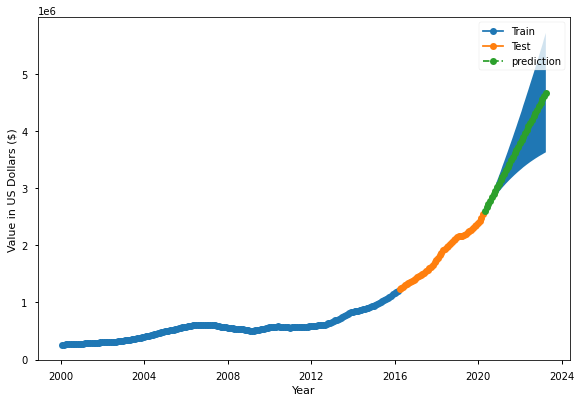

90046


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  90046   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -2285.282
Date:                Sat, 14 May 2022   AIC                           4572.565
Time:                        13:27:55   BIC                           4576.049
Sample:                    01-31-2000   HQIC                          4573.969
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.001e+07   5.45e+05     18.355      0.000    8.94e+06    1.11e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               124.73
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):              15.57   Skew:                            -0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

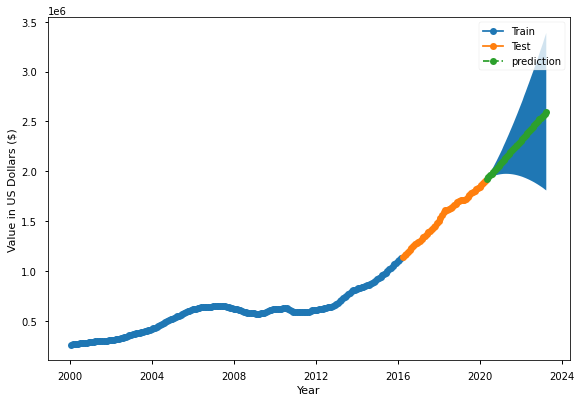

90036


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  90036   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -2312.077
Date:                Sat, 14 May 2022   AIC                           4626.155
Time:                        13:27:55   BIC                           4629.639
Sample:                    01-31-2000   HQIC                          4627.559
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       1.25e+07   8.49e+05     14.718      0.000    1.08e+07    1.42e+07
===================================================================================
Ljung-Box (L1) (Q):                   1.88   Jarque-Bera (JB):                25.56
Prob(Q):                              0.17   Prob(JB):                         0.00
Heteroskedasticity (H):               7.31   Skew:                             0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

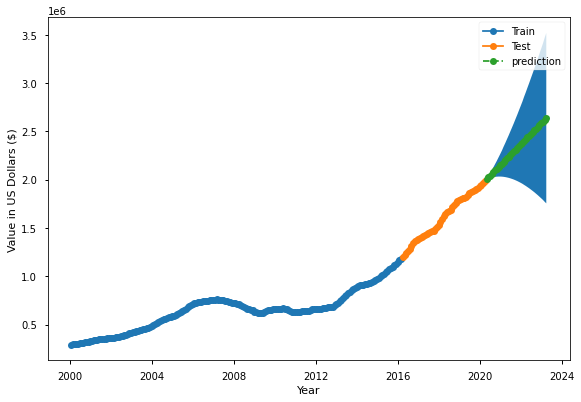

90035


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  90035   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -2335.595
Date:                Sat, 14 May 2022   AIC                           4673.189
Time:                        13:27:56   BIC                           4676.674
Sample:                    01-31-2000   HQIC                          4674.593
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.519e+07   7.41e+05     20.500      0.000    1.37e+07    1.66e+07
===================================================================================
Ljung-Box (L1) (Q):                   3.74   Jarque-Bera (JB):               239.29
Prob(Q):                              0.05   Prob(JB):                         0.00
Heteroskedasticity (H):              11.84   Skew:                            -0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

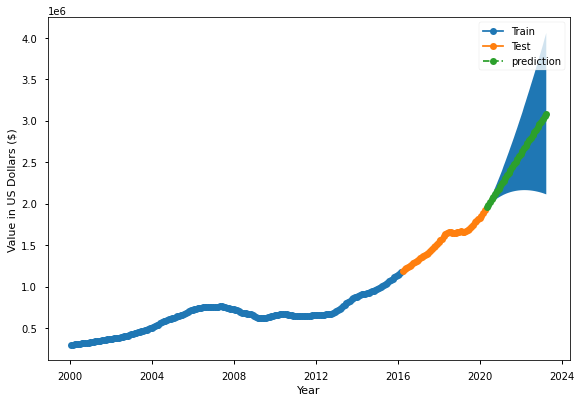

90266


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  90266   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -2307.206
Date:                Sat, 14 May 2022   AIC                           4616.412
Time:                        13:27:57   BIC                           4619.897
Sample:                    01-31-2000   HQIC                          4617.816
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        1.2e+07   6.62e+05     18.144      0.000    1.07e+07    1.33e+07
===================================================================================
Ljung-Box (L1) (Q):                  15.41   Jarque-Bera (JB):               117.36
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              15.36   Skew:                             0.42
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

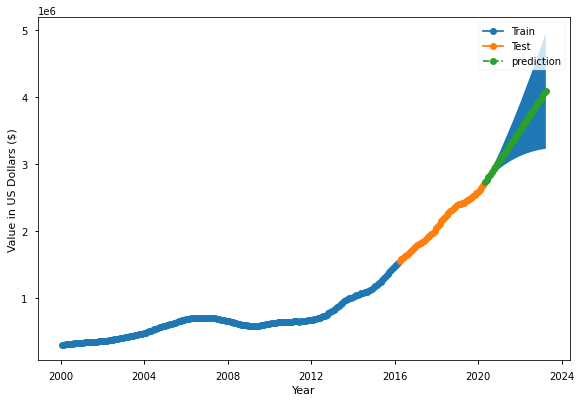

91011


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  91011   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -2251.262
Date:                Sat, 14 May 2022   AIC                           4504.523
Time:                        13:27:57   BIC                           4508.008
Sample:                    01-31-2000   HQIC                          4505.927
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      7.546e+06   5.05e+05     14.946      0.000    6.56e+06    8.54e+06
===================================================================================
Ljung-Box (L1) (Q):                   4.89   Jarque-Bera (JB):                31.91
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               5.88   Skew:                            -0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

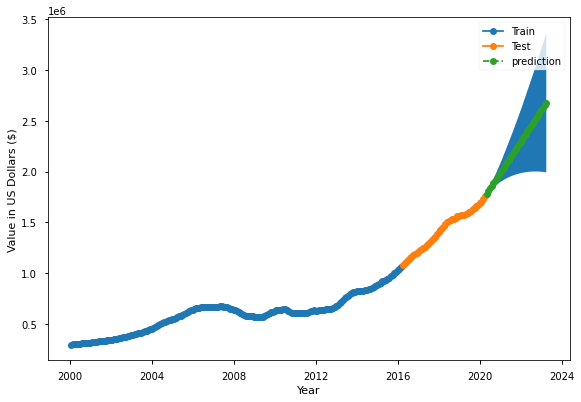

90254


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  90254   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -2308.111
Date:                Sat, 14 May 2022   AIC                           4618.222
Time:                        13:27:58   BIC                           4621.707
Sample:                    01-31-2000   HQIC                          4619.626
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.209e+07   7.68e+05     15.742      0.000    1.06e+07    1.36e+07
===================================================================================
Ljung-Box (L1) (Q):                   3.98   Jarque-Bera (JB):                42.24
Prob(Q):                              0.05   Prob(JB):                         0.00
Heteroskedasticity (H):               5.89   Skew:                             0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

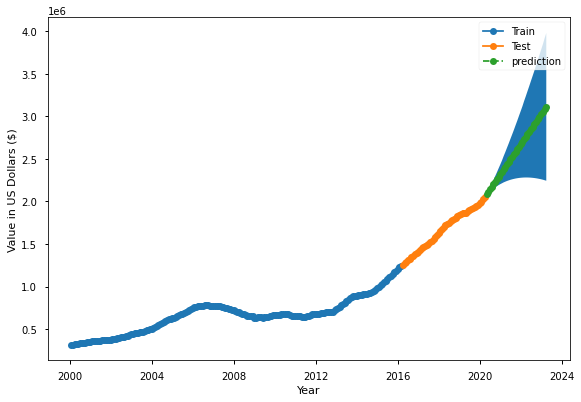

90064


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  90064   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -2271.908
Date:                Sat, 14 May 2022   AIC                           4545.816
Time:                        13:27:58   BIC                           4549.301
Sample:                    01-31-2000   HQIC                          4547.220
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      8.956e+06   6.34e+05     14.129      0.000    7.71e+06    1.02e+07
===================================================================================
Ljung-Box (L1) (Q):                   1.28   Jarque-Bera (JB):                18.16
Prob(Q):                              0.26   Prob(JB):                         0.00
Heteroskedasticity (H):               4.72   Skew:                            -0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

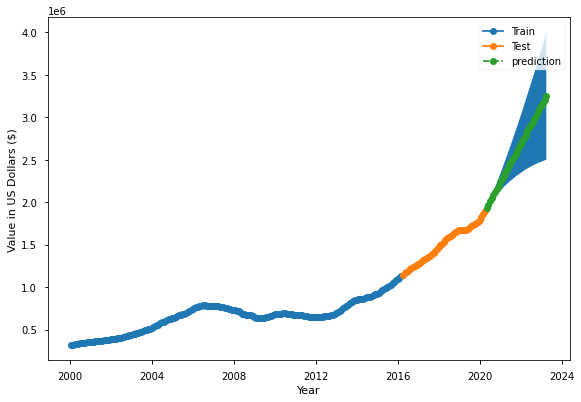

90069


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  90069   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -2375.830
Date:                Sat, 14 May 2022   AIC                           4753.661
Time:                        13:27:59   BIC                           4757.146
Sample:                    01-31-2000   HQIC                          4755.065
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.122e+07   1.17e+06     18.138      0.000    1.89e+07    2.35e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               115.03
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):              11.60   Skew:                            -0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

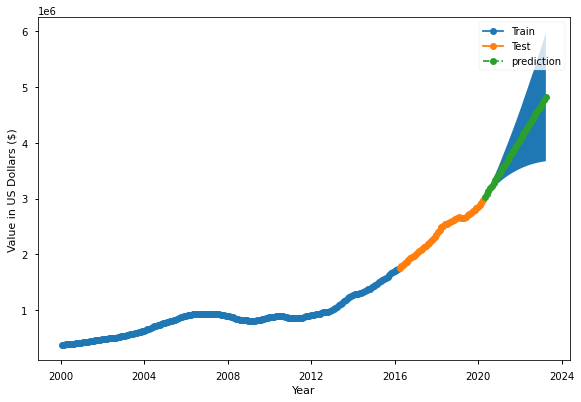

90020


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  90020   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -2465.392
Date:                Sat, 14 May 2022   AIC                           4932.784
Time:                        13:28:00   BIC                           4936.269
Sample:                    01-31-2000   HQIC                          4934.188
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.461e+07   2.39e+06     18.700      0.000    3.99e+07    4.93e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.82   Jarque-Bera (JB):               138.67
Prob(Q):                              0.37   Prob(JB):                         0.00
Heteroskedasticity (H):              19.73   Skew:                             0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

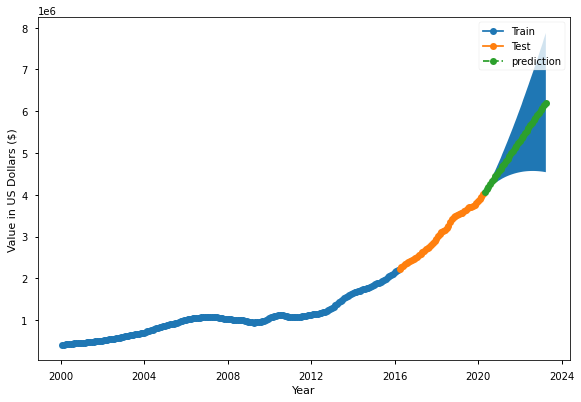

90212


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  90212   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -2398.213
Date:                Sat, 14 May 2022   AIC                           4798.426
Time:                        13:28:01   BIC                           4801.910
Sample:                    01-31-2000   HQIC                          4799.829
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.555e+07   1.59e+06     16.110      0.000    2.24e+07    2.87e+07
===================================================================================
Ljung-Box (L1) (Q):                   6.08   Jarque-Bera (JB):                50.63
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               9.65   Skew:                             0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

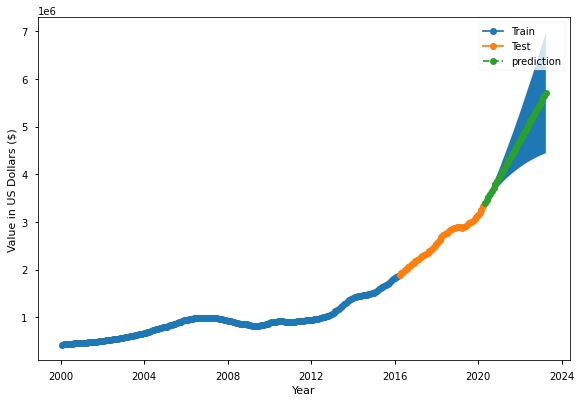

90024


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  90024   No. Observations:                  243
Model:               SARIMAX(1, 2, 1)   Log Likelihood               -2385.759
Date:                Sat, 14 May 2022   AIC                           4777.519
Time:                        13:28:02   BIC                           4787.973
Sample:                    01-31-2000   HQIC                          4781.731
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9139      0.059     15.618      0.000       0.799       1.029
ma.L1         -0.9676      0.041    -23.677      0.000      -1.048      -0.887
sigma2      2.395e+07    7.1e-10   3.37e+16      0.000     2.4e+07     2.4e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 7.01
Prob(Q):                              0.81   Prob(JB):                         0.03
Heteroskedasticity (H):               5.28   Skew:                            -0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.16e+31. Standard errors may be unstable.
"""

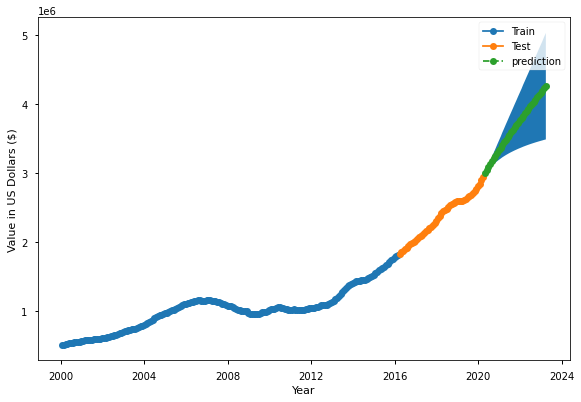

19121


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  19121   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1921.539
Date:                Sat, 14 May 2022   AIC                           3845.078
Time:                        13:28:03   BIC                           3848.563
Sample:                    01-31-2000   HQIC                          3846.482
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.905e+05   4.24e+04     11.575      0.000    4.07e+05    5.73e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.54   Jarque-Bera (JB):                 0.72
Prob(Q):                              0.46   Prob(JB):                         0.70
Heteroskedasticity (H):               4.06   Skew:                            -0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

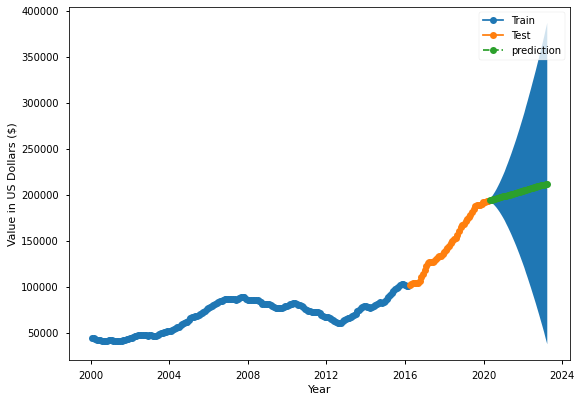

46203


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  46203   No. Observations:                  243
Model:               SARIMAX(0, 2, 3)   Log Likelihood               -1680.285
Date:                Sat, 14 May 2022   AIC                           3368.570
Time:                        13:28:06   BIC                           3382.509
Sample:                    01-31-2000   HQIC                          3374.186
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0592      0.044      1.343      0.179      -0.027       0.146
ma.L2          0.0980      0.041      2.419      0.016       0.019       0.177
ma.L3         -0.4816      0.033    -14.726      0.000      -0.546      -0.418
sigma2      5.421e+04   4022.168     13.479      0.000    4.63e+04    6.21e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                22.76
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.90   Skew:                            -0.51
Prob(H) (two-sided):                  0.64   Kurtosis:                         4.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

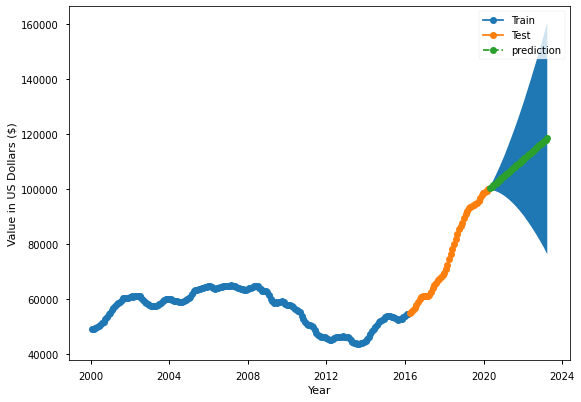

46201


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  46201   No. Observations:                  243
Model:               SARIMAX(3, 2, 0)   Log Likelihood               -1625.111
Date:                Sat, 14 May 2022   AIC                           3258.221
Time:                        13:28:08   BIC                           3272.160
Sample:                    01-31-2000   HQIC                          3263.837
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1105      0.052      2.132      0.033       0.009       0.212
ar.L2          0.0362      0.053      0.676      0.499      -0.069       0.141
ar.L3         -0.3084      0.031     -9.954      0.000      -0.369      -0.248
sigma2      3.968e+04   2633.488     15.069      0.000    3.45e+04    4.48e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                24.62
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               2.37   Skew:                             0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

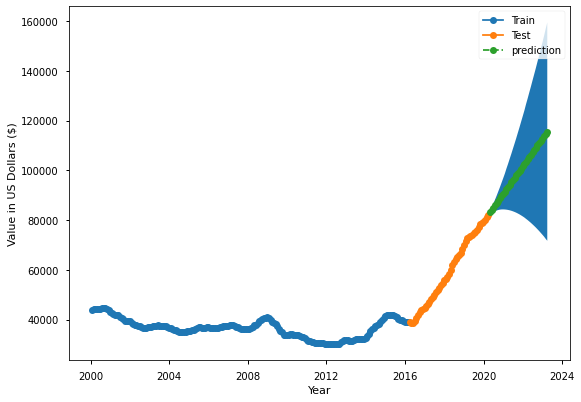

37208


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  37208   No. Observations:                  243
Model:               SARIMAX(1, 2, 1)   Log Likelihood               -1981.846
Date:                Sat, 14 May 2022   AIC                           3969.691
Time:                        13:28:10   BIC                           3980.145
Sample:                    01-31-2000   HQIC                          3973.903
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7259      0.408     -1.781      0.075      -1.525       0.073
ma.L1          0.6959      0.425      1.636      0.102      -0.138       1.529
sigma2      8.249e+05   8.03e+04     10.275      0.000    6.68e+05    9.82e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 1.36
Prob(Q):                              0.89   Prob(JB):                         0.51
Heteroskedasticity (H):               1.57   Skew:                            -0.15
Prob(H) (two-sided):                  0.05   Kurtosis:                         2.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

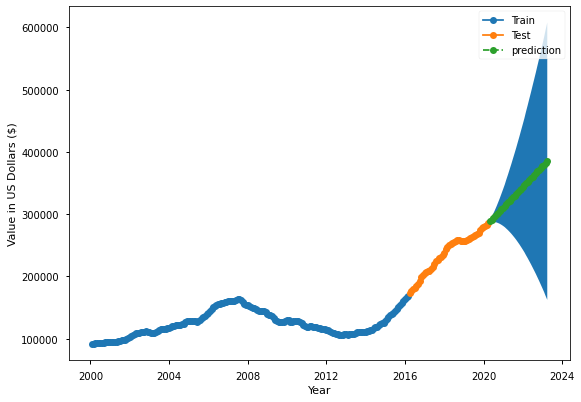

In [71]:
# implementing best model in a loop
RESULTS = {}

for zipcode in zipcode_list_5yr:
    print(zipcode)
    
    # Make empty dict for district data
    zipcode_d = {}
    
    # Copy Time Series
    ts = df_5[zipcode].copy()
    
    
    # Train Test Split Index
    train_size = 0.8
    split_idx = round(len(ts)* train_size)
    split_idx = int(split_idx)

    # Split
    train = ts.iloc[:split_idx]
    test = ts.iloc[split_idx:]
    
    
    # Get best params using auto_arima
    gridsearch_model = auto_arima(ts,start_p=0,start_q=0)
    best_model = SARIMAX(ts,order=gridsearch_model.order,
                     seasonal_order=gridsearch_model.seasonal_order).fit()
    
    ## Get predictions
    pred  = best_model.get_forecast(steps=36)#start=test.index[0],end=test.index[-1])
    pred_df = forecast_to_df(pred,zipcode)

    ## Save info to dict
    zipcode_d['pred_df'] = pred_df
    zipcode_d['model'] = best_model
    zipcode_d['train'] = train
    zipcode_d['test'] = test
    
    # Display Results
    display(best_model.summary())
    plot_train_test_pred(train,test,pred_df)
    plt.xlabel('Year')
    plt.ylabel('Value in US Dollars ($)')
    plt.show()
    
    
    # Save district dict in RESULTS
    RESULTS[zipcode] = zipcode_d

In [77]:
max_value = df_5.max(axis = 0)
max_value.sort_values(ascending = False)

90020    4013833.0
90212    3325055.0
90069    2978535.0
90024    2947367.0
90266    2685710.0
           ...    
64124      82837.0
48340      82679.0
46201      82205.0
38127      55869.0
19132      48757.0
Length: 128, dtype: float64

In [78]:
# Looking at the predictions in comparison to the highest value zipcodes the zipcodes that should be invested in are 90020, 90212, and 90211

In [127]:
melted_df.loc[melted_df['Zipcode']=='90211']

Zipcode                           Metro  ...  ROI_3yr      value
Date                                                ...                    
2000-01-31   90211  Los Angeles-Long Beach-Anaheim  ...   0.7189   259645.0
2000-02-29   90211  Los Angeles-Long Beach-Anaheim  ...   0.7189   262054.0
2000-03-31   90211  Los Angeles-Long Beach-Anaheim  ...   0.7189   264150.0
2000-04-30   90211  Los Angeles-Long Beach-Anaheim  ...   0.7189   265904.0
2000-05-31   90211  Los Angeles-Long Beach-Anaheim  ...   0.7189   267902.0
...            ...                             ...  ...      ...        ...
2019-11-30   90211  Los Angeles-Long Beach-Anaheim  ...   0.7189  2354435.0
2019-12-31   90211  Los Angeles-Long Beach-Anaheim  ...   0.7189  2384830.0
2020-01-31   90211  Los Angeles-Long Beach-Anaheim  ...   0.7189  2423355.0
2020-02-29   90211  Los Angeles-Long Beach-Anaheim  ...   0.7189  2485106.0
2020-03-31   90211  Los Angeles-Long Beach-Anaheim  ...   0.7189  2544209.0

[243 rows x 6 columns]

In [115]:
melted_df.loc[melted_df['Zipcode']=='90212']

Zipcode                           Metro  ...  ROI_3yr      value
Date                                                ...                    
2000-01-31   90212  Los Angeles-Long Beach-Anaheim  ...   0.4749   423310.0
2000-02-29   90212  Los Angeles-Long Beach-Anaheim  ...   0.4749   427903.0
2000-03-31   90212  Los Angeles-Long Beach-Anaheim  ...   0.4749   432550.0
2000-04-30   90212  Los Angeles-Long Beach-Anaheim  ...   0.4749   435069.0
2000-05-31   90212  Los Angeles-Long Beach-Anaheim  ...   0.4749   438951.0
...            ...                             ...  ...      ...        ...
2019-11-30   90212  Los Angeles-Long Beach-Anaheim  ...   0.4749  3098263.0
2019-12-31   90212  Los Angeles-Long Beach-Anaheim  ...   0.4749  3143535.0
2020-01-31   90212  Los Angeles-Long Beach-Anaheim  ...   0.4749  3192303.0
2020-02-29   90212  Los Angeles-Long Beach-Anaheim  ...   0.4749  3259051.0
2020-03-31   90212  Los Angeles-Long Beach-Anaheim  ...   0.4749  3325055.0

[243 rows x 6 columns]

In [128]:
melted_df.loc[melted_df['Zipcode']=='90211']

Zipcode                           Metro  ...  ROI_3yr      value
Date                                                ...                    
2000-01-31   90211  Los Angeles-Long Beach-Anaheim  ...   0.7189   259645.0
2000-02-29   90211  Los Angeles-Long Beach-Anaheim  ...   0.7189   262054.0
2000-03-31   90211  Los Angeles-Long Beach-Anaheim  ...   0.7189   264150.0
2000-04-30   90211  Los Angeles-Long Beach-Anaheim  ...   0.7189   265904.0
2000-05-31   90211  Los Angeles-Long Beach-Anaheim  ...   0.7189   267902.0
...            ...                             ...  ...      ...        ...
2019-11-30   90211  Los Angeles-Long Beach-Anaheim  ...   0.7189  2354435.0
2019-12-31   90211  Los Angeles-Long Beach-Anaheim  ...   0.7189  2384830.0
2020-01-31   90211  Los Angeles-Long Beach-Anaheim  ...   0.7189  2423355.0
2020-02-29   90211  Los Angeles-Long Beach-Anaheim  ...   0.7189  2485106.0
2020-03-31   90211  Los Angeles-Long Beach-Anaheim  ...   0.7189  2544209.0

[243 rows x 6 columns]

In [ ]:
#Answer the following questions:
     # What technique/algorithm/decision process did you use to down sample? (BONUS FOR NOT DOWN SAMPLING)
     # What three zip codes provide the best investment opportunity for the SREIT?
     # Why?